In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Multiplex/year regressions

## Import and adjust

In [2]:
# import
tds_1719 = pd.read_csv('SCB_Complexo x Ano - 2017 a 2019 - mesclado fiscalização.csv')
est_1719 = pd.read_csv('SCB_Complexo x Ano (receita estrangeiros) - 2017 a 2019 - mesclado fiscalização.csv')
bras_1719 = pd.read_csv('SCB_Complexo x Ano (receita brasileiros) - 2017 a 2019 - mesclado fiscalização.csv')

In [3]:
tds_1719.columns

Index(['ANO_CINEMATOGRAFICO', 'QTDE_TIT_DIF_EXIB', 'PUBLICO', 'RENDA',
       'DATA_HORA_SESSAO', 'DIAS_FUNCIONAMENTO', 'TOT_SALAS_FUNC',
       'REGISTRO_SALA', 'SALAS_COMPLEXO_INFERIDO',
       'ASSENTOS_COMPLEXO_INFERIDO', 'UF_COMPLEXO', 'OBRIGAÇÃO_TOTAL_POR_SALA',
       'OBRIGAÇÃO_TOTAL_INCREMENTO_POR_SALA', 'OBRIGAÇÃO_PROP_POR_SALA',
       'OBRIGAÇÃO_PROP_INCREMENTO_POR_SALA', 'OBRIGAÇÃO_FINAL_POR_SALA',
       'CUMPRIMENTO_PROP_TRUNCADO', 'CUMPRIMENTO_NORMALIZADO', 'TRANSF_ORIGEM',
       'TRANSF_RECEBIDOS', 'CUMPRIU_COTA', 'TOTAL_SALAS',
       'DIAS_FUNC_INFERIDOS', 'CUMPRIMENTO_PROPORCIONAL', 'CUMPRIMENTO_LINEAR',
       'CUMPRIMENTO_TRIWEIGHT', 'REGISTRO_COMPLEXO', 'REG_EMPRESA',
       'REGISTRO_GRUPO', 'CEP_COMPLEXO', 'MUN_COMPLEXO'],
      dtype='object')

In [4]:
# defining data w/o 2019 to account for possible problems with 2019 having no screen quota
tds_1718 = tds_1719[tds_1719.ANO_CINEMATOGRAFICO != 2019]
est_1718 = est_1719[est_1719.ANO_CINEMATOGRAFICO != 2019]
bras_1718 = bras_1719[bras_1719.ANO_CINEMATOGRAFICO != 2019]

## Naïve regressions

Define multiplex $i$ in year $t$ and title "nationality" (meaning all, foreign or Brazilian movie sessions) and nominal screen quota obligation $SQ$:

$$ \ln(Y_{nit}) = \beta_0 + \beta_1 SQ_{it} + \theta X_{it} + \varepsilon_{it} $$

$Y$ is the interest variable that can be either Yearly Income or total public (# of moviegoers). $X_{it}$ is a vector of controls with opening days, movie theater fixed-effects and year fixed-effects. Alternatively, we also drop entity fixed-effects and use number of viewing rooms and seats per movie-theater as controls.

### Dependent variable: income

#### With entity fixed-effects

##### 2017-2019

In [5]:
formul = 'np.log(RENDA) ~ OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + C(REGISTRO_COMPLEXO) + C(ANO_CINEMATOGRAFICO)'
data = [tds_1719, est_1719, bras_1719]

# all
reg_n1 = smf.ols(formula = formul, data=data[0]).fit()

# foreign
reg_n2 = smf.ols(formula = formul, data=data[1]).fit()

# Brazilian
reg_n3 = smf.ols(formula = formul, data=data[2]).fit()

In [6]:
pd.read_html(reg_n1.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
C(ANO_CINEMATOGRAFICO)[T.2018],-0.13700,0.015,-9.438,0.000
C(ANO_CINEMATOGRAFICO)[T.2019],-0.05880,0.036,-1.633,0.103
OBRIGAÇÃO_FINAL_POR_SALA,-0.00005,0.001,-0.071,0.944
DIAS_FUNCIONAMENTO,0.00660,0.000,45.777,0.000


In [8]:
pd.read_html(reg_n2.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
C(ANO_CINEMATOGRAFICO)[T.2018],-0.186500,0.015,-12.318,0.000
C(ANO_CINEMATOGRAFICO)[T.2019],-0.091400,0.038,-2.416,0.016
OBRIGAÇÃO_FINAL_POR_SALA,0.000083,0.001,0.111,0.911
DIAS_FUNCIONAMENTO,0.006700,0.000,44.178,0.000


In [9]:
pd.read_html(reg_n3.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
C(ANO_CINEMATOGRAFICO)[T.2018],0.3315,0.028,11.892,0.000
C(ANO_CINEMATOGRAFICO)[T.2019],0.2852,0.070,4.053,0.000
OBRIGAÇÃO_FINAL_POR_SALA,0.0003,0.001,0.238,0.812
DIAS_FUNCIONAMENTO,0.0090,0.000,22.609,0.000


##### 2017-2018

In [10]:
formul = 'np.log(RENDA) ~ OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + C(REGISTRO_COMPLEXO) + C(ANO_CINEMATOGRAFICO)'
data = [tds_1718, est_1718, bras_1718]

# all
reg_n4 = smf.ols(formula = formul, data=data[0]).fit()

# foreign
reg_n5 = smf.ols(formula = formul, data=data[1]).fit()

# Brazilian
reg_n6 = smf.ols(formula = formul, data=data[2]).fit()

In [13]:
pd.read_html(reg_n4.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-3:,:-2]

,coef,std err,t,P>|t|
C(ANO_CINEMATOGRAFICO)[T.2018],-0.1440,0.016,-8.896,0.000
OBRIGAÇÃO_FINAL_POR_SALA,-0.0012,0.001,-0.826,0.409
DIAS_FUNCIONAMENTO,0.0068,0.000,28.197,0.000


In [14]:
pd.read_html(reg_n5.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-3:,:-2]

,coef,std err,t,P>|t|
C(ANO_CINEMATOGRAFICO)[T.2018],-0.1943,0.017,-11.727,0.000
OBRIGAÇÃO_FINAL_POR_SALA,-0.0004,0.001,-0.247,0.805
DIAS_FUNCIONAMENTO,0.0068,0.000,27.128,0.000


In [15]:
pd.read_html(reg_n6.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-3:,:-2]

,coef,std err,t,P>|t|
C(ANO_CINEMATOGRAFICO)[T.2018],0.3375,0.034,9.944,0.000
OBRIGAÇÃO_FINAL_POR_SALA,-0.0048,0.003,-1.713,0.087
DIAS_FUNCIONAMENTO,0.0114,0.001,14.821,0.000


#### Without entity fixed-effects

##### 2017-2019

In [16]:
formul = 'np.log(RENDA) ~ OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + SALAS_COMPLEXO_INFERIDO + ASSENTOS_COMPLEXO_INFERIDO + C(ANO_CINEMATOGRAFICO)*C(MUN_COMPLEXO)'

data = [tds_1719, est_1719, bras_1719]

# all
reg_n7 = smf.ols(formula = formul, data=data[0]).fit()

# foreign
reg_n8 = smf.ols(formula = formul, data=data[1]).fit()

# Brazilian
reg_n9 = smf.ols(formula = formul, data=data[2]).fit()

In [18]:
pd.read_html(reg_n7.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
OBRIGAÇÃO_FINAL_POR_SALA,0.0070,0.002000,3.718,0.0
DIAS_FUNCIONAMENTO,0.0098,0.000000,32.408,0.0
SALAS_COMPLEXO_INFERIDO,0.2298,0.017000,13.233,0.0
ASSENTOS_COMPLEXO_INFERIDO,0.0004,0.000066,6.016,0.0


In [19]:
pd.read_html(reg_n8.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
OBRIGAÇÃO_FINAL_POR_SALA,0.0035,0.00200,1.742,0.082
DIAS_FUNCIONAMENTO,0.0111,0.00000,35.495,0.000
SALAS_COMPLEXO_INFERIDO,0.2299,0.01800,12.449,0.000
ASSENTOS_COMPLEXO_INFERIDO,0.0004,0.00007,5.727,0.000


In [20]:
pd.read_html(reg_n9.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
OBRIGAÇÃO_FINAL_POR_SALA,0.0146,0.002000,6.779,0.000
DIAS_FUNCIONAMENTO,0.0081,0.000000,21.659,0.000
SALAS_COMPLEXO_INFERIDO,0.0554,0.021000,2.649,0.008
ASSENTOS_COMPLEXO_INFERIDO,0.0005,0.000074,7.109,0.000


##### 2017-2018

In [21]:
formul = 'np.log(RENDA) ~ OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + SALAS_COMPLEXO_INFERIDO + ASSENTOS_COMPLEXO_INFERIDO + C(ANO_CINEMATOGRAFICO)*C(MUN_COMPLEXO)'

data = [tds_1718, est_1718, bras_1718]

# all
reg_n10 = smf.ols(formula = formul, data=data[0]).fit()

# foreign
reg_n11 = smf.ols(formula = formul, data=data[1]).fit()

# Brazilian
reg_n12 = smf.ols(formula = formul, data=data[2]).fit()

In [22]:
pd.read_html(reg_n10.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
OBRIGAÇÃO_FINAL_POR_SALA,0.0094,0.002000,4.224,0.0
DIAS_FUNCIONAMENTO,0.0092,0.000000,19.665,0.0
SALAS_COMPLEXO_INFERIDO,0.2206,0.022000,9.988,0.0
ASSENTOS_COMPLEXO_INFERIDO,0.0004,0.000083,4.790,0.0


In [23]:
pd.read_html(reg_n11.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
OBRIGAÇÃO_FINAL_POR_SALA,0.0052,0.002000,2.227,0.026
DIAS_FUNCIONAMENTO,0.0107,0.000000,22.609,0.000
SALAS_COMPLEXO_INFERIDO,0.2218,0.023000,9.579,0.000
ASSENTOS_COMPLEXO_INFERIDO,0.0004,0.000087,4.699,0.000


In [24]:
pd.read_html(reg_n12.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
OBRIGAÇÃO_FINAL_POR_SALA,0.0183,0.003000,7.082,0.000
DIAS_FUNCIONAMENTO,0.0071,0.001000,12.945,0.000
SALAS_COMPLEXO_INFERIDO,0.0628,0.028000,2.275,0.023
ASSENTOS_COMPLEXO_INFERIDO,0.0005,0.000096,5.280,0.000


### Dependent variable: public (moviegoers)

#### With entity fixed-effects

##### 2017-2019

In [25]:
formul = 'np.log(PUBLICO) ~ OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + C(REGISTRO_COMPLEXO) + C(ANO_CINEMATOGRAFICO)'

data = [tds_1719, est_1719, bras_1719]

# all
reg_np1 = smf.ols(formula = formul, data=data[0]).fit()

# foreign
reg_np2 = smf.ols(formula = formul, data=data[1]).fit()

# Brazilian
reg_np3 = smf.ols(formula = formul, data=data[2]).fit()

In [26]:
pd.read_html(reg_np1.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
C(ANO_CINEMATOGRAFICO)[T.2018],-0.1036,0.013,-8.017,0.000
C(ANO_CINEMATOGRAFICO)[T.2019],0.0007,0.032,0.020,0.984
OBRIGAÇÃO_FINAL_POR_SALA,0.0008,0.001,1.229,0.219
DIAS_FUNCIONAMENTO,0.0065,0.000,50.858,0.000


In [27]:
pd.read_html(reg_np2.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
C(ANO_CINEMATOGRAFICO)[T.2018],-0.1679,0.014,-12.190,0.000
C(ANO_CINEMATOGRAFICO)[T.2019],-0.0399,0.034,-1.159,0.247
OBRIGAÇÃO_FINAL_POR_SALA,0.0009,0.001,1.322,0.186
DIAS_FUNCIONAMENTO,0.0066,0.000,48.115,0.000


In [28]:
pd.read_html(reg_np3.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
C(ANO_CINEMATOGRAFICO)[T.2018],0.4294,0.027,16.087,0.000
C(ANO_CINEMATOGRAFICO)[T.2019],0.3826,0.067,5.678,0.000
OBRIGAÇÃO_FINAL_POR_SALA,0.0015,0.001,1.157,0.248
DIAS_FUNCIONAMENTO,0.0088,0.000,23.055,0.000


##### 2017-2018

In [29]:
formul = 'np.log(PUBLICO) ~ OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + C(REGISTRO_COMPLEXO) + C(ANO_CINEMATOGRAFICO)'
data = [tds_1718, est_1718, bras_1718]

# all
reg_np4 = smf.ols(formula = formul, data=data[0]).fit()

# foreign
reg_np5 = smf.ols(formula = formul, data=data[1]).fit()

# Brazilian
reg_np6 = smf.ols(formula = formul, data=data[2]).fit()

In [32]:
pd.read_html(reg_np4.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-3:,:-2]

,coef,std err,t,P>|t|
C(ANO_CINEMATOGRAFICO)[T.2018],-0.1109,0.014,-7.869,0.000
OBRIGAÇÃO_FINAL_POR_SALA,-0.0004,0.001,-0.289,0.772
DIAS_FUNCIONAMENTO,0.0068,0.000,32.317,0.000


In [33]:
pd.read_html(reg_np5.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-3:,:-2]

,coef,std err,t,P>|t|
C(ANO_CINEMATOGRAFICO)[T.2018],-0.1773,0.015,-12.019,0.000
OBRIGAÇÃO_FINAL_POR_SALA,0.0002,0.001,0.169,0.866
DIAS_FUNCIONAMENTO,0.0069,0.000,30.778,0.000


In [34]:
pd.read_html(reg_np6.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-3:,:-2]

,coef,std err,t,P>|t|
C(ANO_CINEMATOGRAFICO)[T.2018],0.4392,0.032,13.678,0.000
OBRIGAÇÃO_FINAL_POR_SALA,-0.0031,0.003,-1.186,0.236
DIAS_FUNCIONAMENTO,0.0108,0.001,14.803,0.000


#### Without entity fixed-effects

In [41]:
formul = 'np.log(PUBLICO) ~ OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + SALAS_COMPLEXO_INFERIDO + ASSENTOS_COMPLEXO_INFERIDO + C(ANO_CINEMATOGRAFICO)*C(MUN_COMPLEXO)'

##### 2017-2019

In [37]:
data = [tds_1719, est_1719, bras_1719]

# all
reg_np7 = smf.ols(formula = formul, data=data[0]).fit()

# foreign
reg_np8 = smf.ols(formula = formul, data=data[1]).fit()

# Brazilian
reg_np9 = smf.ols(formula = formul, data=data[2]).fit()

In [38]:
pd.read_html(reg_np7.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
OBRIGAÇÃO_FINAL_POR_SALA,0.0091,0.002000,5.801,0.0
DIAS_FUNCIONAMENTO,0.0091,0.000000,36.134,0.0
SALAS_COMPLEXO_INFERIDO,0.1606,0.015000,11.077,0.0
ASSENTOS_COMPLEXO_INFERIDO,0.0005,0.000055,8.533,0.0


In [39]:
pd.read_html(reg_np8.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
OBRIGAÇÃO_FINAL_POR_SALA,0.0059,0.00200,3.423,0.001
DIAS_FUNCIONAMENTO,0.0104,0.00000,38.901,0.000
SALAS_COMPLEXO_INFERIDO,0.1630,0.01600,10.300,0.000
ASSENTOS_COMPLEXO_INFERIDO,0.0005,0.00006,7.708,0.000


In [40]:
pd.read_html(reg_np9.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
OBRIGAÇÃO_FINAL_POR_SALA,0.0152,0.002000,7.656,0.000
DIAS_FUNCIONAMENTO,0.0080,0.000000,23.350,0.000
SALAS_COMPLEXO_INFERIDO,-0.0095,0.019000,-0.494,0.621
ASSENTOS_COMPLEXO_INFERIDO,0.0006,0.000068,9.368,0.000


##### 2017-2018

In [ ]:
data = [tds_1718, est_1718, bras_1718]

# all
reg_np10 = smf.ols(formula = formul, data=data[0]).fit()

# foreign
reg_np11 = smf.ols(formula = formul, data=data[1]).fit()

# Brazilian
reg_np12 = smf.ols(formula = formul, data=data[2]).fit()

In [42]:
pd.read_html(reg_n7.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
OBRIGAÇÃO_FINAL_POR_SALA,0.0070,0.002000,3.718,0.0
DIAS_FUNCIONAMENTO,0.0098,0.000000,32.408,0.0
SALAS_COMPLEXO_INFERIDO,0.2298,0.017000,13.233,0.0
ASSENTOS_COMPLEXO_INFERIDO,0.0004,0.000066,6.016,0.0


In [43]:
pd.read_html(reg_n8.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
OBRIGAÇÃO_FINAL_POR_SALA,0.0035,0.00200,1.742,0.082
DIAS_FUNCIONAMENTO,0.0111,0.00000,35.495,0.000
SALAS_COMPLEXO_INFERIDO,0.2299,0.01800,12.449,0.000
ASSENTOS_COMPLEXO_INFERIDO,0.0004,0.00007,5.727,0.000


In [44]:
pd.read_html(reg_n9.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
OBRIGAÇÃO_FINAL_POR_SALA,0.0146,0.002000,6.779,0.000
DIAS_FUNCIONAMENTO,0.0081,0.000000,21.659,0.000
SALAS_COMPLEXO_INFERIDO,0.0554,0.021000,2.649,0.008
ASSENTOS_COMPLEXO_INFERIDO,0.0005,0.000074,7.109,0.000


## Weighted regressions

Define multiplex $i$ in year $t$ and title "nationality" (meaning all, foreign or Brazilian movie sessions), futher define nominal screen quota obligation $SQ$ and compliance level (quota fulfilled / quota due) as $C_{it}$:

$$ \ln(Y_{nit}) = \beta_0 + \beta_1 SQ_{it} + \beta_2 C_{it} + \beta_3 SQ_{it} * f(C_{it}) + \theta X_{it} + \varepsilon_{it} $$

$Y$ is the interest variable that can be either Yearly Income or total public (# of moviegoers). $X_{it}$ is a vector of controls with opening days, movie theater fixed-effects and year fixed-effects. $f(.)$ is the chosen weighting function (kernel). Alternatively, we also drop entity fixed-effects and use number of viewing rooms and seats per movie-theater as controls.

### Dependent variable: income

#### With entity fixed-effects

##### 2017-2019

###### Quadratic kernel

In [45]:
formul = 'np.log(RENDA) ~ CUMPRIMENTO_PROP_TRUNCADO*OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + C(REGISTRO_COMPLEXO) + C(ANO_CINEMATOGRAFICO)'
data = [tds_1719, est_1719, bras_1719]

# all
reg_w1 = smf.ols(formula = formul, data=data[0]).fit()

# foreign
reg_w2 = smf.ols(formula = formul, data=data[1]).fit()

# Brazilian
reg_w3 = smf.ols(formula = formul, data=data[2]).fit()

In [49]:
pd.read_html(reg_w1.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
CUMPRIMENTO_PROP_TRUNCADO,0.6236,0.082,7.559,0.0
OBRIGAÇÃO_FINAL_POR_SALA,0.0091,0.002,4.857,0.0
CUMPRIMENTO_PROP_TRUNCADO:OBRIGAÇÃO_FINAL_POR_SALA,-0.0126,0.002,-5.839,0.0
DIAS_FUNCIONAMENTO,0.0064,0.000,44.765,0.0


In [50]:
pd.read_html(reg_w2.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
CUMPRIMENTO_PROP_TRUNCADO,0.6093,0.089,6.843,0.0
OBRIGAÇÃO_FINAL_POR_SALA,0.0104,0.002,5.163,0.0
CUMPRIMENTO_PROP_TRUNCADO:OBRIGAÇÃO_FINAL_POR_SALA,-0.0135,0.002,-5.878,0.0
DIAS_FUNCIONAMENTO,0.0065,0.000,43.114,0.0


In [51]:
pd.read_html(reg_w3.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
CUMPRIMENTO_PROP_TRUNCADO,0.6611,0.184,3.602,0.000
OBRIGAÇÃO_FINAL_POR_SALA,-0.0002,0.004,-0.039,0.969
CUMPRIMENTO_PROP_TRUNCADO:OBRIGAÇÃO_FINAL_POR_SALA,-0.0022,0.005,-0.477,0.633
DIAS_FUNCIONAMENTO,0.0088,0.000,22.021,0.000


###### Normal pdf kernel

In [56]:
formul = 'np.log(RENDA) ~ CUMPRIMENTO_NORMALIZADO*OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + C(REGISTRO_COMPLEXO) + C(ANO_CINEMATOGRAFICO)'
data = [tds_1719, est_1719, bras_1719]

# all
reg_w4 = smf.ols(formula = formul, data=data[0]).fit()

# foreign
reg_w5 = smf.ols(formula = formul, data=data[1]).fit()

# Brazilian
reg_w6 = smf.ols(formula = formul, data=data[2]).fit()

In [57]:
pd.read_html(reg_w4.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
CUMPRIMENTO_NORMALIZADO,0.5849,0.083,7.019,0.0
OBRIGAÇÃO_FINAL_POR_SALA,0.0058,0.001,4.012,0.0
CUMPRIMENTO_NORMALIZADO:OBRIGAÇÃO_FINAL_POR_SALA,-0.0103,0.002,-5.494,0.0
DIAS_FUNCIONAMENTO,0.0064,0.000,45.090,0.0


In [58]:
pd.read_html(reg_w5.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
CUMPRIMENTO_NORMALIZADO,0.5365,0.089,6.020,0.0
OBRIGAÇÃO_FINAL_POR_SALA,0.0062,0.002,4.073,0.0
CUMPRIMENTO_NORMALIZADO:OBRIGAÇÃO_FINAL_POR_SALA,-0.0103,0.002,-5.146,0.0
DIAS_FUNCIONAMENTO,0.0065,0.000,43.412,0.0


In [59]:
pd.read_html(reg_w6.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
CUMPRIMENTO_NORMALIZADO,1.0443,0.173,6.022,0.000
OBRIGAÇÃO_FINAL_POR_SALA,0.0062,0.003,2.169,0.030
CUMPRIMENTO_NORMALIZADO:OBRIGAÇÃO_FINAL_POR_SALA,-0.0128,0.004,-3.299,0.001
DIAS_FUNCIONAMENTO,0.0088,0.000,22.111,0.000


###### Triangular kernel

In [60]:
formul = 'np.log(RENDA) ~ CUMPRIMENTO_LINEAR*OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + C(REGISTRO_COMPLEXO) + C(ANO_CINEMATOGRAFICO)'
data = [tds_1719, est_1719, bras_1719]

# all
reg_w7 = smf.ols(formula = formul, data=data[0]).fit()

# foreign
reg_w8 = smf.ols(formula = formul, data=data[1]).fit()

# Brazilian
reg_w9 = smf.ols(formula = formul, data=data[2]).fit()

In [61]:
pd.read_html(reg_w7.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
CUMPRIMENTO_LINEAR,1.8771,0.344,5.453,0.000
OBRIGAÇÃO_FINAL_POR_SALA,0.0129,0.004,3.391,0.001
CUMPRIMENTO_LINEAR:OBRIGAÇÃO_FINAL_POR_SALA,-0.0378,0.010,-3.705,0.000
DIAS_FUNCIONAMENTO,0.0065,0.000,45.237,0.000


In [62]:
pd.read_html(reg_w8.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
CUMPRIMENTO_LINEAR,2.2715,0.400,5.676,0.0
OBRIGAÇÃO_FINAL_POR_SALA,0.0202,0.004,4.729,0.0
CUMPRIMENTO_LINEAR:OBRIGAÇÃO_FINAL_POR_SALA,-0.0565,0.011,-4.914,0.0
DIAS_FUNCIONAMENTO,0.0066,0.000,43.465,0.0


In [63]:
pd.read_html(reg_w9.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
CUMPRIMENTO_LINEAR,0.6781,0.687,0.987,0.324
OBRIGAÇÃO_FINAL_POR_SALA,-0.0147,0.007,-1.972,0.049
CUMPRIMENTO_LINEAR:OBRIGAÇÃO_FINAL_POR_SALA,0.0365,0.020,1.802,0.072
DIAS_FUNCIONAMENTO,0.0089,0.000,22.142,0.000


###### Triweight kernel

In [64]:
formul = 'np.log(RENDA) ~ CUMPRIMENTO_TRIWEIGHT*OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + C(REGISTRO_COMPLEXO) + C(ANO_CINEMATOGRAFICO)'
data = [tds_1719, est_1719, bras_1719]

# all
reg_w10 = smf.ols(formula = formul, data=data[0]).fit()

# foreign
reg_w11 = smf.ols(formula = formul, data=data[1]).fit()

# Brazilian
reg_w12 = smf.ols(formula = formul, data=data[2]).fit()

In [65]:
pd.read_html(reg_w10.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
CUMPRIMENTO_TRIWEIGHT,0.4494,0.072,6.280,0.000
OBRIGAÇÃO_FINAL_POR_SALA,0.0042,0.001,3.398,0.001
CUMPRIMENTO_TRIWEIGHT:OBRIGAÇÃO_FINAL_POR_SALA,-0.0080,0.002,-4.995,0.000
DIAS_FUNCIONAMENTO,0.0065,0.000,45.537,0.000


In [66]:
pd.read_html(reg_w11.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
CUMPRIMENTO_TRIWEIGHT,0.3964,0.076,5.218,0.000
OBRIGAÇÃO_FINAL_POR_SALA,0.0045,0.001,3.422,0.001
CUMPRIMENTO_TRIWEIGHT:OBRIGAÇÃO_FINAL_POR_SALA,-0.0077,0.002,-4.566,0.000
DIAS_FUNCIONAMENTO,0.0066,0.000,43.861,0.000


In [67]:
pd.read_html(reg_w12.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
CUMPRIMENTO_TRIWEIGHT,0.9071,0.144,6.310,0.000
OBRIGAÇÃO_FINAL_POR_SALA,0.0052,0.002,2.160,0.031
CUMPRIMENTO_TRIWEIGHT:OBRIGAÇÃO_FINAL_POR_SALA,-0.0112,0.003,-3.496,0.000
DIAS_FUNCIONAMENTO,0.0088,0.000,21.948,0.000


##### 2017-2018

###### Quadratic kernel

In [68]:
formul = 'np.log(RENDA) ~ CUMPRIMENTO_PROP_TRUNCADO*OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + C(REGISTRO_COMPLEXO) + C(ANO_CINEMATOGRAFICO)'
data = [tds_1718, est_1718, bras_1718]

# all
reg_w13 = smf.ols(formula = formul, data=data[0]).fit()

# foreign
reg_w14 = smf.ols(formula = formul, data=data[1]).fit()

# Brazilian
reg_w15 = smf.ols(formula = formul, data=data[2]).fit()

In [69]:
pd.read_html(reg_w13.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
CUMPRIMENTO_PROP_TRUNCADO,0.6775,0.114,5.919,0.0
OBRIGAÇÃO_FINAL_POR_SALA,0.0105,0.003,4.033,0.0
CUMPRIMENTO_PROP_TRUNCADO:OBRIGAÇÃO_FINAL_POR_SALA,-0.0156,0.003,-5.213,0.0
DIAS_FUNCIONAMENTO,0.0065,0.000,26.768,0.0


In [70]:
pd.read_html(reg_w14.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
CUMPRIMENTO_PROP_TRUNCADO,0.7438,0.117,6.344,0.0
OBRIGAÇÃO_FINAL_POR_SALA,0.0135,0.003,5.051,0.0
CUMPRIMENTO_PROP_TRUNCADO:OBRIGAÇÃO_FINAL_POR_SALA,-0.0186,0.003,-6.059,0.0
DIAS_FUNCIONAMENTO,0.0065,0.000,25.876,0.0


In [71]:
pd.read_html(reg_w15.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
CUMPRIMENTO_PROP_TRUNCADO,0.9811,0.279,3.520,0.000
OBRIGAÇÃO_FINAL_POR_SALA,-0.0004,0.006,-0.078,0.938
CUMPRIMENTO_PROP_TRUNCADO:OBRIGAÇÃO_FINAL_POR_SALA,-0.0052,0.007,-0.719,0.473
DIAS_FUNCIONAMENTO,0.0108,0.001,13.631,0.000


###### Normal pdf kernel

In [72]:
formul = 'np.log(RENDA) ~ CUMPRIMENTO_NORMALIZADO*OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + C(REGISTRO_COMPLEXO) + C(ANO_CINEMATOGRAFICO)'
data = [tds_1718, est_1718, bras_1718]

# all
reg_w16 = smf.ols(formula = formul, data=data[0]).fit()

# foreign
reg_w17 = smf.ols(formula = formul, data=data[1]).fit()

# Brazilian
reg_w18 = smf.ols(formula = formul, data=data[2]).fit()

In [73]:
pd.read_html(reg_w16.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
CUMPRIMENTO_NORMALIZADO,0.6427,0.115,5.574,0.000
OBRIGAÇÃO_FINAL_POR_SALA,0.0070,0.002,3.257,0.001
CUMPRIMENTO_NORMALIZADO:OBRIGAÇÃO_FINAL_POR_SALA,-0.0132,0.003,-4.927,0.000
DIAS_FUNCIONAMENTO,0.0066,0.000,27.162,0.000


In [74]:
pd.read_html(reg_w17.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
CUMPRIMENTO_NORMALIZADO,0.6570,0.118,5.551,0.0
OBRIGAÇÃO_FINAL_POR_SALA,0.0089,0.002,4.007,0.0
CUMPRIMENTO_NORMALIZADO:OBRIGAÇÃO_FINAL_POR_SALA,-0.0150,0.003,-5.442,0.0
DIAS_FUNCIONAMENTO,0.0066,0.000,26.266,0.0


In [75]:
pd.read_html(reg_w18.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
CUMPRIMENTO_NORMALIZADO,1.3947,0.258,5.415,0.000
OBRIGAÇÃO_FINAL_POR_SALA,0.0050,0.004,1.146,0.252
CUMPRIMENTO_NORMALIZADO:OBRIGAÇÃO_FINAL_POR_SALA,-0.0157,0.006,-2.595,0.010
DIAS_FUNCIONAMENTO,0.0108,0.001,13.813,0.000


###### Triangular kernel

In [76]:
formul = 'np.log(RENDA) ~ CUMPRIMENTO_LINEAR*OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + C(REGISTRO_COMPLEXO) + C(ANO_CINEMATOGRAFICO)'
data = [tds_1718, est_1718, bras_1718]

# all
reg_w19 = smf.ols(formula = formul, data=data[0]).fit()

# foreign
reg_w20 = smf.ols(formula = formul, data=data[1]).fit()

# Brazilian
reg_w21 = smf.ols(formula = formul, data=data[2]).fit()

In [77]:
pd.read_html(reg_w19.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
CUMPRIMENTO_LINEAR,1.6071,0.501,3.210,0.001
OBRIGAÇÃO_FINAL_POR_SALA,0.0135,0.005,2.562,0.011
CUMPRIMENTO_LINEAR:OBRIGAÇÃO_FINAL_POR_SALA,-0.0420,0.014,-2.897,0.004
DIAS_FUNCIONAMENTO,0.0067,0.000,27.329,0.000


In [78]:
pd.read_html(reg_w20.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
CUMPRIMENTO_LINEAR,2.5570,0.519,4.930,0.0
OBRIGAÇÃO_FINAL_POR_SALA,0.0251,0.005,4.570,0.0
CUMPRIMENTO_LINEAR:OBRIGAÇÃO_FINAL_POR_SALA,-0.0727,0.015,-4.807,0.0
DIAS_FUNCIONAMENTO,0.0066,0.000,26.229,0.0


In [79]:
pd.read_html(reg_w21.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
CUMPRIMENTO_LINEAR,1.3849,1.096,1.263,0.207
OBRIGAÇÃO_FINAL_POR_SALA,-0.0190,0.011,-1.696,0.090
CUMPRIMENTO_LINEAR:OBRIGAÇÃO_FINAL_POR_SALA,0.0398,0.032,1.247,0.213
DIAS_FUNCIONAMENTO,0.0109,0.001,13.898,0.000


###### Triweight kernel

In [80]:
formul = 'np.log(RENDA) ~ CUMPRIMENTO_TRIWEIGHT*OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + C(REGISTRO_COMPLEXO) + C(ANO_CINEMATOGRAFICO)'
data = [tds_1718, est_1718, bras_1718]

# all
reg_w22 = smf.ols(formula = formul, data=data[0]).fit()

# foreign
reg_w23 = smf.ols(formula = formul, data=data[1]).fit()

# Brazilian
reg_w24 = smf.ols(formula = formul, data=data[2]).fit()

In [81]:
pd.read_html(reg_w22.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
CUMPRIMENTO_TRIWEIGHT,0.4841,0.097,4.970,0.000
OBRIGAÇÃO_FINAL_POR_SALA,0.0046,0.002,2.470,0.014
CUMPRIMENTO_TRIWEIGHT:OBRIGAÇÃO_FINAL_POR_SALA,-0.0102,0.002,-4.525,0.000
DIAS_FUNCIONAMENTO,0.0067,0.000,27.731,0.000


In [82]:
pd.read_html(reg_w23.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
CUMPRIMENTO_TRIWEIGHT,0.4735,0.100,4.736,0.000
OBRIGAÇÃO_FINAL_POR_SALA,0.0059,0.002,3.062,0.002
CUMPRIMENTO_TRIWEIGHT:OBRIGAÇÃO_FINAL_POR_SALA,-0.0112,0.002,-4.863,0.000
DIAS_FUNCIONAMENTO,0.0067,0.000,26.870,0.000


In [83]:
pd.read_html(reg_w24.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
CUMPRIMENTO_TRIWEIGHT,1.1712,0.210,5.571,0.000
OBRIGAÇÃO_FINAL_POR_SALA,0.0040,0.004,1.075,0.283
CUMPRIMENTO_TRIWEIGHT:OBRIGAÇÃO_FINAL_POR_SALA,-0.0135,0.005,-2.725,0.007
DIAS_FUNCIONAMENTO,0.0107,0.001,13.502,0.000


#### Without entity fixed-effects

##### 2017-2019

###### Quadratic kernel

In [96]:
formul = 'np.log(RENDA) ~ CUMPRIMENTO_PROP_TRUNCADO*OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + SALAS_COMPLEXO_INFERIDO + ASSENTOS_COMPLEXO_INFERIDO + C(ANO_CINEMATOGRAFICO)*C(MUN_COMPLEXO)'
data = [tds_1719, est_1719, bras_1719]

# all
reg_w25 = smf.ols(formula = formul, data=data[0]).fit()

# foreign
reg_w26 = smf.ols(formula = formul, data=data[1]).fit()

# Brazilian
reg_w27 = smf.ols(formula = formul, data=data[2]).fit()

In [100]:
pd.read_html(reg_w25.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2]

,coef,std err,t,P>|t|
CUMPRIMENTO_PROP_TRUNCADO,0.9849,0.200000,4.915,0.000
OBRIGAÇÃO_FINAL_POR_SALA,0.0055,0.004000,1.237,0.216
CUMPRIMENTO_PROP_TRUNCADO:OBRIGAÇÃO_FINAL_POR_SALA,-0.0033,0.005000,-0.650,0.516
DIAS_FUNCIONAMENTO,0.0094,0.000000,31.227,0.000
SALAS_COMPLEXO_INFERIDO,0.2134,0.017000,12.472,0.000
ASSENTOS_COMPLEXO_INFERIDO,0.0004,0.000064,6.489,0.000


In [101]:
pd.read_html(reg_w26.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2]

,coef,std err,t,P>|t|
CUMPRIMENTO_PROP_TRUNCADO,1.0522,0.217000,4.841,0.000
OBRIGAÇÃO_FINAL_POR_SALA,0.0040,0.005000,0.844,0.399
CUMPRIMENTO_PROP_TRUNCADO:OBRIGAÇÃO_FINAL_POR_SALA,-0.0054,0.005000,-0.995,0.320
DIAS_FUNCIONAMENTO,0.0106,0.000000,33.868,0.000
SALAS_COMPLEXO_INFERIDO,0.2149,0.018000,11.772,0.000
ASSENTOS_COMPLEXO_INFERIDO,0.0004,0.000069,6.146,0.000


In [102]:
pd.read_html(reg_w27.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2]

,coef,std err,t,P>|t|
CUMPRIMENTO_PROP_TRUNCADO,1.1052,0.234000,4.715,0.000
OBRIGAÇÃO_FINAL_POR_SALA,0.0172,0.005000,3.425,0.001
CUMPRIMENTO_PROP_TRUNCADO:OBRIGAÇÃO_FINAL_POR_SALA,-0.0089,0.006000,-1.481,0.139
DIAS_FUNCIONAMENTO,0.0080,0.000000,21.297,0.000
SALAS_COMPLEXO_INFERIDO,0.0430,0.021000,2.084,0.037
ASSENTOS_COMPLEXO_INFERIDO,0.0005,0.000073,7.406,0.000


###### Normal pdf kernel

In [103]:
formul = 'np.log(RENDA) ~ CUMPRIMENTO_NORMALIZADO*OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + SALAS_COMPLEXO_INFERIDO + ASSENTOS_COMPLEXO_INFERIDO + C(ANO_CINEMATOGRAFICO)*C(MUN_COMPLEXO)'
data = [tds_1719, est_1719, bras_1719]

# all
reg_w28 = smf.ols(formula = formul, data=data[0]).fit()

# foreign
reg_w29 = smf.ols(formula = formul, data=data[1]).fit()

# Brazilian
reg_w30 = smf.ols(formula = formul, data=data[2]).fit()

In [104]:
pd.read_html(reg_w28.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2]

,coef,std err,t,P>|t|
CUMPRIMENTO_NORMALIZADO,1.4171,0.207000,6.859,0.000
OBRIGAÇÃO_FINAL_POR_SALA,0.0119,0.003000,3.506,0.000
CUMPRIMENTO_NORMALIZADO:OBRIGAÇÃO_FINAL_POR_SALA,-0.0136,0.004000,-3.121,0.002
DIAS_FUNCIONAMENTO,0.0093,0.000000,31.436,0.000
SALAS_COMPLEXO_INFERIDO,0.2111,0.017000,12.430,0.000
ASSENTOS_COMPLEXO_INFERIDO,0.0004,0.000064,6.547,0.000


In [105]:
pd.read_html(reg_w29.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2]

,coef,std err,t,P>|t|
CUMPRIMENTO_NORMALIZADO,1.4765,0.224000,6.601,0.000
OBRIGAÇÃO_FINAL_POR_SALA,0.0099,0.004000,2.696,0.007
CUMPRIMENTO_NORMALIZADO:OBRIGAÇÃO_FINAL_POR_SALA,-0.0153,0.005000,-3.258,0.001
DIAS_FUNCIONAMENTO,0.0106,0.000000,34.169,0.000
SALAS_COMPLEXO_INFERIDO,0.2125,0.018000,11.719,0.000
ASSENTOS_COMPLEXO_INFERIDO,0.0004,0.000068,6.196,0.000


In [106]:
pd.read_html(reg_w30.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2]

,coef,std err,t,P>|t|
CUMPRIMENTO_NORMALIZADO,1.6333,0.239000,6.832,0.000
OBRIGAÇÃO_FINAL_POR_SALA,0.0248,0.004000,6.587,0.000
CUMPRIMENTO_NORMALIZADO:OBRIGAÇÃO_FINAL_POR_SALA,-0.0222,0.005000,-4.315,0.000
DIAS_FUNCIONAMENTO,0.0081,0.000000,21.372,0.000
SALAS_COMPLEXO_INFERIDO,0.0418,0.020000,2.042,0.041
ASSENTOS_COMPLEXO_INFERIDO,0.0005,0.000073,7.451,0.000


###### Triangular kernel

In [110]:
formul = 'np.log(RENDA) ~ CUMPRIMENTO_LINEAR*OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + SALAS_COMPLEXO_INFERIDO + ASSENTOS_COMPLEXO_INFERIDO + C(ANO_CINEMATOGRAFICO)*C(MUN_COMPLEXO)'
data = [tds_1719, est_1719, bras_1719]

# all
reg_w31 = smf.ols(formula = formul, data=data[0]).fit()

# foreign
reg_w32 = smf.ols(formula = formul, data=data[1]).fit()

# Brazilian
reg_w33 = smf.ols(formula = formul, data=data[2]).fit()

In [117]:
pd.read_html(reg_w31.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2]

,coef,std err,t,P>|t|
CUMPRIMENTO_LINEAR,2.8144,0.723000,3.895,0.000
OBRIGAÇÃO_FINAL_POR_SALA,-0.0108,0.008000,-1.297,0.195
CUMPRIMENTO_LINEAR:OBRIGAÇÃO_FINAL_POR_SALA,0.0347,0.022000,1.546,0.122
DIAS_FUNCIONAMENTO,0.0094,0.000000,31.795,0.000
SALAS_COMPLEXO_INFERIDO,0.2104,0.017000,12.467,0.000
ASSENTOS_COMPLEXO_INFERIDO,0.0004,0.000063,6.536,0.000


In [118]:
pd.read_html(reg_w32.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2]

,coef,std err,t,P>|t|
CUMPRIMENTO_LINEAR,3.3444,0.806000,4.151,0.000
OBRIGAÇÃO_FINAL_POR_SALA,-0.0093,0.009000,-1.025,0.305
CUMPRIMENTO_LINEAR:OBRIGAÇÃO_FINAL_POR_SALA,0.0222,0.025000,0.904,0.366
DIAS_FUNCIONAMENTO,0.0105,0.000000,34.015,0.000
SALAS_COMPLEXO_INFERIDO,0.2118,0.018000,11.753,0.000
ASSENTOS_COMPLEXO_INFERIDO,0.0004,0.000068,6.207,0.000


In [120]:
pd.read_html(reg_w33.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2]

,coef,std err,t,P>|t|
CUMPRIMENTO_LINEAR,2.3960,0.841000,2.850,0.004
OBRIGAÇÃO_FINAL_POR_SALA,0.0069,0.010000,0.722,0.471
CUMPRIMENTO_LINEAR:OBRIGAÇÃO_FINAL_POR_SALA,0.0090,0.026000,0.341,0.733
DIAS_FUNCIONAMENTO,0.0081,0.000000,21.748,0.000
SALAS_COMPLEXO_INFERIDO,0.0422,0.021000,2.034,0.042
ASSENTOS_COMPLEXO_INFERIDO,0.0005,0.000073,7.321,0.000


###### Triweight kernel

In [121]:
formul = 'np.log(RENDA) ~ CUMPRIMENTO_TRIWEIGHT*OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + SALAS_COMPLEXO_INFERIDO + ASSENTOS_COMPLEXO_INFERIDO + C(ANO_CINEMATOGRAFICO)*C(MUN_COMPLEXO)'
data = [tds_1719, est_1719, bras_1719]

# all
reg_w34 = smf.ols(formula = formul, data=data[0]).fit()

# foreign
reg_w35 = smf.ols(formula = formul, data=data[1]).fit()

# Brazilian
reg_w36 = smf.ols(formula = formul, data=data[2]).fit()

In [122]:
pd.read_html(reg_w34.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2]

,coef,std err,t,P>|t|
CUMPRIMENTO_TRIWEIGHT,1.3488,0.186000,7.232,0.0
OBRIGAÇÃO_FINAL_POR_SALA,0.0133,0.003000,4.406,0.0
CUMPRIMENTO_TRIWEIGHT:OBRIGAÇÃO_FINAL_POR_SALA,-0.0152,0.004000,-3.987,0.0
DIAS_FUNCIONAMENTO,0.0094,0.000000,31.632,0.0
SALAS_COMPLEXO_INFERIDO,0.2128,0.017000,12.506,0.0
ASSENTOS_COMPLEXO_INFERIDO,0.0004,0.000064,6.505,0.0


In [123]:
pd.read_html(reg_w35.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2]

,coef,std err,t,P>|t|
CUMPRIMENTO_TRIWEIGHT,1.4078,0.201000,6.996,0.000
OBRIGAÇÃO_FINAL_POR_SALA,0.0113,0.003000,3.466,0.001
CUMPRIMENTO_TRIWEIGHT:OBRIGAÇÃO_FINAL_POR_SALA,-0.0169,0.004000,-4.141,0.000
DIAS_FUNCIONAMENTO,0.0106,0.000000,34.444,0.000
SALAS_COMPLEXO_INFERIDO,0.2143,0.018000,11.803,0.000
ASSENTOS_COMPLEXO_INFERIDO,0.0004,0.000068,6.158,0.000


In [124]:
pd.read_html(reg_w36.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2]

,coef,std err,t,P>|t|
CUMPRIMENTO_TRIWEIGHT,1.5243,0.215000,7.104,0.000
OBRIGAÇÃO_FINAL_POR_SALA,0.0247,0.003000,7.390,0.000
CUMPRIMENTO_TRIWEIGHT:OBRIGAÇÃO_FINAL_POR_SALA,-0.0216,0.004000,-4.832,0.000
DIAS_FUNCIONAMENTO,0.0081,0.000000,21.187,0.000
SALAS_COMPLEXO_INFERIDO,0.0426,0.020000,2.079,0.038
ASSENTOS_COMPLEXO_INFERIDO,0.0005,0.000073,7.444,0.000


##### 2017-2018

###### Quadratic kernel

In [125]:
formul = 'np.log(RENDA) ~ CUMPRIMENTO_PROP_TRUNCADO*OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + SALAS_COMPLEXO_INFERIDO + ASSENTOS_COMPLEXO_INFERIDO + C(ANO_CINEMATOGRAFICO)*C(MUN_COMPLEXO)'
data = [tds_1718, est_1718, bras_1718]

# all
reg_w36 = smf.ols(formula = formul, data=data[0]).fit()

# foreign
reg_w37 = smf.ols(formula = formul, data=data[1]).fit()

# Brazilian
reg_w38 = smf.ols(formula = formul, data=data[2]).fit()

In [126]:
pd.read_html(reg_w36.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2]

,coef,std err,t,P>|t|
CUMPRIMENTO_PROP_TRUNCADO,1.1182,0.198000,5.639,0.000
OBRIGAÇÃO_FINAL_POR_SALA,0.0096,0.004000,2.168,0.030
CUMPRIMENTO_PROP_TRUNCADO:OBRIGAÇÃO_FINAL_POR_SALA,-0.0021,0.005000,-0.422,0.673
DIAS_FUNCIONAMENTO,0.0078,0.000000,16.762,0.000
SALAS_COMPLEXO_INFERIDO,0.1861,0.021000,8.711,0.000
ASSENTOS_COMPLEXO_INFERIDO,0.0004,0.000078,5.444,0.000


In [127]:
pd.read_html(reg_w37.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2]

,coef,std err,t,P>|t|
CUMPRIMENTO_PROP_TRUNCADO,1.1997,0.214000,5.606,0.000
OBRIGAÇÃO_FINAL_POR_SALA,0.0080,0.005000,1.683,0.093
CUMPRIMENTO_PROP_TRUNCADO:OBRIGAÇÃO_FINAL_POR_SALA,-0.0046,0.005000,-0.865,0.387
DIAS_FUNCIONAMENTO,0.0092,0.000000,19.020,0.000
SALAS_COMPLEXO_INFERIDO,0.1905,0.023000,8.442,0.000
ASSENTOS_COMPLEXO_INFERIDO,0.0004,0.000083,5.271,0.000


In [128]:
pd.read_html(reg_w38.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2]

,coef,std err,t,P>|t|
CUMPRIMENTO_PROP_TRUNCADO,0.9521,0.242000,3.934,0.000
OBRIGAÇÃO_FINAL_POR_SALA,0.0160,0.005000,3.143,0.002
CUMPRIMENTO_PROP_TRUNCADO:OBRIGAÇÃO_FINAL_POR_SALA,-0.0010,0.006000,-0.149,0.882
DIAS_FUNCIONAMENTO,0.0066,0.001000,11.503,0.000
SALAS_COMPLEXO_INFERIDO,0.0419,0.027000,1.557,0.120
ASSENTOS_COMPLEXO_INFERIDO,0.0005,0.000093,5.639,0.000


###### Normal pdf kernel

In [129]:
formul = 'np.log(RENDA) ~ CUMPRIMENTO_NORMALIZADO*OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + SALAS_COMPLEXO_INFERIDO + ASSENTOS_COMPLEXO_INFERIDO + C(ANO_CINEMATOGRAFICO)*C(MUN_COMPLEXO)'
data = [tds_1718, est_1718, bras_1718]

# all
reg_w39 = smf.ols(formula = formul, data=data[0]).fit()

# foreign
reg_w40 = smf.ols(formula = formul, data=data[1]).fit()

# Brazilian
reg_w41 = smf.ols(formula = formul, data=data[2]).fit()

In [130]:
pd.read_html(reg_w39.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2]

,coef,std err,t,P>|t|
CUMPRIMENTO_NORMALIZADO,1.6074,0.204000,7.890,0.000
OBRIGAÇÃO_FINAL_POR_SALA,0.0176,0.003000,5.060,0.000
CUMPRIMENTO_NORMALIZADO:OBRIGAÇÃO_FINAL_POR_SALA,-0.0141,0.004000,-3.308,0.001
DIAS_FUNCIONAMENTO,0.0078,0.000000,16.894,0.000
SALAS_COMPLEXO_INFERIDO,0.1816,0.021000,8.616,0.000
ASSENTOS_COMPLEXO_INFERIDO,0.0004,0.000077,5.528,0.000


In [131]:
pd.read_html(reg_w40.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2]

,coef,std err,t,P>|t|
CUMPRIMENTO_NORMALIZADO,1.6744,0.220000,7.622,0.0
OBRIGAÇÃO_FINAL_POR_SALA,0.0153,0.004000,4.093,0.0
CUMPRIMENTO_NORMALIZADO:OBRIGAÇÃO_FINAL_POR_SALA,-0.0161,0.005000,-3.538,0.0
DIAS_FUNCIONAMENTO,0.0091,0.000000,19.342,0.0
SALAS_COMPLEXO_INFERIDO,0.1861,0.022000,8.345,0.0
ASSENTOS_COMPLEXO_INFERIDO,0.0004,0.000082,5.344,0.0


In [132]:
pd.read_html(reg_w41.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2]

,coef,std err,t,P>|t|
CUMPRIMENTO_NORMALIZADO,1.5430,0.244000,6.313,0.000
OBRIGAÇÃO_FINAL_POR_SALA,0.0260,0.004000,6.783,0.000
CUMPRIMENTO_NORMALIZADO:OBRIGAÇÃO_FINAL_POR_SALA,-0.0163,0.005000,-2.992,0.003
DIAS_FUNCIONAMENTO,0.0066,0.001000,11.376,0.000
SALAS_COMPLEXO_INFERIDO,0.0404,0.027000,1.515,0.130
ASSENTOS_COMPLEXO_INFERIDO,0.0005,0.000092,5.688,0.000


###### Triangular kernel

In [133]:
formul = 'np.log(RENDA) ~ CUMPRIMENTO_LINEAR*OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + SALAS_COMPLEXO_INFERIDO + ASSENTOS_COMPLEXO_INFERIDO + C(ANO_CINEMATOGRAFICO)*C(MUN_COMPLEXO)'
data = [tds_1718, est_1718, bras_1718]

# all
reg_w42 = smf.ols(formula = formul, data=data[0]).fit()

# foreign
reg_w43 = smf.ols(formula = formul, data=data[1]).fit()

# Brazilian
reg_w44 = smf.ols(formula = formul, data=data[2]).fit()

In [134]:
pd.read_html(reg_w42.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2]

,coef,std err,t,P>|t|
CUMPRIMENTO_LINEAR,3.1545,0.708000,4.457,0.000
OBRIGAÇÃO_FINAL_POR_SALA,-0.0084,0.008000,-1.031,0.303
CUMPRIMENTO_LINEAR:OBRIGAÇÃO_FINAL_POR_SALA,0.0425,0.022000,1.933,0.054
DIAS_FUNCIONAMENTO,0.0079,0.000000,17.515,0.000
SALAS_COMPLEXO_INFERIDO,0.1822,0.021000,8.736,0.000
ASSENTOS_COMPLEXO_INFERIDO,0.0004,0.000077,5.504,0.000


In [135]:
pd.read_html(reg_w43.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2]

,coef,std err,t,P>|t|
CUMPRIMENTO_LINEAR,3.8415,0.784000,4.903,0.000
OBRIGAÇÃO_FINAL_POR_SALA,-0.0068,0.009000,-0.767,0.443
CUMPRIMENTO_LINEAR:OBRIGAÇÃO_FINAL_POR_SALA,0.0293,0.024000,1.234,0.218
DIAS_FUNCIONAMENTO,0.0090,0.000000,19.027,0.000
SALAS_COMPLEXO_INFERIDO,0.1855,0.022000,8.431,0.000
ASSENTOS_COMPLEXO_INFERIDO,0.0004,0.000081,5.353,0.000


In [136]:
pd.read_html(reg_w44.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2]

,coef,std err,t,P>|t|
CUMPRIMENTO_LINEAR,1.8109,0.874000,2.071,0.039
OBRIGAÇÃO_FINAL_POR_SALA,0.0014,0.010000,0.144,0.886
CUMPRIMENTO_LINEAR:OBRIGAÇÃO_FINAL_POR_SALA,0.0372,0.028000,1.330,0.184
DIAS_FUNCIONAMENTO,0.0069,0.001000,12.465,0.000
SALAS_COMPLEXO_INFERIDO,0.0396,0.027000,1.456,0.146
ASSENTOS_COMPLEXO_INFERIDO,0.0005,0.000094,5.549,0.000


###### Triweight kernel

In [137]:
formul = 'np.log(RENDA) ~ CUMPRIMENTO_TRIWEIGHT*OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + SALAS_COMPLEXO_INFERIDO + ASSENTOS_COMPLEXO_INFERIDO + C(ANO_CINEMATOGRAFICO)*C(MUN_COMPLEXO)'
data = [tds_1718, est_1718, bras_1718]

# all
reg_w45 = smf.ols(formula = formul, data=data[0]).fit()

# foreign
reg_w46 = smf.ols(formula = formul, data=data[1]).fit()

# Brazilian
reg_w47 = smf.ols(formula = formul, data=data[2]).fit()

In [138]:
pd.read_html(reg_w45.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2]

,coef,std err,t,P>|t|
CUMPRIMENTO_TRIWEIGHT,1.4928,0.184000,8.131,0.0
OBRIGAÇÃO_FINAL_POR_SALA,0.0186,0.003000,5.930,0.0
CUMPRIMENTO_TRIWEIGHT:OBRIGAÇÃO_FINAL_POR_SALA,-0.0153,0.004000,-4.114,0.0
DIAS_FUNCIONAMENTO,0.0079,0.000000,17.256,0.0
SALAS_COMPLEXO_INFERIDO,0.1847,0.021000,8.721,0.0
ASSENTOS_COMPLEXO_INFERIDO,0.0004,0.000077,5.462,0.0


In [139]:
pd.read_html(reg_w46.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2]

,coef,std err,t,P>|t|
CUMPRIMENTO_TRIWEIGHT,1.5536,0.197000,7.884,0.0
OBRIGAÇÃO_FINAL_POR_SALA,0.0161,0.003000,4.807,0.0
CUMPRIMENTO_TRIWEIGHT:OBRIGAÇÃO_FINAL_POR_SALA,-0.0173,0.004000,-4.370,0.0
DIAS_FUNCIONAMENTO,0.0093,0.000000,19.839,0.0
SALAS_COMPLEXO_INFERIDO,0.1895,0.022000,8.467,0.0
ASSENTOS_COMPLEXO_INFERIDO,0.0004,0.000082,5.283,0.0


In [140]:
pd.read_html(reg_w47.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2]

,coef,std err,t,P>|t|
CUMPRIMENTO_TRIWEIGHT,1.4452,0.219000,6.590,0.000
OBRIGAÇÃO_FINAL_POR_SALA,0.0265,0.003000,7.753,0.000
CUMPRIMENTO_TRIWEIGHT:OBRIGAÇÃO_FINAL_POR_SALA,-0.0162,0.005000,-3.405,0.001
DIAS_FUNCIONAMENTO,0.0065,0.001000,10.954,0.000
SALAS_COMPLEXO_INFERIDO,0.0423,0.027000,1.589,0.112
ASSENTOS_COMPLEXO_INFERIDO,0.0005,0.000092,5.667,0.000


### Dependent variable: public (moviegoers)

#### With entity fixed-effects

##### 2017-2019

###### Quadratic kernel

In [5]:
formul = 'np.log(PUBLICO) ~ CUMPRIMENTO_PROP_TRUNCADO*OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + C(REGISTRO_COMPLEXO) + C(ANO_CINEMATOGRAFICO)'
data = [tds_1719, est_1719, bras_1719]

# all
reg_w48 = smf.ols(formula = formul, data=data[0]).fit()

# foreign
reg_w49 = smf.ols(formula = formul, data=data[1]).fit()

# Brazilian
reg_w50 = smf.ols(formula = formul, data=data[2]).fit()

In [6]:
pd.read_html(reg_w48.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
CUMPRIMENTO_PROP_TRUNCADO,0.5329,0.074,7.239,0.0
OBRIGAÇÃO_FINAL_POR_SALA,0.0092,0.002,5.535,0.0
CUMPRIMENTO_PROP_TRUNCADO:OBRIGAÇÃO_FINAL_POR_SALA,-0.0114,0.002,-5.946,0.0
DIAS_FUNCIONAMENTO,0.0063,0.000,49.837,0.0


In [7]:
pd.read_html(reg_w49.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
CUMPRIMENTO_PROP_TRUNCADO,0.5449,0.081,6.725,0.0
OBRIGAÇÃO_FINAL_POR_SALA,0.0109,0.002,5.932,0.0
CUMPRIMENTO_PROP_TRUNCADO:OBRIGAÇÃO_FINAL_POR_SALA,-0.0129,0.002,-6.149,0.0
DIAS_FUNCIONAMENTO,0.0065,0.000,47.075,0.0


In [8]:
pd.read_html(reg_w50.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
CUMPRIMENTO_PROP_TRUNCADO,0.6118,0.176,3.473,0.001
OBRIGAÇÃO_FINAL_POR_SALA,0.0016,0.004,0.434,0.665
CUMPRIMENTO_PROP_TRUNCADO:OBRIGAÇÃO_FINAL_POR_SALA,-0.0027,0.004,-0.598,0.550
DIAS_FUNCIONAMENTO,0.0086,0.000,22.478,0.000


###### Normal pdf kernel

In [9]:
formul = 'np.log(PUBLICO) ~ CUMPRIMENTO_NORMALIZADO*OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + C(REGISTRO_COMPLEXO) + C(ANO_CINEMATOGRAFICO)'
data = [tds_1719, est_1719, bras_1719]

# all
reg_w51 = smf.ols(formula = formul, data=data[0]).fit()

# foreign
reg_w52 = smf.ols(formula = formul, data=data[1]).fit()

# Brazilian
reg_w53 = smf.ols(formula = formul, data=data[2]).fit()

In [10]:
pd.read_html(reg_w51.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
CUMPRIMENTO_NORMALIZADO,0.4290,0.075,5.744,0.0
OBRIGAÇÃO_FINAL_POR_SALA,0.0057,0.001,4.424,0.0
CUMPRIMENTO_NORMALIZADO:OBRIGAÇÃO_FINAL_POR_SALA,-0.0083,0.002,-4.934,0.0
DIAS_FUNCIONAMENTO,0.0064,0.000,50.065,0.0


In [11]:
pd.read_html(reg_w52.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
CUMPRIMENTO_NORMALIZADO,0.4093,0.081,5.030,0.0
OBRIGAÇÃO_FINAL_POR_SALA,0.0064,0.001,4.554,0.0
CUMPRIMENTO_NORMALIZADO:OBRIGAÇÃO_FINAL_POR_SALA,-0.0087,0.002,-4.781,0.0
DIAS_FUNCIONAMENTO,0.0065,0.000,47.323,0.0


In [12]:
pd.read_html(reg_w53.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
CUMPRIMENTO_NORMALIZADO,0.9026,0.167,5.407,0.000
OBRIGAÇÃO_FINAL_POR_SALA,0.0071,0.003,2.569,0.010
CUMPRIMENTO_NORMALIZADO:OBRIGAÇÃO_FINAL_POR_SALA,-0.0116,0.004,-3.118,0.002
DIAS_FUNCIONAMENTO,0.0087,0.000,22.553,0.000


###### Triangular kernel

In [13]:
formul = 'np.log(PUBLICO) ~ CUMPRIMENTO_LINEAR*OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + C(REGISTRO_COMPLEXO) + C(ANO_CINEMATOGRAFICO)'
data = [tds_1719, est_1719, bras_1719]

# all
reg_w54 = smf.ols(formula = formul, data=data[0]).fit()

# foreign
reg_w55 = smf.ols(formula = formul, data=data[1]).fit()

# Brazilian
reg_w56 = smf.ols(formula = formul, data=data[2]).fit()

In [14]:
pd.read_html(reg_w54.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
CUMPRIMENTO_LINEAR,1.6050,0.307,5.228,0.0
OBRIGAÇÃO_FINAL_POR_SALA,0.0132,0.003,3.891,0.0
CUMPRIMENTO_LINEAR:OBRIGAÇÃO_FINAL_POR_SALA,-0.0357,0.009,-3.924,0.0
DIAS_FUNCIONAMENTO,0.0064,0.000,50.275,0.0


In [15]:
pd.read_html(reg_w55.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
CUMPRIMENTO_LINEAR,2.1658,0.364,5.957,0.0
OBRIGAÇÃO_FINAL_POR_SALA,0.0217,0.004,5.571,0.0
CUMPRIMENTO_LINEAR:OBRIGAÇÃO_FINAL_POR_SALA,-0.0578,0.010,-5.531,0.0
DIAS_FUNCIONAMENTO,0.0065,0.000,47.432,0.0


In [16]:
pd.read_html(reg_w56.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
CUMPRIMENTO_LINEAR,0.7732,0.659,1.174,0.241
OBRIGAÇÃO_FINAL_POR_SALA,-0.0101,0.007,-1.413,0.158
CUMPRIMENTO_LINEAR:OBRIGAÇÃO_FINAL_POR_SALA,0.0275,0.019,1.417,0.157
DIAS_FUNCIONAMENTO,0.0087,0.000,22.621,0.000


###### Triweight kernel

In [17]:
formul = 'np.log(PUBLICO) ~ CUMPRIMENTO_TRIWEIGHT*OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + C(REGISTRO_COMPLEXO) + C(ANO_CINEMATOGRAFICO)'
data = [tds_1719, est_1719, bras_1719]

# all
reg_w57 = smf.ols(formula = formul, data=data[0]).fit()

# foreign
reg_w58 = smf.ols(formula = formul, data=data[1]).fit()

# Brazilian
reg_w59 = smf.ols(formula = formul, data=data[2]).fit()

In [18]:
pd.read_html(reg_w57.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
CUMPRIMENTO_TRIWEIGHT,0.3080,0.064,4.802,0.0
OBRIGAÇÃO_FINAL_POR_SALA,0.0042,0.001,3.769,0.0
CUMPRIMENTO_TRIWEIGHT:OBRIGAÇÃO_FINAL_POR_SALA,-0.0060,0.001,-4.208,0.0
DIAS_FUNCIONAMENTO,0.0064,0.000,50.504,0.0


In [19]:
pd.read_html(reg_w58.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
CUMPRIMENTO_TRIWEIGHT,0.2805,0.069,4.044,0.0
OBRIGAÇÃO_FINAL_POR_SALA,0.0046,0.001,3.877,0.0
CUMPRIMENTO_TRIWEIGHT:OBRIGAÇÃO_FINAL_POR_SALA,-0.0062,0.002,-4.009,0.0
DIAS_FUNCIONAMENTO,0.0066,0.000,47.773,0.0


In [20]:
pd.read_html(reg_w59.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
CUMPRIMENTO_TRIWEIGHT,0.7718,0.138,5.574,0.000
OBRIGAÇÃO_FINAL_POR_SALA,0.0058,0.002,2.533,0.011
CUMPRIMENTO_TRIWEIGHT:OBRIGAÇÃO_FINAL_POR_SALA,-0.0098,0.003,-3.174,0.002
DIAS_FUNCIONAMENTO,0.0086,0.000,22.374,0.000


##### 2017-2018

###### Quadratic kernel

In [21]:
formul = 'np.log(PUBLICO) ~ CUMPRIMENTO_PROP_TRUNCADO*OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + C(REGISTRO_COMPLEXO) + C(ANO_CINEMATOGRAFICO)'
data = [tds_1718, est_1718, bras_1718]

# all
reg_w60 = smf.ols(formula = formul, data=data[0]).fit()

# foreign
reg_w61 = smf.ols(formula = formul, data=data[1]).fit()

# Brazilian
reg_w62 = smf.ols(formula = formul, data=data[2]).fit()

In [22]:
pd.read_html(reg_w60.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
CUMPRIMENTO_PROP_TRUNCADO,0.5520,0.100,5.523,0.0
OBRIGAÇÃO_FINAL_POR_SALA,0.0096,0.002,4.226,0.0
CUMPRIMENTO_PROP_TRUNCADO:OBRIGAÇÃO_FINAL_POR_SALA,-0.0134,0.003,-5.115,0.0
DIAS_FUNCIONAMENTO,0.0066,0.000,30.913,0.0


In [23]:
pd.read_html(reg_w61.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
CUMPRIMENTO_PROP_TRUNCADO,0.6140,0.105,5.866,0.0
OBRIGAÇÃO_FINAL_POR_SALA,0.0122,0.002,5.125,0.0
CUMPRIMENTO_PROP_TRUNCADO:OBRIGAÇÃO_FINAL_POR_SALA,-0.0162,0.003,-5.904,0.0
DIAS_FUNCIONAMENTO,0.0067,0.000,29.591,0.0


In [24]:
pd.read_html(reg_w62.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
CUMPRIMENTO_PROP_TRUNCADO,0.9457,0.264,3.585,0.000
OBRIGAÇÃO_FINAL_POR_SALA,0.0015,0.005,0.275,0.783
CUMPRIMENTO_PROP_TRUNCADO:OBRIGAÇÃO_FINAL_POR_SALA,-0.0057,0.007,-0.831,0.406
DIAS_FUNCIONAMENTO,0.0102,0.001,13.649,0.000


###### Normal pdf kernel

In [25]:
formul = 'np.log(PUBLICO) ~ CUMPRIMENTO_NORMALIZADO*OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + C(REGISTRO_COMPLEXO) + C(ANO_CINEMATOGRAFICO)'
data = [tds_1718, est_1718, bras_1718]

# all
reg_w63 = smf.ols(formula = formul, data=data[0]).fit()

# foreign
reg_w64 = smf.ols(formula = formul, data=data[1]).fit()

# Brazilian
reg_w65 = smf.ols(formula = formul, data=data[2]).fit()

In [26]:
pd.read_html(reg_w63.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
CUMPRIMENTO_NORMALIZADO,0.4271,0.101,4.218,0.000
OBRIGAÇÃO_FINAL_POR_SALA,0.0056,0.002,2.967,0.003
CUMPRIMENTO_NORMALIZADO:OBRIGAÇÃO_FINAL_POR_SALA,-0.0097,0.002,-4.119,0.000
DIAS_FUNCIONAMENTO,0.0066,0.000,31.331,0.000


In [27]:
pd.read_html(reg_w64.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
CUMPRIMENTO_NORMALIZADO,0.4501,0.106,4.243,0.0
OBRIGAÇÃO_FINAL_POR_SALA,0.0072,0.002,3.639,0.0
CUMPRIMENTO_NORMALIZADO:OBRIGAÇÃO_FINAL_POR_SALA,-0.0114,0.002,-4.638,0.0
DIAS_FUNCIONAMENTO,0.0068,0.000,30.006,0.0


In [28]:
pd.read_html(reg_w65.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
CUMPRIMENTO_NORMALIZADO,1.2237,0.245,4.992,0.000
OBRIGAÇÃO_FINAL_POR_SALA,0.0056,0.004,1.338,0.181
CUMPRIMENTO_NORMALIZADO:OBRIGAÇÃO_FINAL_POR_SALA,-0.0140,0.006,-2.429,0.015
DIAS_FUNCIONAMENTO,0.0103,0.001,13.788,0.000


###### Triangular kernel

In [29]:
formul = 'np.log(PUBLICO) ~ CUMPRIMENTO_LINEAR*OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + C(REGISTRO_COMPLEXO) + C(ANO_CINEMATOGRAFICO)'
data = [tds_1718, est_1718, bras_1718]

# all
reg_w66 = smf.ols(formula = formul, data=data[0]).fit()

# foreign
reg_w67 = smf.ols(formula = formul, data=data[1]).fit()

# Brazilian
reg_w68 = smf.ols(formula = formul, data=data[2]).fit()

In [30]:
pd.read_html(reg_w66.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
CUMPRIMENTO_LINEAR,1.3559,0.436,3.110,0.002
OBRIGAÇÃO_FINAL_POR_SALA,0.0131,0.005,2.852,0.004
CUMPRIMENTO_LINEAR:OBRIGAÇÃO_FINAL_POR_SALA,-0.0385,0.013,-3.046,0.002
DIAS_FUNCIONAMENTO,0.0067,0.000,31.449,0.000


In [31]:
pd.read_html(reg_w67.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
CUMPRIMENTO_LINEAR,2.2558,0.461,4.889,0.0
OBRIGAÇÃO_FINAL_POR_SALA,0.0239,0.005,4.879,0.0
CUMPRIMENTO_LINEAR:OBRIGAÇÃO_FINAL_POR_SALA,-0.0674,0.013,-5.011,0.0
DIAS_FUNCIONAMENTO,0.0067,0.000,29.933,0.0


In [32]:
pd.read_html(reg_w68.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
CUMPRIMENTO_LINEAR,1.8232,1.036,1.760,0.079
OBRIGAÇÃO_FINAL_POR_SALA,-0.0123,0.011,-1.162,0.246
CUMPRIMENTO_LINEAR:OBRIGAÇÃO_FINAL_POR_SALA,0.0250,0.030,0.827,0.409
DIAS_FUNCIONAMENTO,0.0104,0.001,13.990,0.000


###### Triweight kernel

In [33]:
formul = 'np.log(PUBLICO) ~ CUMPRIMENTO_TRIWEIGHT*OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + C(REGISTRO_COMPLEXO) + C(ANO_CINEMATOGRAFICO)'
data = [tds_1718, est_1718, bras_1718]

# all
reg_w69 = smf.ols(formula = formul, data=data[0]).fit()

# foreign
reg_w70 = smf.ols(formula = formul, data=data[1]).fit()

# Brazilian
reg_w71 = smf.ols(formula = formul, data=data[2]).fit()

In [34]:
pd.read_html(reg_w69.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
CUMPRIMENTO_TRIWEIGHT,0.2849,0.086,3.331,0.001
OBRIGAÇÃO_FINAL_POR_SALA,0.0034,0.002,2.090,0.037
CUMPRIMENTO_TRIWEIGHT:OBRIGAÇÃO_FINAL_POR_SALA,-0.0068,0.002,-3.456,0.001
DIAS_FUNCIONAMENTO,0.0067,0.000,31.871,0.000


In [35]:
pd.read_html(reg_w70.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
CUMPRIMENTO_TRIWEIGHT,0.2885,0.090,3.222,0.001
OBRIGAÇÃO_FINAL_POR_SALA,0.0046,0.002,2.653,0.008
CUMPRIMENTO_TRIWEIGHT:OBRIGAÇÃO_FINAL_POR_SALA,-0.0080,0.002,-3.883,0.000
DIAS_FUNCIONAMENTO,0.0069,0.000,30.601,0.000


In [36]:
pd.read_html(reg_w71.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
CUMPRIMENTO_TRIWEIGHT,0.9857,0.200,4.918,0.000
OBRIGAÇÃO_FINAL_POR_SALA,0.0041,0.004,1.164,0.245
CUMPRIMENTO_TRIWEIGHT:OBRIGAÇÃO_FINAL_POR_SALA,-0.0110,0.005,-2.338,0.020
DIAS_FUNCIONAMENTO,0.0101,0.001,13.433,0.000


#### Without entity fixed-effects

##### 2017-2019

###### Quadratic kernel

In [37]:
formul = 'np.log(PUBLICO) ~ CUMPRIMENTO_PROP_TRUNCADO*OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + SALAS_COMPLEXO_INFERIDO + ASSENTOS_COMPLEXO_INFERIDO + C(ANO_CINEMATOGRAFICO)*C(MUN_COMPLEXO)'
data = [tds_1719, est_1719, bras_1719]

# all
reg_w72 = smf.ols(formula = formul, data=data[0]).fit()

# foreign
reg_w73 = smf.ols(formula = formul, data=data[1]).fit()

# Brazilian
reg_w74 = smf.ols(formula = formul, data=data[2]).fit()

In [38]:
pd.read_html(reg_w72.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2]

,coef,std err,t,P>|t|
CUMPRIMENTO_PROP_TRUNCADO,0.4302,0.170000,2.535,0.011
OBRIGAÇÃO_FINAL_POR_SALA,0.0047,0.004000,1.247,0.213
CUMPRIMENTO_PROP_TRUNCADO:OBRIGAÇÃO_FINAL_POR_SALA,0.0026,0.004000,0.598,0.550
DIAS_FUNCIONAMENTO,0.0089,0.000000,34.995,0.000
SALAS_COMPLEXO_INFERIDO,0.1496,0.014000,10.325,0.000
ASSENTOS_COMPLEXO_INFERIDO,0.0005,0.000054,8.858,0.000


In [39]:
pd.read_html(reg_w73.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2]

,coef,std err,t,P>|t|
CUMPRIMENTO_PROP_TRUNCADO,0.5561,0.189000,2.950,0.003
OBRIGAÇÃO_FINAL_POR_SALA,0.0039,0.004000,0.950,0.342
CUMPRIMENTO_PROP_TRUNCADO:OBRIGAÇÃO_FINAL_POR_SALA,-0.0005,0.005000,-0.099,0.921
DIAS_FUNCIONAMENTO,0.0101,0.000000,37.316,0.000
SALAS_COMPLEXO_INFERIDO,0.1528,0.016000,9.654,0.000
ASSENTOS_COMPLEXO_INFERIDO,0.0005,0.000059,8.000,0.000


In [40]:
pd.read_html(reg_w74.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2]

,coef,std err,t,P>|t|
CUMPRIMENTO_PROP_TRUNCADO,0.5185,0.219000,2.370,0.018
OBRIGAÇÃO_FINAL_POR_SALA,0.0149,0.005000,3.192,0.001
CUMPRIMENTO_PROP_TRUNCADO:OBRIGAÇÃO_FINAL_POR_SALA,-0.0026,0.006000,-0.456,0.648
DIAS_FUNCIONAMENTO,0.0079,0.000000,22.650,0.000
SALAS_COMPLEXO_INFERIDO,-0.0162,0.019000,-0.843,0.399
ASSENTOS_COMPLEXO_INFERIDO,0.0006,0.000068,9.512,0.000


###### Normal pdf kernel

In [41]:
formul = 'np.log(PUBLICO) ~ CUMPRIMENTO_NORMALIZADO*OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + SALAS_COMPLEXO_INFERIDO + ASSENTOS_COMPLEXO_INFERIDO + C(ANO_CINEMATOGRAFICO)*C(MUN_COMPLEXO)'
data = [tds_1719, est_1719, bras_1719]

# all
reg_w75 = smf.ols(formula = formul, data=data[0]).fit()

# foreign
reg_w76 = smf.ols(formula = formul, data=data[1]).fit()

# Brazilian
reg_w77 = smf.ols(formula = formul, data=data[2]).fit()

In [42]:
pd.read_html(reg_w75.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2]

,coef,std err,t,P>|t|
CUMPRIMENTO_NORMALIZADO,0.7142,0.176000,4.057,0.000
OBRIGAÇÃO_FINAL_POR_SALA,0.0106,0.003000,3.673,0.000
CUMPRIMENTO_NORMALIZADO:OBRIGAÇÃO_FINAL_POR_SALA,-0.0057,0.004000,-1.530,0.126
DIAS_FUNCIONAMENTO,0.0089,0.000000,35.079,0.000
SALAS_COMPLEXO_INFERIDO,0.1498,0.014000,10.348,0.000
ASSENTOS_COMPLEXO_INFERIDO,0.0005,0.000054,8.857,0.000


In [43]:
pd.read_html(reg_w76.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2]

,coef,std err,t,P>|t|
CUMPRIMENTO_NORMALIZADO,0.8302,0.195000,4.257,0.000
OBRIGAÇÃO_FINAL_POR_SALA,0.0092,0.003000,2.877,0.004
CUMPRIMENTO_NORMALIZADO:OBRIGAÇÃO_FINAL_POR_SALA,-0.0082,0.004000,-2.012,0.044
DIAS_FUNCIONAMENTO,0.0101,0.000000,37.521,0.000
SALAS_COMPLEXO_INFERIDO,0.1528,0.016000,9.666,0.000
ASSENTOS_COMPLEXO_INFERIDO,0.0005,0.000059,8.000,0.000


In [44]:
pd.read_html(reg_w77.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2]

,coef,std err,t,P>|t|
CUMPRIMENTO_NORMALIZADO,0.9111,0.224000,4.066,0.000
OBRIGAÇÃO_FINAL_POR_SALA,0.0222,0.004000,6.286,0.000
CUMPRIMENTO_NORMALIZADO:OBRIGAÇÃO_FINAL_POR_SALA,-0.0141,0.005000,-2.915,0.004
DIAS_FUNCIONAMENTO,0.0081,0.000000,22.829,0.000
SALAS_COMPLEXO_INFERIDO,-0.0162,0.019000,-0.843,0.399
ASSENTOS_COMPLEXO_INFERIDO,0.0006,0.000068,9.520,0.000


###### Triangular kernel

In [45]:
formul = 'np.log(PUBLICO) ~ CUMPRIMENTO_LINEAR*OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + SALAS_COMPLEXO_INFERIDO + ASSENTOS_COMPLEXO_INFERIDO + C(ANO_CINEMATOGRAFICO)*C(MUN_COMPLEXO)'
data = [tds_1719, est_1719, bras_1719]

# all
reg_w78 = smf.ols(formula = formul, data=data[0]).fit()

# foreign
reg_w79 = smf.ols(formula = formul, data=data[1]).fit()

# Brazilian
reg_w80 = smf.ols(formula = formul, data=data[2]).fit()

In [46]:
pd.read_html(reg_w78.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2]

,coef,std err,t,P>|t|
CUMPRIMENTO_LINEAR,1.1518,0.612000,1.881,0.060
OBRIGAÇÃO_FINAL_POR_SALA,-0.0111,0.007000,-1.577,0.115
CUMPRIMENTO_LINEAR:OBRIGAÇÃO_FINAL_POR_SALA,0.0467,0.019000,2.455,0.014
DIAS_FUNCIONAMENTO,0.0089,0.000000,35.507,0.000
SALAS_COMPLEXO_INFERIDO,0.1462,0.014000,10.224,0.000
ASSENTOS_COMPLEXO_INFERIDO,0.0005,0.000054,8.963,0.000


In [47]:
pd.read_html(reg_w79.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2]

,coef,std err,t,P>|t|
CUMPRIMENTO_LINEAR,1.9334,0.699000,2.767,0.006
OBRIGAÇÃO_FINAL_POR_SALA,-0.0084,0.008000,-1.061,0.289
CUMPRIMENTO_LINEAR:OBRIGAÇÃO_FINAL_POR_SALA,0.0302,0.021000,1.418,0.156
DIAS_FUNCIONAMENTO,0.0100,0.000000,37.409,0.000
SALAS_COMPLEXO_INFERIDO,0.1492,0.016000,9.550,0.000
ASSENTOS_COMPLEXO_INFERIDO,0.0005,0.000059,8.117,0.000


In [48]:
pd.read_html(reg_w80.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2]

,coef,std err,t,P>|t|
CUMPRIMENTO_LINEAR,0.7617,0.782000,0.973,0.331
OBRIGAÇÃO_FINAL_POR_SALA,0.0050,0.009000,0.561,0.575
CUMPRIMENTO_LINEAR:OBRIGAÇÃO_FINAL_POR_SALA,0.0223,0.025000,0.908,0.364
DIAS_FUNCIONAMENTO,0.0080,0.000000,23.035,0.000
SALAS_COMPLEXO_INFERIDO,-0.0169,0.019000,-0.876,0.381
ASSENTOS_COMPLEXO_INFERIDO,0.0006,0.000068,9.472,0.000


###### Triweight kernel

In [49]:
formul = 'np.log(PUBLICO) ~ CUMPRIMENTO_TRIWEIGHT*OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + SALAS_COMPLEXO_INFERIDO + ASSENTOS_COMPLEXO_INFERIDO + C(ANO_CINEMATOGRAFICO)*C(MUN_COMPLEXO)'
data = [tds_1719, est_1719, bras_1719]

# all
reg_w81 = smf.ols(formula = formul, data=data[0]).fit()

# foreign
reg_w82 = smf.ols(formula = formul, data=data[1]).fit()

# Brazilian
reg_w83 = smf.ols(formula = formul, data=data[2]).fit()

In [50]:
pd.read_html(reg_w81.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2]

,coef,std err,t,P>|t|
CUMPRIMENTO_TRIWEIGHT,0.6886,0.159000,4.336,0.000
OBRIGAÇÃO_FINAL_POR_SALA,0.0118,0.003000,4.585,0.000
CUMPRIMENTO_TRIWEIGHT:OBRIGAÇÃO_FINAL_POR_SALA,-0.0071,0.003000,-2.182,0.029
DIAS_FUNCIONAMENTO,0.0089,0.000000,35.238,0.000
SALAS_COMPLEXO_INFERIDO,0.1509,0.014000,10.419,0.000
ASSENTOS_COMPLEXO_INFERIDO,0.0005,0.000054,8.824,0.000


In [51]:
pd.read_html(reg_w82.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2]

,coef,std err,t,P>|t|
CUMPRIMENTO_TRIWEIGHT,0.7962,0.175000,4.540,0.000
OBRIGAÇÃO_FINAL_POR_SALA,0.0103,0.003000,3.637,0.000
CUMPRIMENTO_TRIWEIGHT:OBRIGAÇÃO_FINAL_POR_SALA,-0.0096,0.004000,-2.692,0.007
DIAS_FUNCIONAMENTO,0.0101,0.000000,37.765,0.000
SALAS_COMPLEXO_INFERIDO,0.1543,0.016000,9.748,0.000
ASSENTOS_COMPLEXO_INFERIDO,0.0005,0.000059,7.969,0.000


In [52]:
pd.read_html(reg_w83.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2]

,coef,std err,t,P>|t|
CUMPRIMENTO_TRIWEIGHT,0.8539,0.201000,4.246,0.000
OBRIGAÇÃO_FINAL_POR_SALA,0.0219,0.003000,6.990,0.000
CUMPRIMENTO_TRIWEIGHT:OBRIGAÇÃO_FINAL_POR_SALA,-0.0135,0.004000,-3.220,0.001
DIAS_FUNCIONAMENTO,0.0081,0.000000,22.651,0.000
SALAS_COMPLEXO_INFERIDO,-0.0160,0.019000,-0.836,0.404
ASSENTOS_COMPLEXO_INFERIDO,0.0006,0.000068,9.520,0.000


##### 2017-2018

###### Quadratic kernel

In [53]:
formul = 'np.log(PUBLICO) ~ CUMPRIMENTO_PROP_TRUNCADO*OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + SALAS_COMPLEXO_INFERIDO + ASSENTOS_COMPLEXO_INFERIDO + C(ANO_CINEMATOGRAFICO)*C(MUN_COMPLEXO)'
data = [tds_1718, est_1718, bras_1718]

# all
reg_w84 = smf.ols(formula = formul, data=data[0]).fit()

# foreign
reg_w85 = smf.ols(formula = formul, data=data[1]).fit()

# Brazilian
reg_w86 = smf.ols(formula = formul, data=data[2]).fit()

In [57]:
pd.read_html(reg_w84.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2]

,coef,std err,t,P>|t|
CUMPRIMENTO_PROP_TRUNCADO,0.5844,0.168000,3.480,0.001
OBRIGAÇÃO_FINAL_POR_SALA,0.0095,0.004000,2.525,0.012
CUMPRIMENTO_PROP_TRUNCADO:OBRIGAÇÃO_FINAL_POR_SALA,0.0033,0.004000,0.778,0.437
DIAS_FUNCIONAMENTO,0.0072,0.000000,18.084,0.000
SALAS_COMPLEXO_INFERIDO,0.1321,0.018000,7.298,0.000
ASSENTOS_COMPLEXO_INFERIDO,0.0005,0.000066,6.949,0.000


In [58]:
pd.read_html(reg_w85.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2]

,coef,std err,t,P>|t|
CUMPRIMENTO_PROP_TRUNCADO,0.719400,0.185000,3.888,0.000
OBRIGAÇÃO_FINAL_POR_SALA,0.008300,0.004000,2.036,0.042
CUMPRIMENTO_PROP_TRUNCADO:OBRIGAÇÃO_FINAL_POR_SALA,-0.000027,0.005000,-0.006,0.995
DIAS_FUNCIONAMENTO,0.008600,0.000000,20.569,0.000
SALAS_COMPLEXO_INFERIDO,0.137900,0.020000,7.065,0.000
ASSENTOS_COMPLEXO_INFERIDO,0.000500,0.000072,6.431,0.000


In [59]:
pd.read_html(reg_w86.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2]

,coef,std err,t,P>|t|
CUMPRIMENTO_PROP_TRUNCADO,0.3180,0.225000,1.411,0.159
OBRIGAÇÃO_FINAL_POR_SALA,0.0136,0.005000,2.863,0.004
CUMPRIMENTO_PROP_TRUNCADO:OBRIGAÇÃO_FINAL_POR_SALA,0.0069,0.006000,1.160,0.247
DIAS_FUNCIONAMENTO,0.0060,0.001000,11.270,0.000
SALAS_COMPLEXO_INFERIDO,0.0015,0.025000,0.061,0.951
ASSENTOS_COMPLEXO_INFERIDO,0.0006,0.000087,6.934,0.000


###### Normal pdf kernel

In [60]:
formul = 'np.log(PUBLICO) ~ CUMPRIMENTO_NORMALIZADO*OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + SALAS_COMPLEXO_INFERIDO + ASSENTOS_COMPLEXO_INFERIDO + C(ANO_CINEMATOGRAFICO)*C(MUN_COMPLEXO)'
data = [tds_1718, est_1718, bras_1718]

# all
reg_w87 = smf.ols(formula = formul, data=data[0]).fit()

# foreign
reg_w88 = smf.ols(formula = formul, data=data[1]).fit()

# Brazilian
reg_w89 = smf.ols(formula = formul, data=data[2]).fit()

In [61]:
pd.read_html(reg_w87.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2]

,coef,std err,t,P>|t|
CUMPRIMENTO_NORMALIZADO,0.9153,0.175000,5.243,0.000
OBRIGAÇÃO_FINAL_POR_SALA,0.0167,0.003000,5.589,0.000
CUMPRIMENTO_NORMALIZADO:OBRIGAÇÃO_FINAL_POR_SALA,-0.0066,0.004000,-1.801,0.072
DIAS_FUNCIONAMENTO,0.0072,0.000000,18.184,0.000
SALAS_COMPLEXO_INFERIDO,0.1321,0.018000,7.309,0.000
ASSENTOS_COMPLEXO_INFERIDO,0.0005,0.000066,6.941,0.000


In [62]:
pd.read_html(reg_w88.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2]

,coef,std err,t,P>|t|
CUMPRIMENTO_NORMALIZADO,1.0327,0.192000,5.381,0.000
OBRIGAÇÃO_FINAL_POR_SALA,0.0147,0.003000,4.514,0.000
CUMPRIMENTO_NORMALIZADO:OBRIGAÇÃO_FINAL_POR_SALA,-0.0093,0.004000,-2.352,0.019
DIAS_FUNCIONAMENTO,0.0086,0.000000,20.882,0.000
SALAS_COMPLEXO_INFERIDO,0.1378,0.019000,7.072,0.000
ASSENTOS_COMPLEXO_INFERIDO,0.0005,0.000071,6.424,0.000


In [63]:
pd.read_html(reg_w89.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2]

,coef,std err,t,P>|t|
CUMPRIMENTO_NORMALIZADO,0.7836,0.230000,3.413,0.001
OBRIGAÇÃO_FINAL_POR_SALA,0.0234,0.004000,6.484,0.000
CUMPRIMENTO_NORMALIZADO:OBRIGAÇÃO_FINAL_POR_SALA,-0.0071,0.005000,-1.398,0.163
DIAS_FUNCIONAMENTO,0.0062,0.001000,11.361,0.000
SALAS_COMPLEXO_INFERIDO,0.0015,0.025000,0.059,0.953
ASSENTOS_COMPLEXO_INFERIDO,0.0006,0.000087,6.937,0.000


###### Triangular kernel

In [64]:
formul = 'np.log(PUBLICO) ~ CUMPRIMENTO_LINEAR*OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + SALAS_COMPLEXO_INFERIDO + ASSENTOS_COMPLEXO_INFERIDO + C(ANO_CINEMATOGRAFICO)*C(MUN_COMPLEXO)'
data = [tds_1718, est_1718, bras_1718]

# all
reg_w90 = smf.ols(formula = formul, data=data[0]).fit()

# foreign
reg_w91 = smf.ols(formula = formul, data=data[1]).fit()

# Brazilian
reg_w92 = smf.ols(formula = formul, data=data[2]).fit()

In [65]:
pd.read_html(reg_w90.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2]

,coef,std err,t,P>|t|
CUMPRIMENTO_LINEAR,1.5910,0.599000,2.654,0.008
OBRIGAÇÃO_FINAL_POR_SALA,-0.0074,0.007000,-1.075,0.283
CUMPRIMENTO_LINEAR:OBRIGAÇÃO_FINAL_POR_SALA,0.0520,0.019000,2.789,0.005
DIAS_FUNCIONAMENTO,0.0072,0.000000,18.740,0.000
SALAS_COMPLEXO_INFERIDO,0.1275,0.018000,7.221,0.000
ASSENTOS_COMPLEXO_INFERIDO,0.0005,0.000065,7.076,0.000


In [66]:
pd.read_html(reg_w91.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2]

,coef,std err,t,P>|t|
CUMPRIMENTO_LINEAR,2.5100,0.67600,3.713,0.000
OBRIGAÇÃO_FINAL_POR_SALA,-0.0049,0.00800,-0.644,0.520
CUMPRIMENTO_LINEAR:OBRIGAÇÃO_FINAL_POR_SALA,0.0354,0.02100,1.727,0.085
DIAS_FUNCIONAMENTO,0.0083,0.00000,20.477,0.000
SALAS_COMPLEXO_INFERIDO,0.1319,0.01900,6.951,0.000
ASSENTOS_COMPLEXO_INFERIDO,0.0005,0.00007,6.589,0.000


In [67]:
pd.read_html(reg_w92.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2]

,coef,std err,t,P>|t|
CUMPRIMENTO_LINEAR,-0.010300,0.811000,-0.013,0.990
OBRIGAÇÃO_FINAL_POR_SALA,-0.001200,0.009000,-0.133,0.894
CUMPRIMENTO_LINEAR:OBRIGAÇÃO_FINAL_POR_SALA,0.056000,0.026000,2.158,0.031
DIAS_FUNCIONAMENTO,0.006300,0.001000,12.135,0.000
SALAS_COMPLEXO_INFERIDO,-0.000055,0.025000,-0.002,0.998
ASSENTOS_COMPLEXO_INFERIDO,0.000600,0.000087,6.885,0.000


###### Triweight kernel

In [68]:
formul = 'np.log(PUBLICO) ~ CUMPRIMENTO_TRIWEIGHT*OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + SALAS_COMPLEXO_INFERIDO + ASSENTOS_COMPLEXO_INFERIDO + C(ANO_CINEMATOGRAFICO)*C(MUN_COMPLEXO)'
data = [tds_1718, est_1718, bras_1718]

# all
reg_w93 = smf.ols(formula = formul, data=data[0]).fit()

# foreign
reg_w94 = smf.ols(formula = formul, data=data[1]).fit()

# Brazilian
reg_w95 = smf.ols(formula = formul, data=data[2]).fit()

In [69]:
pd.read_html(reg_w93.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2]

,coef,std err,t,P>|t|
CUMPRIMENTO_TRIWEIGHT,0.8429,0.157000,5.363,0.000
OBRIGAÇÃO_FINAL_POR_SALA,0.0175,0.003000,6.504,0.000
CUMPRIMENTO_TRIWEIGHT:OBRIGAÇÃO_FINAL_POR_SALA,-0.0075,0.003000,-2.354,0.019
DIAS_FUNCIONAMENTO,0.0072,0.000000,18.479,0.000
SALAS_COMPLEXO_INFERIDO,0.1342,0.018000,7.404,0.000
ASSENTOS_COMPLEXO_INFERIDO,0.0005,0.000066,6.883,0.000


In [70]:
pd.read_html(reg_w94.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2]

,coef,std err,t,P>|t|
CUMPRIMENTO_TRIWEIGHT,0.9478,0.172000,5.510,0.000
OBRIGAÇÃO_FINAL_POR_SALA,0.0154,0.003000,5.241,0.000
CUMPRIMENTO_TRIWEIGHT:OBRIGAÇÃO_FINAL_POR_SALA,-0.0102,0.003000,-2.956,0.003
DIAS_FUNCIONAMENTO,0.0087,0.000000,21.326,0.000
SALAS_COMPLEXO_INFERIDO,0.1405,0.020000,7.189,0.000
ASSENTOS_COMPLEXO_INFERIDO,0.0005,0.000072,6.368,0.000


In [71]:
pd.read_html(reg_w95.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2]

,coef,std err,t,P>|t|
CUMPRIMENTO_TRIWEIGHT,0.7410,0.206000,3.598,0.000
OBRIGAÇÃO_FINAL_POR_SALA,0.0237,0.003000,7.388,0.000
CUMPRIMENTO_TRIWEIGHT:OBRIGAÇÃO_FINAL_POR_SALA,-0.0071,0.004000,-1.587,0.113
DIAS_FUNCIONAMENTO,0.0061,0.001000,10.924,0.000
SALAS_COMPLEXO_INFERIDO,0.0025,0.025000,0.101,0.919
ASSENTOS_COMPLEXO_INFERIDO,0.0006,0.000087,6.926,0.000


## Segmented regressions

Define multiplex $i$ in year $t$ and title "nationality" (meaning all, foreign or Brazilian movie sessions) and nominal screen quota obligation $SQ$:

$$ \ln(Y_{nit}) = \beta_0 + \beta_1 SQ_{it} + \theta X_{it} + \varepsilon_{it} $$

$Y$ is the interest variable that can be either Yearly Income or total public (# of moviegoers). $X_{it}$ is a vector of controls with opening days, movie theater fixed-effects and year fixed-effects. Alternatively, we also drop entity fixed-effects and use number of viewing rooms and seats per movie-theater as controls.

Here, we segment regressions by complance level. Each regression comprises a bin of compliance. In addition, 2019 is excluded from all regressions.

### Preliminary: checking for correlation between compliance levels

*One problem of segmented regressions (by compliance level) is that a movie theater may shift bins from one year to another, as a result, only one observation for said movie theater will be available for each bin, making it impossible to use fixed-effects on that particular movie theater*

In [5]:
tds_1718.shape[0]

1525

In [6]:
# getting only movie theaters that appear in both years
dups = tds_1718[tds_1718.duplicated(subset=['REGISTRO_COMPLEXO'], keep=False)]

print(f'{tds_1718.shape[0] - dups.shape[0]} observations, out of {tds_1718.shape[0]}, appear in only one of two years and can\
 have no fixed-effects')

83 observations, out of 1525, appear in only one of two years and can have no fixed-effects


In [7]:
# getting yearly compliance to compare both
d_17 = dups.query('ANO_CINEMATOGRAFICO == 2017')[['REGISTRO_COMPLEXO','CUMPRIMENTO_PROPORCIONAL']] 
d_17.rename({'CUMPRIMENTO_PROPORCIONAL':'CUMPRIMENTO_PROPORCIONAL_2017'}, axis=1, inplace=True)

d_18 = dups.query('ANO_CINEMATOGRAFICO == 2018')[['REGISTRO_COMPLEXO','CUMPRIMENTO_PROPORCIONAL']]
d_18.rename({'CUMPRIMENTO_PROPORCIONAL':'CUMPRIMENTO_PROPORCIONAL_2018'}, axis=1, inplace=True)

# merging both
compliance_comparison = pd.merge(d_17,d_18,on='REGISTRO_COMPLEXO')

In [8]:
compliance_comparison.corr()
# as one can see, correlation is only 0.55, not particularly high

,CUMPRIMENTO_PROPORCIONAL_2017,CUMPRIMENTO_PROPORCIONAL_2018
CUMPRIMENTO_PROPORCIONAL_2017,1.000000,0.553052
CUMPRIMENTO_PROPORCIONAL_2018,0.553052,1.000000


In [9]:
# getting absolute delta for both
compliance_comparison['DELTA'] = np.where(
    compliance_comparison['CUMPRIMENTO_PROPORCIONAL_2017'] >= compliance_comparison['CUMPRIMENTO_PROPORCIONAL_2018'],
    compliance_comparison['CUMPRIMENTO_PROPORCIONAL_2017'] - compliance_comparison['CUMPRIMENTO_PROPORCIONAL_2018'],
    compliance_comparison['CUMPRIMENTO_PROPORCIONAL_2018'] - compliance_comparison['CUMPRIMENTO_PROPORCIONAL_2017'])

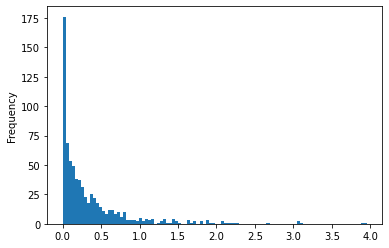

In [11]:
compliance_comparison['DELTA'].plot.hist(bins=100)

In [12]:
a = compliance_comparison[
    (compliance_comparison.CUMPRIMENTO_PROPORCIONAL_2017 == 0)&(compliance_comparison.CUMPRIMENTO_PROPORCIONAL_2018 == 0)
    ].shape[0]
b = compliance_comparison[
    (compliance_comparison.CUMPRIMENTO_PROPORCIONAL_2017 == 1)&(compliance_comparison.CUMPRIMENTO_PROPORCIONAL_2018 == 1)
    ].shape[0]
c = compliance_comparison[compliance_comparison.DELTA == 0].shape[0]

print(f'{b} full-time compliers represent {np.round(b/c, 2)} out of {c} consistent (0 delta) movie theaters')
print(f'{a} full-time non-compliers represent {np.round(a/c, 2)} out of {c} consistent (0 delta) movie theaters')

43 full-time compliers represent 0.96 out of 45 consistent (0 delta) movie theaters
1 full-time non-compliers represent 0.02 out of 45 consistent (0 delta) movie theaters


In [17]:
# checking for how many obs will be spread across diff bins

bounds = {}

# bounds to be used later
bounds['b1'] = [-0.1, 0.3, 0.6, 0.9, 1.2, 1.5, 50]
bounds['b2'] = [-0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 50]
bounds['b3'] = [-0.1, 0.4, 0.8, 1.2, 1.6, 50]
bounds['b4'] = [-0.1, 0.45, 0.85, 1.25, 1.65, 50]
bounds['b5'] = [-0.1, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 50]
bounds['b6'] = [-0.1, 0.85, 0.95, 1.05, 1.15, 50]

alpha = 'ABCDEFGHIJKLMNOPQRSTUVXZ'

for i in range(1,7):
    compliance_comparison[f'2017_B{i}'] = pd.cut(compliance_comparison.CUMPRIMENTO_PROPORCIONAL_2017, 
           bounds[f'b{i}'], labels=[alpha[i] for i in range(len(bounds[f'b{i}']) - 1)])
    compliance_comparison[f'2018_B{i}'] = pd.cut(compliance_comparison.CUMPRIMENTO_PROPORCIONAL_2018, 
           bounds[f'b{i}'], labels=[alpha[i] for i in range(len(bounds[f'b{i}']) - 1)])

In [22]:
b = tds_1718.shape[0]

for i in range(1,7):
    mts = np.where(compliance_comparison[f'2017_B{i}'] != compliance_comparison[f'2018_B{i}'], 1, 0).sum()
    mtt = compliance_comparison.shape[0]
    a = 2*(mtt - mts)
    print(f'For bounds B{i}, {mts} movie theaters will be shifted between bounds out of {mtt} movie theaters, meaning\
 {a} out of {b} observations (or {np.round(a/b,2)}) will have FE')

For bounds B1, 381 movie theaters will be shifted between bounds out of 721 movie theaters, meaning 680 out of 1525 observations (or 0.45) will have FE
For bounds B2, 438 movie theaters will be shifted between bounds out of 721 movie theaters, meaning 566 out of 1525 observations (or 0.37) will have FE
For bounds B3, 326 movie theaters will be shifted between bounds out of 721 movie theaters, meaning 790 out of 1525 observations (or 0.52) will have FE
For bounds B4, 321 movie theaters will be shifted between bounds out of 721 movie theaters, meaning 800 out of 1525 observations (or 0.52) will have FE
For bounds B5, 542 movie theaters will be shifted between bounds out of 721 movie theaters, meaning 358 out of 1525 observations (or 0.23) will have FE
For bounds B6, 375 movie theaters will be shifted between bounds out of 721 movie theaters, meaning 692 out of 1525 observations (or 0.45) will have FE


### Dependent variable: income

In [122]:
seg_regs = {} # creating dict to store regression objects

count_regs = 0 # counter to automatically generate reg numbers

#### Bounds - [0, 0.3, 0.6, 0.9, 1.2, 1.5, 50] 

In [123]:
bounds = [0, 0.3, 0.6, 0.9, 1.2, 1.5, 50] 

formul = 'np.log(RENDA) ~ OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + C(REGISTRO_COMPLEXO) + C(ANO_CINEMATOGRAFICO)'

last_count = count_regs

for i in range(len(bounds)-1):
    seg_regs[f'reg_seg{count_regs}'] = smf.ols(formula=formul, 
                    data = tds_1718[tds_1718.CUMPRIMENTO_PROPORCIONAL.between(bounds[i],bounds[i+1])]).fit()
    count_regs += 1
    seg_regs[f'reg_seg{count_regs}'] = smf.ols(formula=formul, 
                    data = est_1718[est_1718.CUMPRIMENTO_PROPORCIONAL.between(bounds[i],bounds[i+1])]).fit()
    count_regs += 1
    seg_regs[f'reg_seg{count_regs}'] = smf.ols(formula=formul, 
                    data = bras_1718[bras_1718.CUMPRIMENTO_PROPORCIONAL.between(bounds[i],bounds[i+1])]).fit()
    count_regs += 1

print(count_regs)

18


In [124]:
works = ['ALL', 'FOREIGN', 'BRAZILIAN']

for i in range(last_count,count_regs):
    print(f'Reg_seg {i}, {works[i%3]}: lower bound {bounds[(i-last_count)//3]}, higher bound {bounds[((i-last_count)//3)+1]}')
    print(pd.read_html(seg_regs[f'reg_seg{i}'].summary().
                       tables[1].as_html(),header=0,index_col=0)[0].iloc[-2:,:-2])
    print('\n')

Reg_seg 0, ALL: lower bound 0, higher bound 0.3
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0304    0.066  0.462  0.663
DIAS_FUNCIONAMENTO        0.0065    0.005  1.338  0.238


Reg_seg 1, FOREIGN: lower bound 0, higher bound 0.3
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0279    0.068  0.414  0.696
DIAS_FUNCIONAMENTO        0.0067    0.005  1.330  0.241


Reg_seg 2, BRAZILIAN: lower bound 0, higher bound 0.3
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA -0.1096    0.248 -0.443  0.735
DIAS_FUNCIONAMENTO        0.0207    0.106  0.195  0.877


Reg_seg 3, ALL: lower bound 0.3, higher bound 0.6
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0055    0.003  1.761  0.089
DIAS_FUNCIONAMENTO        0.0045    0.000  9.917  0.000


Reg_seg 4, FOREIGN: lower bound 0.3, higher bound 0.6
                            coef  std err       t  P>|t|
OBRIG

C:\Users\Pedro\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1728: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\Pedro\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1728: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\Pedro\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1650: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
C:\Users\Pedro\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1728: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\Pedro\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1728: RuntimeWarning: invalid value encountered in double_scalars
  return 1 




Reg_seg 15, ALL: lower bound 1.5, higher bound 50
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA -0.0053    0.011 -0.500  0.635
DIAS_FUNCIONAMENTO        0.0138    0.003  5.407  0.002


Reg_seg 16, FOREIGN: lower bound 1.5, higher bound 50
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0218    0.033  0.656  0.541
DIAS_FUNCIONAMENTO        0.0259    0.007  3.477  0.018


Reg_seg 17, BRAZILIAN: lower bound 1.5, higher bound 50
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA -0.0018    0.012 -0.143  0.891
DIAS_FUNCIONAMENTO        0.0097    0.003  3.505  0.013




#### Bounds - [0, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 50] 

In [125]:
bounds = [0, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 50] 

formul = 'np.log(RENDA) ~ OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + C(REGISTRO_COMPLEXO) + C(ANO_CINEMATOGRAFICO)'

last_count = count_regs

for i in range(len(bounds)-1):
    seg_regs[f'reg_seg{count_regs}'] = smf.ols(formula=formul, 
                    data = tds_1718[tds_1718.CUMPRIMENTO_PROPORCIONAL.between(bounds[i],bounds[i+1])]).fit()
    count_regs += 1
    seg_regs[f'reg_seg{count_regs}'] = smf.ols(formula=formul, 
                    data = est_1718[est_1718.CUMPRIMENTO_PROPORCIONAL.between(bounds[i],bounds[i+1])]).fit()
    count_regs += 1
    seg_regs[f'reg_seg{count_regs}'] = smf.ols(formula=formul, 
                    data = bras_1718[bras_1718.CUMPRIMENTO_PROPORCIONAL.between(bounds[i],bounds[i+1])]).fit()
    count_regs += 1

print(count_regs)

42


In [126]:
works = ['ALL', 'FOREIGN', 'BRAZILIAN']

for i in range(last_count,count_regs):
    print(f'Reg_seg {i}, {works[i%3]}: lower bound {bounds[(i-last_count)//3]}, higher bound {bounds[((i-last_count)//3)+1]}')
    print(pd.read_html(seg_regs[f'reg_seg{i}'].summary().
                       tables[1].as_html(),header=0,index_col=0)[0].iloc[-2:,:-2])
    print('\n')

Reg_seg 18, ALL: lower bound 0, higher bound 0.3
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0304    0.066  0.462  0.663
DIAS_FUNCIONAMENTO        0.0065    0.005  1.338  0.238


Reg_seg 19, FOREIGN: lower bound 0, higher bound 0.3
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0279    0.068  0.414  0.696
DIAS_FUNCIONAMENTO        0.0067    0.005  1.330  0.241


Reg_seg 20, BRAZILIAN: lower bound 0, higher bound 0.3
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA -0.1096    0.248 -0.443  0.735
DIAS_FUNCIONAMENTO        0.0207    0.106  0.195  0.877


Reg_seg 21, ALL: lower bound 0.3, higher bound 0.5
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0065    0.005  1.369  0.220
DIAS_FUNCIONAMENTO        0.0040    0.001  6.681  0.001


Reg_seg 22, FOREIGN: lower bound 0.3, higher bound 0.5
                            coef  std err      t  P>|t|
O

C:\Users\Pedro\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1728: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\Pedro\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1728: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\Pedro\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1650: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
C:\Users\Pedro\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1728: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\Pedro\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1728: RuntimeWarning: invalid value encountered in double_scalars
  return 1 

                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA -0.0053    0.011 -0.500  0.635
DIAS_FUNCIONAMENTO        0.0138    0.003  5.407  0.002


Reg_seg 40, FOREIGN: lower bound 1.5, higher bound 50
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0218    0.033  0.656  0.541
DIAS_FUNCIONAMENTO        0.0259    0.007  3.477  0.018


Reg_seg 41, BRAZILIAN: lower bound 1.5, higher bound 50
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA -0.0018    0.012 -0.143  0.891
DIAS_FUNCIONAMENTO        0.0097    0.003  3.505  0.013




#### Bounds - [0, 0.4, 0.8, 1.2, 1.6, 50]

In [127]:
bounds = [0, 0.4, 0.8, 1.2, 1.6, 50] 

last_count = count_regs

formul = 'np.log(RENDA) ~ OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + C(REGISTRO_COMPLEXO) + C(ANO_CINEMATOGRAFICO)'

for i in range(len(bounds)-1):
    seg_regs[f'reg_seg{count_regs}'] = smf.ols(formula=formul, 
                    data = tds_1718[tds_1718.CUMPRIMENTO_PROPORCIONAL.between(bounds[i],bounds[i+1])]).fit()
    count_regs += 1
    seg_regs[f'reg_seg{count_regs}'] = smf.ols(formula=formul, 
                    data = est_1718[est_1718.CUMPRIMENTO_PROPORCIONAL.between(bounds[i],bounds[i+1])]).fit()
    count_regs += 1
    seg_regs[f'reg_seg{count_regs}'] = smf.ols(formula=formul, 
                    data = bras_1718[bras_1718.CUMPRIMENTO_PROPORCIONAL.between(bounds[i],bounds[i+1])]).fit()
    count_regs += 1

print(count_regs)

57


In [128]:
works = ['ALL', 'FOREIGN', 'BRAZILIAN']

for i in range(last_count,count_regs):
    print(f'Reg_seg {i}, {works[i%3]}: lower bound {bounds[(i-last_count)//3]}, higher bound {bounds[((i-last_count)//3)+1]}')
    print(pd.read_html(seg_regs[f'reg_seg{i}'].summary().
                       tables[1].as_html(),header=0,index_col=0)[0].iloc[-2:,:-2])
    print('\n')

Reg_seg 42, ALL: lower bound 0, higher bound 0.4
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0210    0.031  0.677  0.510
DIAS_FUNCIONAMENTO        0.0056    0.003  2.207  0.044


Reg_seg 43, FOREIGN: lower bound 0, higher bound 0.4
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0207    0.033  0.632  0.538
DIAS_FUNCIONAMENTO        0.0057    0.003  2.101  0.054


Reg_seg 44, BRAZILIAN: lower bound 0, higher bound 0.4
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA -0.1005    0.053 -1.891  0.095
DIAS_FUNCIONAMENTO        0.0452    0.015  3.087  0.015


Reg_seg 45, ALL: lower bound 0.4, higher bound 0.8
                            coef  std err       t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0078    0.002   3.166  0.002
DIAS_FUNCIONAMENTO        0.0048    0.000  11.272  0.000


Reg_seg 46, FOREIGN: lower bound 0.4, higher bound 0.8
                            coef  std err       t  P>|

C:\Users\Pedro\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1728: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\Pedro\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1728: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\Pedro\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1650: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
C:\Users\Pedro\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1728: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\Pedro\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1728: RuntimeWarning: invalid value encountered in double_scalars
  return 1 

                            coef  std err  t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0829      inf  0    NaN
DIAS_FUNCIONAMENTO        0.0059      inf  0    NaN


Reg_seg 54, ALL: lower bound 1.6, higher bound 50
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA -0.0053    0.011 -0.500  0.635
DIAS_FUNCIONAMENTO        0.0138    0.003  5.407  0.002


Reg_seg 55, FOREIGN: lower bound 1.6, higher bound 50
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0218    0.033  0.656  0.541
DIAS_FUNCIONAMENTO        0.0259    0.007  3.477  0.018


Reg_seg 56, BRAZILIAN: lower bound 1.6, higher bound 50
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA -0.0018    0.012 -0.143  0.891
DIAS_FUNCIONAMENTO        0.0097    0.003  3.505  0.013




#### Bounds - [0, 0.45, 0.85, 1.25, 1.65, 50]

In [129]:
bounds = [0, 0.45, 0.85, 1.25, 1.65, 50] 

last_count = count_regs

formul = 'np.log(RENDA) ~ OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + C(REGISTRO_COMPLEXO) + C(ANO_CINEMATOGRAFICO)'

for i in range(len(bounds)-1):
    seg_regs[f'reg_seg{count_regs}'] = smf.ols(formula=formul, 
                    data = tds_1718[tds_1718.CUMPRIMENTO_PROPORCIONAL.between(bounds[i],bounds[i+1])]).fit()
    count_regs += 1
    seg_regs[f'reg_seg{count_regs}'] = smf.ols(formula=formul, 
                    data = est_1718[est_1718.CUMPRIMENTO_PROPORCIONAL.between(bounds[i],bounds[i+1])]).fit()
    count_regs += 1
    seg_regs[f'reg_seg{count_regs}'] = smf.ols(formula=formul, 
                    data = bras_1718[bras_1718.CUMPRIMENTO_PROPORCIONAL.between(bounds[i],bounds[i+1])]).fit()
    count_regs += 1

print(count_regs)

72


In [130]:
works = ['ALL', 'FOREIGN', 'BRAZILIAN']

for i in range(last_count,count_regs):
    print(f'Reg_seg {i}, {works[i%3]}: lower bound {bounds[(i-last_count)//3]}, higher bound {bounds[((i-last_count)//3)+1]}')
    print(pd.read_html(seg_regs[f'reg_seg{i}'].summary().
                       tables[1].as_html(),header=0,index_col=0)[0].iloc[-2:,:-2])
    print('\n')

Reg_seg 57, ALL: lower bound 0, higher bound 0.45
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0194    0.017  1.158   0.26
DIAS_FUNCIONAMENTO        0.0059    0.001  4.153   0.00


Reg_seg 58, FOREIGN: lower bound 0, higher bound 0.45
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0183    0.018  1.042  0.309
DIAS_FUNCIONAMENTO        0.0060    0.001  4.041  0.001


Reg_seg 59, BRAZILIAN: lower bound 0, higher bound 0.45
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA -0.0035    0.037 -0.094  0.926
DIAS_FUNCIONAMENTO        0.0212    0.008  2.567  0.021


Reg_seg 60, ALL: lower bound 0.45, higher bound 0.85
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0061    0.003  2.163  0.034
DIAS_FUNCIONAMENTO        0.0048    0.001  9.524  0.000


Reg_seg 61, FOREIGN: lower bound 0.45, higher bound 0.85
                            coef  std err      t  

C:\Users\Pedro\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1728: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\Pedro\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1728: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\Pedro\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1650: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
C:\Users\Pedro\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1728: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\Pedro\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1728: RuntimeWarning: invalid value encountered in double_scalars
  return 1 

                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0218    0.033  0.656  0.541
DIAS_FUNCIONAMENTO        0.0259    0.007  3.477  0.018


Reg_seg 71, BRAZILIAN: lower bound 1.65, higher bound 50
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA -0.0018    0.012 -0.143  0.891
DIAS_FUNCIONAMENTO        0.0097    0.003  3.505  0.013




#### Bounds - [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 50]

In [131]:
bounds = [x/10 for x in range(14)]
bounds.append(50)

last_count = count_regs

formul = 'np.log(RENDA) ~ OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + C(REGISTRO_COMPLEXO) + C(ANO_CINEMATOGRAFICO)'

for i in range(len(bounds)-1):
    seg_regs[f'reg_seg{count_regs}'] = smf.ols(formula=formul, 
                    data = tds_1718[tds_1718.CUMPRIMENTO_PROPORCIONAL.between(bounds[i],bounds[i+1])]).fit()
    count_regs += 1
    seg_regs[f'reg_seg{count_regs}'] = smf.ols(formula=formul, 
                    data = est_1718[est_1718.CUMPRIMENTO_PROPORCIONAL.between(bounds[i],bounds[i+1])]).fit()
    count_regs += 1
    seg_regs[f'reg_seg{count_regs}'] = smf.ols(formula=formul, 
                    data = bras_1718[bras_1718.CUMPRIMENTO_PROPORCIONAL.between(bounds[i],bounds[i+1])]).fit()
    count_regs += 1

print(count_regs)

114


In [132]:
works = ['ALL', 'FOREIGN', 'BRAZILIAN']

for i in range(last_count,count_regs):
    print(f'Reg_seg {i}, {works[i%3]}: lower bound {bounds[(i-last_count)//3]}, higher bound {bounds[((i-last_count)//3)+1]}')
    print(pd.read_html(seg_regs[f'reg_seg{i}'].summary().
                       tables[1].as_html(),header=0,index_col=0)[0].iloc[-2:,:-2])
    print('\n')

Reg_seg 72, ALL: lower bound 0.0, higher bound 0.1
                            coef  std err  t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA -0.0566      inf  0    NaN
DIAS_FUNCIONAMENTO        0.0118      inf  0    NaN


Reg_seg 73, FOREIGN: lower bound 0.0, higher bound 0.1
                            coef  std err  t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA -0.0690      inf  0    NaN
DIAS_FUNCIONAMENTO        0.0119      inf  0    NaN


Reg_seg 74, BRAZILIAN: lower bound 0.0, higher bound 0.1
                            coef  std err  t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0608      inf  0    NaN
DIAS_FUNCIONAMENTO        0.1112      inf  0    NaN


Reg_seg 75, ALL: lower bound 0.1, higher bound 0.2
                            coef  std err  t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.1663      inf  0    NaN
DIAS_FUNCIONAMENTO        0.0107      inf  0    NaN


Reg_seg 76, FOREIGN: lower bound 0.1, higher bound 0.2
                            coef  std err  t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.1663      inf  0   

C:\Users\Pedro\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1728: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\Pedro\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1728: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\Pedro\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1650: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
C:\Users\Pedro\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1728: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\Pedro\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1728: RuntimeWarning: invalid value encountered in double_scalars
  return 1 

                            coef  std err  t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0315      inf  0    NaN
DIAS_FUNCIONAMENTO        0.0117      inf  0    NaN


Reg_seg 79, FOREIGN: lower bound 0.2, higher bound 0.3
                            coef  std err  t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0309      inf  0    NaN
DIAS_FUNCIONAMENTO        0.0122      inf  0    NaN


Reg_seg 80, BRAZILIAN: lower bound 0.2, higher bound 0.3
                            coef  std err  t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0411      inf  0    NaN
DIAS_FUNCIONAMENTO        0.0105      inf  0    NaN


Reg_seg 81, ALL: lower bound 0.3, higher bound 0.4
                            coef  std err  t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0255      inf  0    NaN
DIAS_FUNCIONAMENTO        0.0028      inf  0    NaN


Reg_seg 82, FOREIGN: lower bound 0.3, higher bound 0.4
                            coef  std err  t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0262      inf  0    NaN
DIAS_FUNCIONAMENTO        0.0034      inf  0  

C:\Users\Pedro\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1728: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\Pedro\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1728: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\Pedro\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1650: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
C:\Users\Pedro\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1728: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\Pedro\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1728: RuntimeWarning: invalid value encountered in double_scalars
  return 1 

                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0004    0.001  0.276  0.809
DIAS_FUNCIONAMENTO        0.0033    0.001  3.919  0.059


Reg_seg 85, FOREIGN: lower bound 0.4, higher bound 0.5
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA -0.0025    0.001 -4.039  0.056
DIAS_FUNCIONAMENTO        0.0030    0.000  7.629  0.017


Reg_seg 86, BRAZILIAN: lower bound 0.4, higher bound 0.5
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0413    0.018  2.239  0.155
DIAS_FUNCIONAMENTO        0.0156    0.009  1.795  0.215


Reg_seg 87, ALL: lower bound 0.5, higher bound 0.6
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0121    0.006  1.939  0.110
DIAS_FUNCIONAMENTO        0.0051    0.001  7.140  0.001


Reg_seg 88, FOREIGN: lower bound 0.5, higher bound 0.6
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0108    0.007  1.6

C:\Users\Pedro\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1728: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\Pedro\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1728: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\Pedro\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1650: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
C:\Users\Pedro\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1728: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\Pedro\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1728: RuntimeWarning: invalid value encountered in double_scalars
  return 1 

                            coef  std err  t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0805      inf  0    NaN
DIAS_FUNCIONAMENTO        0.0051      inf  0    NaN


Reg_seg 97, FOREIGN: lower bound 0.8, higher bound 0.9
                            coef  std err  t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.3410      inf  0    NaN
DIAS_FUNCIONAMENTO       -0.0227      inf  0    NaN


Reg_seg 98, BRAZILIAN: lower bound 0.8, higher bound 0.9
                            coef  std err  t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.8416      inf  0    NaN
DIAS_FUNCIONAMENTO       -0.1754      inf  0    NaN


Reg_seg 99, ALL: lower bound 0.9, higher bound 1.0
                            coef  std err       t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA -0.0005    0.001  -0.381  0.704
DIAS_FUNCIONAMENTO        0.0050    0.000  10.686  0.000


Reg_seg 100, FOREIGN: lower bound 0.9, higher bound 1.0
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA -0.0017    0.002 -1.127  0.264
DIAS_FUNCIONAMENTO    

C:\Users\Pedro\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1728: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\Pedro\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1728: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\Pedro\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1650: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
C:\Users\Pedro\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1728: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\Pedro\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1728: RuntimeWarning: invalid value encountered in double_scalars
  return 1 

                            coef  std err  t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0676      inf  0    NaN
DIAS_FUNCIONAMENTO        0.0063      inf  0    NaN


Reg_seg 110, BRAZILIAN: lower bound 1.2, higher bound 1.3
                            coef  std err  t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.1256      inf  0    NaN
DIAS_FUNCIONAMENTO        0.0055      inf  0    NaN


Reg_seg 111, ALL: lower bound 1.3, higher bound 50
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA -0.0055    0.010 -0.559  0.593
DIAS_FUNCIONAMENTO        0.0139    0.002  5.889  0.001


Reg_seg 112, FOREIGN: lower bound 1.3, higher bound 50
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0227    0.032  0.706  0.507
DIAS_FUNCIONAMENTO        0.0263    0.007  3.632  0.011


Reg_seg 113, BRAZILIAN: lower bound 1.3, higher bound 50


C:\Users\Pedro\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1728: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\Pedro\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1728: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\Pedro\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1650: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA -0.0019    0.011 -0.170  0.870
DIAS_FUNCIONAMENTO        0.0098    0.003  3.884  0.006




#### Bounds - [0, 0.85, 0.95, 1.05, 1.15, 50]

In [133]:
bounds = [0, 0.85, 0.95, 1.05, 1.15, 50]

last_count = count_regs

formul = 'np.log(RENDA) ~ OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + C(REGISTRO_COMPLEXO) + C(ANO_CINEMATOGRAFICO)'

for i in range(len(bounds)-1):
    seg_regs[f'reg_seg{count_regs}'] = smf.ols(formula=formul, 
                    data = tds_1718[tds_1718.CUMPRIMENTO_PROPORCIONAL.between(bounds[i],bounds[i+1])]).fit()
    count_regs += 1
    seg_regs[f'reg_seg{count_regs}'] = smf.ols(formula=formul, 
                    data = est_1718[est_1718.CUMPRIMENTO_PROPORCIONAL.between(bounds[i],bounds[i+1])]).fit()
    count_regs += 1
    seg_regs[f'reg_seg{count_regs}'] = smf.ols(formula=formul, 
                    data = bras_1718[bras_1718.CUMPRIMENTO_PROPORCIONAL.between(bounds[i],bounds[i+1])]).fit()
    count_regs += 1

print(count_regs)

129


In [134]:
works = ['ALL', 'FOREIGN', 'BRAZILIAN']

for i in range(last_count,count_regs):
    print(f'Reg_seg {i}, {works[i%3]}: lower bound {bounds[(i-last_count)//3]}, higher bound {bounds[((i-last_count)//3)+1]}')
    print(pd.read_html(seg_regs[f'reg_seg{i}'].summary().
                       tables[1].as_html(),header=0,index_col=0)[0].iloc[-2:,:-2])
    print('\n')

Reg_seg 114, ALL: lower bound 0, higher bound 0.85
                            coef  std err       t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0037    0.002   1.755  0.081
DIAS_FUNCIONAMENTO        0.0064    0.000  17.074  0.000


Reg_seg 115, FOREIGN: lower bound 0, higher bound 0.85
                            coef  std err       t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0037    0.002   1.852  0.066
DIAS_FUNCIONAMENTO        0.0065    0.000  17.839  0.000


Reg_seg 116, BRAZILIAN: lower bound 0, higher bound 0.85
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA -0.0041    0.005 -0.865  0.389
DIAS_FUNCIONAMENTO        0.0115    0.002  5.900  0.000


Reg_seg 117, ALL: lower bound 0.85, higher bound 0.95
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0952    0.081  1.178  0.448
DIAS_FUNCIONAMENTO        0.0195    0.009  2.097  0.283


Reg_seg 118, FOREIGN: lower bound 0.85, higher bound 0.95
                            coef  std e

#### Bounds - [0.99, 1.01]

In [135]:
bounds = [0.99, 1.01]

last_count = count_regs

formul = 'np.log(RENDA) ~ OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + C(REGISTRO_COMPLEXO) + C(ANO_CINEMATOGRAFICO)'

for i in range(len(bounds)-1):
    seg_regs[f'reg_seg{count_regs}'] = smf.ols(formula=formul, 
                    data = tds_1718[tds_1718.CUMPRIMENTO_PROPORCIONAL.between(bounds[i],bounds[i+1])]).fit()
    count_regs += 1
    seg_regs[f'reg_seg{count_regs}'] = smf.ols(formula=formul, 
                    data = est_1718[est_1718.CUMPRIMENTO_PROPORCIONAL.between(bounds[i],bounds[i+1])]).fit()
    count_regs += 1
    seg_regs[f'reg_seg{count_regs}'] = smf.ols(formula=formul, 
                    data = bras_1718[bras_1718.CUMPRIMENTO_PROPORCIONAL.between(bounds[i],bounds[i+1])]).fit()
    count_regs += 1

print(count_regs)

132


In [136]:
works = ['ALL', 'FOREIGN', 'BRAZILIAN']

for i in range(last_count,count_regs):
    print(f'Reg_seg {i}, {works[i%3]}: lower bound {bounds[(i-last_count)//3]}, higher bound {bounds[((i-last_count)//3)+1]}')
    print(pd.read_html(seg_regs[f'reg_seg{i}'].summary().
                       tables[1].as_html(),header=0,index_col=0)[0].iloc[-2:,:-2])
    print('\n')

Reg_seg 129, ALL: lower bound 0.99, higher bound 1.01
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0011    0.002  0.734  0.466
DIAS_FUNCIONAMENTO        0.0012    0.002  0.691  0.492


Reg_seg 130, FOREIGN: lower bound 0.99, higher bound 1.01
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA -0.0013    0.002 -0.774  0.441
DIAS_FUNCIONAMENTO        0.0027    0.002  1.360  0.178


Reg_seg 131, BRAZILIAN: lower bound 0.99, higher bound 1.01
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0286    0.006  4.469    0.0
DIAS_FUNCIONAMENTO       -0.0062    0.002 -3.786    0.0




## Alternative regressions

In [14]:
tds_1719.columns

Index(['ANO_CINEMATOGRAFICO', 'QTDE_TIT_DIF_EXIB', 'PUBLICO', 'RENDA',
       'DATA_HORA_SESSAO', 'DIAS_FUNCIONAMENTO', 'TOT_SALAS_FUNC',
       'REGISTRO_SALA', 'SALAS_COMPLEXO_INFERIDO',
       'ASSENTOS_COMPLEXO_INFERIDO', 'UF_COMPLEXO', 'OBRIGAÇÃO_TOTAL_POR_SALA',
       'OBRIGAÇÃO_TOTAL_INCREMENTO_POR_SALA', 'OBRIGAÇÃO_PROP_POR_SALA',
       'OBRIGAÇÃO_PROP_INCREMENTO_POR_SALA', 'OBRIGAÇÃO_FINAL_POR_SALA',
       'CUMPRIMENTO_PROP_TRUNCADO', 'CUMPRIMENTO_NORMALIZADO', 'TRANSF_ORIGEM',
       'TRANSF_RECEBIDOS', 'CUMPRIU_COTA', 'TOTAL_SALAS',
       'DIAS_FUNC_INFERIDOS', 'CUMPRIMENTO_PROPORCIONAL', 'CUMPRIMENTO_LINEAR',
       'CUMPRIMENTO_TRIWEIGHT', 'REGISTRO_COMPLEXO', 'REG_EMPRESA',
       'REGISTRO_GRUPO', 'CEP_COMPLEXO', 'MUN_COMPLEXO'],
      dtype='object')

In [23]:
# renaming cols

tds_1719.columns = ['ANO_CINEMATOGRAFICO', 'QTDE_TIT_DIF_EXIB', 'PUBLICO', 'RENDA',
       'DATA_HORA_SESSAO', 'DIAS_FUNCIONAMENTO', 'TOT_SALAS_FUNC',
       'REGISTRO_SALA', 'SALAS_COMPLEXO_INFERIDO',
       'ASSENTOS_COMPLEXO_INFERIDO', 'UF_COMPLEXO', 'OBRIGAÇÃO_TOTAL_POR_SALA',
       'OBRIGAÇÃO_TOTAL_INCREMENTO_POR_SALA', 'OBRIGAÇÃO_PROP_POR_SALA',
       'OBRIGAÇÃO_PROP_INCREMENTO_POR_SALA', 'OBRIGAÇÃO_FINAL_POR_SALA',
       'CUMP_QUADRATIC', 'CUMP_NORMALIZADO', 'TRANSF_ORIGEM',
       'TRANSF_RECEBIDOS', 'CUMPRIU_COTA', 'TOTAL_SALAS',
       'DIAS_FUNC_INFERIDOS', 'CUMPRIMENTO_PROPORCIONAL', 'CUMP_LINEAR',
       'CUMP_TRIWEIGHT', 'REGISTRO_COMPLEXO', 'REG_EMPRESA',
       'REGISTRO_GRUPO', 'CEP_COMPLEXO', 'MUN_COMPLEXO']

est_1719.columns = tds_1719.columns
bras_1719.columns = tds_1719.columns
tds_1718.columns = tds_1719.columns
est_1718.columns = tds_1719.columns
bras_1718.columns = tds_1719.columns

### Dependent variable: number of sessions

In [19]:
complex_days = {}

d_count = 0

weight_funcs = [
    'CUMP_QUADRATIC','CUMP_NORMALIZADO', 'CUMP_LINEAR','CUMP_TRIWEIGHT']

#### 2017-2019

In [20]:
last_d_count = d_count # to get num range of regressions to be executed

for f in weight_funcs:
    # adjust formula as we run through the weighting funcs
    formul = f'DIAS_FUNCIONAMENTO ~ OBRIGAÇÃO_TOTAL_POR_SALA*{f} + C(REGISTRO_COMPLEXO) + C(ANO_CINEMATOGRAFICO)'
    complex_days[f'reg_cd{d_count}'] = smf.ols(formula = formul, data=tds_1719).fit()
    d_count += 1
    complex_days[f'reg_cd{d_count}'] = smf.ols(formula = formul, data=est_1719).fit()
    d_count += 1
    complex_days[f'reg_cd{d_count}'] = smf.ols(formula = formul, data=bras_1719).fit()
    d_count += 1

In [21]:
works = ['ALL', 'FOREIGN', 'BRAZILIAN']

for i in range(last_d_count, d_count):
    print(f'Reg_complex_days {i}, {works[i%3]}, weighting function {weight_funcs[(i-last_d_count)//3]}:')
    print(pd.read_html(complex_days[f'reg_cd{i}'].summary().
                       tables[1].as_html(),header=0,index_col=0)[0].iloc[-3:,:-2])
    print('\n')

Reg_complex_days 0, ALL, weighting function CUMP_QUADRATIC:
                                            coef  std err      t  P>|t|
OBRIGAÇÃO_TOTAL_POR_SALA                 -0.3288    0.772 -0.426  0.670
CUMP_QUADRATIC                           37.0108   29.696  1.246  0.213
OBRIGAÇÃO_TOTAL_POR_SALA:CUMP_QUADRATIC   0.5683    0.823  0.690  0.490


Reg_complex_days 1, FOREIGN, weighting function CUMP_QUADRATIC:
                                            coef  std err      t  P>|t|
OBRIGAÇÃO_TOTAL_POR_SALA                 -0.4326    0.773 -0.560  0.576
CUMP_QUADRATIC                           34.4065   29.829  1.153  0.249
OBRIGAÇÃO_TOTAL_POR_SALA:CUMP_QUADRATIC   0.6174    0.823  0.750  0.453


Reg_complex_days 2, BRAZILIAN, weighting function CUMP_QUADRATIC:
                                             coef  std err      t  P>|t|
OBRIGAÇÃO_TOTAL_POR_SALA                  -3.1930    0.527 -6.058    0.0
CUMP_QUADRATIC                          -119.4115   20.822 -5.735    0.0
OBRIGAÇÃO_T

#### 2017-2018

In [24]:
last_d_count = d_count # to get num range of regressions to be executed

for f in weight_funcs:
    # adjust formula as we run through the weighting funcs
    formul = f'DIAS_FUNCIONAMENTO ~ OBRIGAÇÃO_TOTAL_POR_SALA*{f} + C(REGISTRO_COMPLEXO) + C(ANO_CINEMATOGRAFICO)'
    complex_days[f'reg_cd{d_count}'] = smf.ols(formula = formul, data=tds_1718).fit()
    d_count += 1
    complex_days[f'reg_cd{d_count}'] = smf.ols(formula = formul, data=est_1718).fit()
    d_count += 1
    complex_days[f'reg_cd{d_count}'] = smf.ols(formula = formul, data=bras_1718).fit()
    d_count += 1

In [26]:
works = ['ALL', 'FOREIGN', 'BRAZILIAN']

for i in range(last_d_count, d_count):
    print(f'Reg_complex_days {i}, {works[i%3]}, weighting function {weight_funcs[(i-last_d_count)//3]}:')
    print(pd.read_html(complex_days[f'reg_cd{i}'].summary().
                       tables[1].as_html(),header=0,index_col=0)[0].iloc[-3:,:-2])
    print('\n')

Reg_complex_days 12, ALL, weighting function CUMP_QUADRATIC:
                                            coef  std err      t  P>|t|
OBRIGAÇÃO_TOTAL_POR_SALA                  0.1607    2.455  0.065  0.948
CUMP_QUADRATIC                           48.1702   41.535  1.160  0.247
OBRIGAÇÃO_TOTAL_POR_SALA:CUMP_QUADRATIC   0.3867    1.157  0.334  0.738


Reg_complex_days 13, FOREIGN, weighting function CUMP_QUADRATIC:
                                            coef  std err      t  P>|t|
OBRIGAÇÃO_TOTAL_POR_SALA                  0.1350    2.423  0.056  0.956
CUMP_QUADRATIC                           49.8296   40.988  1.216  0.224
OBRIGAÇÃO_TOTAL_POR_SALA:CUMP_QUADRATIC   0.3346    1.142  0.293  0.770


Reg_complex_days 14, BRAZILIAN, weighting function CUMP_QUADRATIC:
                                             coef  std err      t  P>|t|
OBRIGAÇÃO_TOTAL_POR_SALA                   2.5337    1.457  1.739  0.082
CUMP_QUADRATIC                          -133.0333   26.417 -5.036  0.000
OBRIGAÇÃ

# Chain/year regressions

## Import and adjust

In [27]:
# import
gtds_1719 = pd.read_csv('SCB_Grupo x Ano - 2017 a 2019 - mesclado fiscalização.csv')
gest_1719 = pd.read_csv('SCB_Grupo x Ano (receita estrangeiros) - 2017 a 2019 - mesclado fiscalização.csv')
gbras_1719 = pd.read_csv('SCB_Grupo x Ano (receita brasileiros) - 2017 a 2019 - mesclado fiscalização.csv')

In [28]:
gtds_1719.REGISTRO_GRUPO.nunique()

240

In [29]:
gtds_1719.columns

Index(['ANO_CINEMATOGRAFICO', 'QTDE_TIT_DIF_EXIB', 'PUBLICO', 'RENDA',
       'DATA_HORA_SESSAO', 'DIAS_FUNCIONAMENTO', 'REG_EMPRESA',
       'REGISTRO_COMPLEXO', 'REGISTRO_SALA', 'GRUPO_EXIBIDOR',
       'SALAS_GRUPO_INFERIDO', 'ASSENTOS_GRUPO_INFERIDO',
       'OBRIGAÇÃO_TOTAL_POR_SALA', 'OBRIGAÇÃO_TOTAL_INCREMENTO_POR_SALA',
       'OBRIGAÇÃO_PROP_POR_SALA', 'OBRIGAÇÃO_PROP_INCREMENTO_POR_SALA',
       'OBRIGAÇÃO_FINAL_POR_SALA', 'CUMP_QUADRATIC', 'CUMP_NORMALIZADO',
       'TRANSF_ORIGEM', 'TRANSF_RECEBIDOS', 'CUMPRIMENTO_PROPORCIONAL',
       'CUMP_LINEAR', 'CUMP_TRIWEIGHT', 'REGISTRO_GRUPO'],
      dtype='object')

In [30]:
gtds_1719.columns = ['ANO_CINEMATOGRAFICO', 'QTDE_TIT_DIF_EXIB', 'PUBLICO', 'RENDA',
       'DATA_HORA_SESSAO', 'DIAS_FUNCIONAMENTO', 'REG_EMPRESA',
       'REGISTRO_COMPLEXO', 'REGISTRO_SALA', 'GRUPO_EXIBIDOR',
       'SALAS_GRUPO_INFERIDO', 'ASSENTOS_GRUPO_INFERIDO',
       'OBRIGAÇÃO_TOTAL_POR_SALA', 'OBRIGAÇÃO_TOTAL_INCREMENTO_POR_SALA',
       'OBRIGAÇÃO_PROP_POR_SALA', 'OBRIGAÇÃO_PROP_INCREMENTO_POR_SALA',
       'OBRIGAÇÃO_FINAL_POR_SALA', 'CUMP_QUADRATIC',
       'CUMP_NORMALIZADO', 'TRANSF_ORIGEM', 'TRANSF_RECEBIDOS',
       'CUMPRIMENTO_PROPORCIONAL', 'CUMP_LINEAR',
       'CUMP_TRIWEIGHT', 'REGISTRO_GRUPO']

gest_1719.columns = gtds_1719.columns
gbras_1719.columns = gtds_1719.columns

In [31]:
# getting panels without 2019
gtds_1718 = gtds_1719[gtds_1719.ANO_CINEMATOGRAFICO != 2019]
gest_1718 = gest_1719[gest_1719.ANO_CINEMATOGRAFICO != 2019]
gbras_1718 = gbras_1719[gbras_1719.ANO_CINEMATOGRAFICO != 2019]

In [28]:
# export for R
gtds_1719.to_csv('SCB_Grupo x Ano - 2017 a 2019 - mesclado fiscalização.csv',index=False)
gest_1719.to_csv('SCB_Grupo x Ano (receita estrangeiros) - 2017 a 2019 - mesclado fiscalização.csv',index=False)
gbras_1719.to_csv('SCB_Grupo x Ano (receita brasileiros) - 2017 a 2019 - mesclado fiscalização.csv',index=False)

gtds_1718.to_csv('SCB_Grupo x Ano - 2017 a 2018 - mesclado fiscalização.csv',index=False)
gest_1718.to_csv('SCB_Grupo x Ano (receita estrangeiros) - 2017 a 2018 - mesclado fiscalização.csv',index=False)
gbras_1718.to_csv('SCB_Grupo x Ano (receita brasileiros) - 2017 a 2018 - mesclado fiscalização.csv',index=False)

## Naïve regressions

Define movie-theater chain $i$ in year $t$ and title "nationality" (meaning all, foreign or Brazilian movie sessions) and nominal screen quota obligation $SQ$:

$$ \ln(Y_{nit}) = \beta_0 + \beta_1 SQ_{it} + \theta X_{it} + \varepsilon_{it} $$

$Y$ is the interest variable that can be either Yearly Income or total public (# of moviegoers). $X_{it}$ is a vector of controls with opening days, movie theater fixed-effects and year fixed-effects. Alternatively, we also drop entity fixed-effects and use number of viewing rooms and seats per movie-theater as controls.

In [17]:
group_naive = {}

g_count = 0

### Dependent variable: income

#### With entity fixed-effects

##### 2017-2019

In [18]:
formul = 'np.log(RENDA) ~ OBRIGAÇÃO_TOTAL_POR_SALA + DIAS_FUNCIONAMENTO + C(REGISTRO_GRUPO) + C(ANO_CINEMATOGRAFICO)'

last_g_count = g_count

group_naive[f'reg_gn{g_count}'] = smf.ols(formula = formul, data=gtds_1719).fit()
g_count += 1

group_naive[f'reg_gn{g_count}'] = smf.ols(formula = formul, data=gest_1719).fit()
g_count += 1

group_naive[f'reg_gn{g_count}'] = smf.ols(formula = formul, data=gbras_1719).fit()
g_count += 1

In [19]:
works = ['ALL', 'FOREIGN', 'BRAZILIAN']

for i in range(last_g_count, g_count):
    print(f'Reg_group {i}, {works[i%3]}:')
    print(pd.read_html(group_naive[f'reg_gn{i}'].summary().
                       tables[1].as_html(),header=0,index_col=0)[0].iloc[-2:,:-2])
    print('\n')

Reg_group 0, ALL:
                            coef  std err      t  P>|t|
OBRIGAÇÃO_TOTAL_POR_SALA  0.0088    0.004  1.968   0.05
DIAS_FUNCIONAMENTO        0.0011    0.000  7.144   0.00


Reg_group 1, FOREIGN:
                            coef  std err      t  P>|t|
OBRIGAÇÃO_TOTAL_POR_SALA  0.0100    0.005  2.204  0.028
DIAS_FUNCIONAMENTO        0.0011    0.000  6.872  0.000


Reg_group 2, BRAZILIAN:
                            coef  std err      t  P>|t|
OBRIGAÇÃO_TOTAL_POR_SALA  0.0083    0.006  1.322  0.187
DIAS_FUNCIONAMENTO        0.0007    0.000  3.168  0.002




##### 2017-2018

In [20]:
formul = 'np.log(RENDA) ~ OBRIGAÇÃO_TOTAL_POR_SALA + DIAS_FUNCIONAMENTO + C(REGISTRO_GRUPO) + C(ANO_CINEMATOGRAFICO)'

last_g_count = g_count

group_naive[f'reg_gn{g_count}'] = smf.ols(formula = formul, data=gtds_1718).fit()
g_count += 1

group_naive[f'reg_gn{g_count}'] = smf.ols(formula = formul, data=gest_1718).fit()
g_count += 1

group_naive[f'reg_gn{g_count}'] = smf.ols(formula = formul, data=gbras_1718).fit()
g_count += 1

In [21]:
works = ['ALL', 'FOREIGN', 'BRAZILIAN']

for i in range(last_g_count, g_count):
    print(f'Reg_group {i}, {works[i%3]}:')
    print(pd.read_html(group_naive[f'reg_gn{i}'].summary().
                       tables[1].as_html(),header=0,index_col=0)[0].iloc[-2:,:-2])
    print('\n')

Reg_group 3, ALL:
                            coef  std err      t  P>|t|
OBRIGAÇÃO_TOTAL_POR_SALA -0.0391    0.043 -0.901  0.369
DIAS_FUNCIONAMENTO        0.0013    0.000  5.127  0.000


Reg_group 4, FOREIGN:
                            coef  std err      t  P>|t|
OBRIGAÇÃO_TOTAL_POR_SALA -0.0394    0.045 -0.881  0.379
DIAS_FUNCIONAMENTO        0.0013    0.000  4.676  0.000


Reg_group 5, BRAZILIAN:
                            coef  std err      t  P>|t|
OBRIGAÇÃO_TOTAL_POR_SALA  0.0402    0.065  0.621  0.535
DIAS_FUNCIONAMENTO        0.0007    0.000  1.850  0.066




#### Without entity fixed-effects

##### 2017-2019

In [22]:
formul = 'np.log(RENDA) ~ OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + SALAS_GRUPO_INFERIDO + ASSENTOS_GRUPO_INFERIDO + C(ANO_CINEMATOGRAFICO)'
last_g_count = g_count

group_naive[f'reg_gn{g_count}'] = smf.ols(formula = formul, data=gtds_1719).fit()
g_count += 1

group_naive[f'reg_gn{g_count}'] = smf.ols(formula = formul, data=gest_1719).fit()
g_count += 1

group_naive[f'reg_gn{g_count}'] = smf.ols(formula = formul, data=gbras_1719).fit()
g_count += 1

In [24]:
works = ['ALL', 'FOREIGN', 'BRAZILIAN']

for i in range(last_g_count, g_count):
    print(f'Reg_group {i}, {works[i%3]}:')
    print(pd.read_html(group_naive[f'reg_gn{i}'].summary().
                       tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2])
    print('\n')

Reg_group 6, ALL:
                            coef   std err       t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0940  0.006000  16.470  0.000
DIAS_FUNCIONAMENTO        0.0009  0.000085  10.364  0.000
SALAS_GRUPO_INFERIDO      0.0439  0.015000   2.921  0.004
ASSENTOS_GRUPO_INFERIDO  -0.0003  0.000061  -5.370  0.000


Reg_group 7, FOREIGN:
                            coef   std err       t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0959  0.006000  15.873  0.000
DIAS_FUNCIONAMENTO        0.0009  0.000089   9.866  0.000
SALAS_GRUPO_INFERIDO      0.0430  0.016000   2.716  0.007
ASSENTOS_GRUPO_INFERIDO  -0.0003  0.000064  -5.045  0.000


Reg_group 8, BRAZILIAN:
                            coef   std err       t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0949  0.006000  15.751    0.0
DIAS_FUNCIONAMENTO        0.0008  0.000084   9.411    0.0
SALAS_GRUPO_INFERIDO      0.0636  0.015000   4.272    0.0
ASSENTOS_GRUPO_INFERIDO  -0.0004  0.000061  -6.551    0.0




##### 2017-2018

In [25]:
formul = 'np.log(RENDA) ~ OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + SALAS_GRUPO_INFERIDO + ASSENTOS_GRUPO_INFERIDO + C(ANO_CINEMATOGRAFICO)'

last_g_count = g_count

group_naive[f'reg_gn{g_count}'] = smf.ols(formula = formul, data=gtds_1718).fit()
g_count += 1

group_naive[f'reg_gn{g_count}'] = smf.ols(formula = formul, data=gest_1718).fit()
g_count += 1

group_naive[f'reg_gn{g_count}'] = smf.ols(formula = formul, data=gbras_1718).fit()
g_count += 1

In [26]:
works = ['ALL', 'FOREIGN', 'BRAZILIAN']

for i in range(last_g_count, g_count):
    print(f'Reg_group {i}, {works[i%3]}:')
    print(pd.read_html(group_naive[f'reg_gn{i}'].summary().
                       tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2])
    print('\n')

Reg_group 9, ALL:
                            coef   std err       t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.1011  0.005000  18.662  0.000
DIAS_FUNCIONAMENTO        0.0008  0.000095   8.632  0.000
SALAS_GRUPO_INFERIDO      0.0201  0.018000   1.108  0.269
ASSENTOS_GRUPO_INFERIDO  -0.0002  0.000073  -2.993  0.003


Reg_group 10, FOREIGN:
                            coef  std err       t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.1030  0.00600  17.457  0.000
DIAS_FUNCIONAMENTO        0.0008  0.00000   8.078  0.000
SALAS_GRUPO_INFERIDO      0.0183  0.02000   0.934  0.351
ASSENTOS_GRUPO_INFERIDO  -0.0002  0.00008  -2.696  0.007


Reg_group 11, BRAZILIAN:
                            coef   std err       t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.1018  0.006000  17.734   0.00
DIAS_FUNCIONAMENTO        0.0008  0.000095   8.001   0.00
SALAS_GRUPO_INFERIDO      0.0393  0.018000   2.179   0.03
ASSENTOS_GRUPO_INFERIDO  -0.0003  0.000073  -3.971   0.00




### Dependent variable: public (moviegoers)

#### With entity fixed-effects

##### 2017-2019

In [27]:
formul = 'np.log(PUBLICO) ~ OBRIGAÇÃO_TOTAL_POR_SALA + DIAS_FUNCIONAMENTO + C(REGISTRO_GRUPO) + C(ANO_CINEMATOGRAFICO)'

last_g_count = g_count

group_naive[f'reg_gn{g_count}'] = smf.ols(formula = formul, data=gtds_1719).fit()
g_count += 1

group_naive[f'reg_gn{g_count}'] = smf.ols(formula = formul, data=gest_1719).fit()
g_count += 1

group_naive[f'reg_gn{g_count}'] = smf.ols(formula = formul, data=gbras_1719).fit()
g_count += 1

In [28]:
works = ['ALL', 'FOREIGN', 'BRAZILIAN']

for i in range(last_g_count, g_count):
    print(f'Reg_group {i}, {works[i%3]}:')
    print(pd.read_html(group_naive[f'reg_gn{i}'].summary().
                       tables[1].as_html(),header=0,index_col=0)[0].iloc[-2:,:-2])
    print('\n')

Reg_group 12, ALL:
                            coef  std err      t  P>|t|
OBRIGAÇÃO_TOTAL_POR_SALA  0.0097    0.004  2.244  0.025
DIAS_FUNCIONAMENTO        0.0011    0.000  7.352  0.000


Reg_group 13, FOREIGN:
                            coef  std err      t  P>|t|
OBRIGAÇÃO_TOTAL_POR_SALA  0.0106    0.004  2.391  0.017
DIAS_FUNCIONAMENTO        0.0010    0.000  6.953  0.000


Reg_group 14, BRAZILIAN:
                            coef  std err      t  P>|t|
OBRIGAÇÃO_TOTAL_POR_SALA  0.0105    0.006  1.761  0.079
DIAS_FUNCIONAMENTO        0.0007    0.000  3.394  0.001




##### 2017-2018

In [29]:
formul = 'np.log(PUBLICO) ~ OBRIGAÇÃO_TOTAL_POR_SALA + DIAS_FUNCIONAMENTO + C(REGISTRO_GRUPO) + C(ANO_CINEMATOGRAFICO)'

last_g_count = g_count

group_naive[f'reg_gn{g_count}'] = smf.ols(formula = formul, data=gtds_1718).fit()
g_count += 1

group_naive[f'reg_gn{g_count}'] = smf.ols(formula = formul, data=gest_1718).fit()
g_count += 1

group_naive[f'reg_gn{g_count}'] = smf.ols(formula = formul, data=gbras_1718).fit()
g_count += 1

In [30]:
works = ['ALL', 'FOREIGN', 'BRAZILIAN']

for i in range(last_g_count, g_count):
    print(f'Reg_group {i}, {works[i%3]}:')
    print(pd.read_html(group_naive[f'reg_gn{i}'].summary().
                       tables[1].as_html(),header=0,index_col=0)[0].iloc[-2:,:-2])
    print('\n')

Reg_group 15, ALL:
                            coef  std err      t  P>|t|
OBRIGAÇÃO_TOTAL_POR_SALA -0.0431    0.041 -1.046  0.297
DIAS_FUNCIONAMENTO        0.0013    0.000  5.426  0.000


Reg_group 16, FOREIGN:
                            coef  std err      t  P>|t|
OBRIGAÇÃO_TOTAL_POR_SALA -0.0436    0.043 -1.012  0.313
DIAS_FUNCIONAMENTO        0.0012    0.000  4.803  0.000


Reg_group 17, BRAZILIAN:
                            coef  std err      t  P>|t|
OBRIGAÇÃO_TOTAL_POR_SALA  0.0387     0.06  0.643  0.521
DIAS_FUNCIONAMENTO        0.0008     0.00  2.083  0.039




#### Without entity fixed-effects

##### 2017-2019

In [31]:
formul = 'np.log(PUBLICO) ~ OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + SALAS_GRUPO_INFERIDO + ASSENTOS_GRUPO_INFERIDO + C(ANO_CINEMATOGRAFICO)'
last_g_count = g_count

group_naive[f'reg_gn{g_count}'] = smf.ols(formula = formul, data=gtds_1719).fit()
g_count += 1

group_naive[f'reg_gn{g_count}'] = smf.ols(formula = formul, data=gest_1719).fit()
g_count += 1

group_naive[f'reg_gn{g_count}'] = smf.ols(formula = formul, data=gbras_1719).fit()
g_count += 1

In [32]:
works = ['ALL', 'FOREIGN', 'BRAZILIAN']

for i in range(last_g_count, g_count):
    print(f'Reg_group {i}, {works[i%3]}:')
    print(pd.read_html(group_naive[f'reg_gn{i}'].summary().
                       tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2])
    print('\n')

Reg_group 18, ALL:
                            coef   std err       t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0893  0.005000  16.769  0.000
DIAS_FUNCIONAMENTO        0.0009  0.000079  11.177  0.000
SALAS_GRUPO_INFERIDO      0.0378  0.014000   2.695  0.007
ASSENTOS_GRUPO_INFERIDO  -0.0003  0.000057  -5.362  0.000


Reg_group 19, FOREIGN:
                            coef   std err       t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0912  0.006000  16.134  0.000
DIAS_FUNCIONAMENTO        0.0009  0.000084  10.631  0.000
SALAS_GRUPO_INFERIDO      0.0365  0.015000   2.462  0.014
ASSENTOS_GRUPO_INFERIDO  -0.0003  0.000060  -4.997  0.000


Reg_group 20, BRAZILIAN:
                            coef   std err       t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0905  0.006000  15.499    0.0
DIAS_FUNCIONAMENTO        0.0008  0.000082   9.792    0.0
SALAS_GRUPO_INFERIDO      0.0573  0.014000   3.964    0.0
ASSENTOS_GRUPO_INFERIDO  -0.0004  0.000059  -6.344    0.0




##### 2017-2018

In [33]:
formul = 'np.log(PUBLICO) ~ OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + SALAS_GRUPO_INFERIDO + ASSENTOS_GRUPO_INFERIDO + C(ANO_CINEMATOGRAFICO)'

last_g_count = g_count

group_naive[f'reg_gn{g_count}'] = smf.ols(formula = formul, data=gtds_1718).fit()
g_count += 1

group_naive[f'reg_gn{g_count}'] = smf.ols(formula = formul, data=gest_1718).fit()
g_count += 1

group_naive[f'reg_gn{g_count}'] = smf.ols(formula = formul, data=gbras_1718).fit()
g_count += 1

In [34]:
works = ['ALL', 'FOREIGN', 'BRAZILIAN']

for i in range(last_g_count, g_count):
    print(f'Reg_group {i}, {works[i%3]}:')
    print(pd.read_html(group_naive[f'reg_gn{i}'].summary().
                       tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2])
    print('\n')

Reg_group 21, ALL:
                            coef   std err       t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0962  0.005000  19.252  0.000
DIAS_FUNCIONAMENTO        0.0008  0.000088   9.326  0.000
SALAS_GRUPO_INFERIDO      0.0165  0.017000   0.989  0.323
ASSENTOS_GRUPO_INFERIDO  -0.0002  0.000068  -3.055  0.002


Reg_group 22, FOREIGN:
                            coef   std err       t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0982  0.005000  17.911  0.000
DIAS_FUNCIONAMENTO        0.0008  0.000096   8.684  0.000
SALAS_GRUPO_INFERIDO      0.0142  0.018000   0.780  0.436
ASSENTOS_GRUPO_INFERIDO  -0.0002  0.000074  -2.701  0.007


Reg_group 23, BRAZILIAN:
                            coef   std err       t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0972  0.006000  17.540   0.00
DIAS_FUNCIONAMENTO        0.0008  0.000092   8.250   0.00
SALAS_GRUPO_INFERIDO      0.0359  0.017000   2.061   0.04
ASSENTOS_GRUPO_INFERIDO  -0.0003  0.000071  -3.922   0.00




## Weighted regressions

Define movie-theater chain $i$ in year $t$ and title "nationality" (meaning all, foreign or Brazilian movie sessions), futher define nominal screen quota obligation $SQ$ and compliance level (quota fulfilled / quota due) as $C_{it}$:

$$ \ln(Y_{nit}) = \beta_0 + \beta_1 SQ_{it} + \beta_2 C_{it} + \beta_3 SQ_{it} * f(C_{it}) + \theta X_{it} + \varepsilon_{it} $$

$Y$ is the interest variable that can be either Yearly Income or total public (# of moviegoers). $X_{it}$ is a vector of controls with opening days, movie theater fixed-effects and year fixed-effects. $f(.)$ is the chosen weighting function (kernel). Alternatively, we also drop entity fixed-effects and use number of viewing rooms and seats per movie-theater chain as controls.

In [49]:
group_weighted = {}

g_count = 0

weight_funcs = [
    'CUMP_QUADRATIC','CUMP_NORMALIZADO', 'CUMP_LINEAR','CUMP_TRIWEIGHT']

### Dependent variable: income

#### With entity fixed-effects

##### 2017-2019

In [52]:
last_g_count = g_count # to get num range of regressions to be executed

for f in weight_funcs:
    # adjust formula as we run through the weighting funcs
    formul = f'np.log(RENDA) ~ OBRIGAÇÃO_FINAL_POR_SALA*{f} + DIAS_FUNCIONAMENTO + C(REGISTRO_GRUPO) + C(ANO_CINEMATOGRAFICO)'
    group_weighted[f'reg_gw{g_count}'] = smf.ols(formula = formul, data=gtds_1719).fit()
    g_count += 1
    group_weighted[f'reg_gw{g_count}'] = smf.ols(formula = formul, data=gest_1719).fit()
    g_count += 1
    group_weighted[f'reg_gw{g_count}'] = smf.ols(formula = formul, data=gbras_1719).fit()
    g_count += 1

In [54]:
works = ['ALL', 'FOREIGN', 'BRAZILIAN']

for i in range(last_g_count, g_count):
    print(f'Reg_group_weighted {i}, {works[i%3]}, weighting function {weight_funcs[(i-last_g_count)//3]}:')
    print(pd.read_html(group_weighted[f'reg_gw{i}'].summary().
                       tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2])
    print('\n')

Reg_group_weighted 0, ALL, weighting function CUMP_QUADRATIC:
                                           coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA                 0.0487    0.008  6.472    0.0
CUMP_QUADRATIC                           1.8657    0.277  6.726    0.0
OBRIGAÇÃO_FINAL_POR_SALA:CUMP_QUADRATIC -0.0478    0.009 -5.358    0.0
DIAS_FUNCIONAMENTO                       0.0009    0.000  6.607    0.0


Reg_group_weighted 1, FOREIGN, weighting function CUMP_QUADRATIC:
                                           coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA                 0.0545    0.008  6.958    0.0
CUMP_QUADRATIC                           1.9062    0.287  6.648    0.0
OBRIGAÇÃO_FINAL_POR_SALA:CUMP_QUADRATIC -0.0523    0.009 -5.670    0.0
DIAS_FUNCIONAMENTO                       0.0009    0.000  6.211    0.0


Reg_group_weighted 2, BRAZILIAN, weighting function CUMP_QUADRATIC:
                                           coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR

##### 2017-2018

In [56]:
last_g_count = g_count # to get num range of regressions to be executed

for f in weight_funcs:
    # adjust formula as we run through the weighting funcs
    formul = f'np.log(RENDA) ~ OBRIGAÇÃO_FINAL_POR_SALA*{f} + DIAS_FUNCIONAMENTO + C(REGISTRO_GRUPO) + C(ANO_CINEMATOGRAFICO)'
    group_weighted[f'reg_gw{g_count}'] = smf.ols(formula = formul, data=gtds_1718).fit()
    g_count += 1
    group_weighted[f'reg_gw{g_count}'] = smf.ols(formula = formul, data=gest_1718).fit()
    g_count += 1
    group_weighted[f'reg_gw{g_count}'] = smf.ols(formula = formul, data=gbras_1718).fit()
    g_count += 1

In [57]:
works = ['ALL', 'FOREIGN', 'BRAZILIAN']

for i in range(last_g_count, g_count):
    print(f'Reg_group_weighted {i}, {works[i%3]}, weighting function {weight_funcs[(i-last_g_count)//3]}:')
    print(pd.read_html(group_weighted[f'reg_gw{i}'].summary().
                       tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2])
    print('\n')

Reg_group_weighted 12, ALL, weighting function CUMP_QUADRATIC:
                                           coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA                 0.0625    0.009  6.732    0.0
CUMP_QUADRATIC                           2.5027    0.416  6.013    0.0
OBRIGAÇÃO_FINAL_POR_SALA:CUMP_QUADRATIC -0.0682    0.014 -4.999    0.0
DIAS_FUNCIONAMENTO                       0.0010    0.000  4.358    0.0


Reg_group_weighted 13, FOREIGN, weighting function CUMP_QUADRATIC:
                                           coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA                 0.0696    0.010  7.045    0.0
CUMP_QUADRATIC                           2.5718    0.434  5.931    0.0
OBRIGAÇÃO_FINAL_POR_SALA:CUMP_QUADRATIC -0.0748    0.014 -5.248    0.0
DIAS_FUNCIONAMENTO                       0.0009    0.000  3.848    0.0


Reg_group_weighted 14, BRAZILIAN, weighting function CUMP_QUADRATIC:
                                           coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_

#### Without entity fixed-effects

##### 2017-2019

In [71]:
g_count = 24

last_g_count = g_count # to get num range of regressions to be executed

for f in weight_funcs:
    # adjust formula as we run through the weighting funcs
    formul = f'np.log(RENDA) ~ OBRIGAÇÃO_FINAL_POR_SALA*{f} + DIAS_FUNCIONAMENTO + SALAS_GRUPO_INFERIDO + ASSENTOS_GRUPO_INFERIDO + C(ANO_CINEMATOGRAFICO)'
    group_weighted[f'reg_gw{g_count}'] = smf.ols(formula = formul, data=gtds_1719).fit()
    g_count += 1
    group_weighted[f'reg_gw{g_count}'] = smf.ols(formula = formul, data=gest_1719).fit()
    g_count += 1
    group_weighted[f'reg_gw{g_count}'] = smf.ols(formula = formul, data=gbras_1719).fit()
    g_count += 1

In [73]:
works = ['ALL', 'FOREIGN', 'BRAZILIAN']

for i in range(last_g_count, g_count):
    print(f'Reg_group_weighted {i}, {works[i%3]}, weighting function {weight_funcs[(i-last_g_count)//3]}:')
    print(pd.read_html(group_weighted[f'reg_gw{i}'].summary().
                       tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2])
    print('\n')

Reg_group_weighted 24, ALL, weighting function CUMP_QUADRATIC:
                                           coef   std err       t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA                 0.0573  0.015000   3.831  0.000
CUMP_QUADRATIC                           0.7802  0.536000   1.457  0.146
OBRIGAÇÃO_FINAL_POR_SALA:CUMP_QUADRATIC  0.0261  0.018000   1.485  0.138
DIAS_FUNCIONAMENTO                       0.0008  0.000082  10.157  0.000
SALAS_GRUPO_INFERIDO                     0.0437  0.015000   2.982  0.003
ASSENTOS_GRUPO_INFERIDO                 -0.0003  0.000059  -5.363  0.000


Reg_group_weighted 25, FOREIGN, weighting function CUMP_QUADRATIC:
                                           coef   std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA                 0.0594  0.016000  3.710  0.000
CUMP_QUADRATIC                           0.9670  0.573000  1.686  0.092
OBRIGAÇÃO_FINAL_POR_SALA:CUMP_QUADRATIC  0.0243  0.019000  1.297  0.195
DIAS_FUNCIONAMENTO                       0.0008  0.000087  9.649  0.0

##### 2017-2018

In [74]:
last_g_count = g_count # to get num range of regressions to be executed

for f in weight_funcs:
    # adjust formula as we run through the weighting funcs
    formul = f'np.log(RENDA) ~ OBRIGAÇÃO_FINAL_POR_SALA*{f} + DIAS_FUNCIONAMENTO + SALAS_GRUPO_INFERIDO + ASSENTOS_GRUPO_INFERIDO + C(ANO_CINEMATOGRAFICO)'
    group_weighted[f'reg_gw{g_count}'] = smf.ols(formula = formul, data=gtds_1718).fit()
    g_count += 1
    group_weighted[f'reg_gw{g_count}'] = smf.ols(formula = formul, data=gest_1718).fit()
    g_count += 1
    group_weighted[f'reg_gw{g_count}'] = smf.ols(formula = formul, data=gbras_1718).fit()
    g_count += 1

In [76]:
works = ['ALL', 'FOREIGN', 'BRAZILIAN']

for i in range(last_g_count, g_count):
    print(f'Reg_group_weighted {i}, {works[i%3]}, weighting function {weight_funcs[(i-last_g_count)//3]}:')
    print(pd.read_html(group_weighted[f'reg_gw{i}'].summary().
                       tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2])
    print('\n')

Reg_group_weighted 36, ALL, weighting function CUMP_QUADRATIC:
                                           coef   std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA                 0.0550  0.013000  4.234  0.000
CUMP_QUADRATIC                           0.4555  0.471000  0.968  0.334
OBRIGAÇÃO_FINAL_POR_SALA:CUMP_QUADRATIC  0.0391  0.015000  2.526  0.012
DIAS_FUNCIONAMENTO                       0.0008  0.000089  8.565  0.000
SALAS_GRUPO_INFERIDO                     0.0151  0.017000  0.881  0.379
ASSENTOS_GRUPO_INFERIDO                 -0.0002  0.000069 -2.699  0.007


Reg_group_weighted 37, FOREIGN, weighting function CUMP_QUADRATIC:
                                           coef   std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA                 0.0569  0.014000  3.965  0.000
CUMP_QUADRATIC                           0.6363  0.520000  1.223  0.222
OBRIGAÇÃO_FINAL_POR_SALA:CUMP_QUADRATIC  0.0375  0.017000  2.198  0.029
DIAS_FUNCIONAMENTO                       0.0008  0.000097  7.955  0.000
SALA

### Dependent variable: public (moviegoers)

#### With entity fixed-effects

##### 2017-2019

In [64]:
last_g_count = g_count # to get num range of regressions to be executed

for f in weight_funcs:
    # adjust formula as we run through the weighting funcs
    formul = f'np.log(PUBLICO) ~ OBRIGAÇÃO_FINAL_POR_SALA*{f} + DIAS_FUNCIONAMENTO + C(REGISTRO_GRUPO) + C(ANO_CINEMATOGRAFICO)'
    group_weighted[f'reg_gw{g_count}'] = smf.ols(formula = formul, data=gtds_1719).fit()
    g_count += 1
    group_weighted[f'reg_gw{g_count}'] = smf.ols(formula = formul, data=gest_1719).fit()
    g_count += 1
    group_weighted[f'reg_gw{g_count}'] = smf.ols(formula = formul, data=gbras_1719).fit()
    g_count += 1

In [65]:
works = ['ALL', 'FOREIGN', 'BRAZILIAN']

for i in range(last_g_count, g_count):
    print(f'Reg_group_weighted {i}, {works[i%3]}, weighting function {weight_funcs[(i-last_g_count)//3]}:')
    print(pd.read_html(group_weighted[f'reg_gw{i}'].summary().
                       tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2])
    print('\n')

Reg_group_weighted 48, ALL, weighting function CUMP_QUADRATIC:
                                           coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA                 0.0490    0.007  6.821    0.0
CUMP_QUADRATIC                           1.8106    0.265  6.845    0.0
OBRIGAÇÃO_FINAL_POR_SALA:CUMP_QUADRATIC -0.0458    0.009 -5.391    0.0
DIAS_FUNCIONAMENTO                       0.0009    0.000  6.853    0.0


Reg_group_weighted 49, FOREIGN, weighting function CUMP_QUADRATIC:
                                           coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA                 0.0552    0.008  7.354    0.0
CUMP_QUADRATIC                           1.8985    0.275  6.908    0.0
OBRIGAÇÃO_FINAL_POR_SALA:CUMP_QUADRATIC -0.0513    0.009 -5.807    0.0
DIAS_FUNCIONAMENTO                       0.0009    0.000  6.321    0.0


Reg_group_weighted 50, BRAZILIAN, weighting function CUMP_QUADRATIC:
                                           coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_

##### 2017-2018

In [66]:
last_g_count = g_count # to get num range of regressions to be executed

for f in weight_funcs:
    # adjust formula as we run through the weighting funcs
    formul = f'np.log(PUBLICO) ~ OBRIGAÇÃO_FINAL_POR_SALA*{f} + DIAS_FUNCIONAMENTO + C(REGISTRO_GRUPO) + C(ANO_CINEMATOGRAFICO)'
    group_weighted[f'reg_gw{g_count}'] = smf.ols(formula = formul, data=gtds_1718).fit()
    g_count += 1
    group_weighted[f'reg_gw{g_count}'] = smf.ols(formula = formul, data=gest_1718).fit()
    g_count += 1
    group_weighted[f'reg_gw{g_count}'] = smf.ols(formula = formul, data=gbras_1718).fit()
    g_count += 1

In [67]:
works = ['ALL', 'FOREIGN', 'BRAZILIAN']

for i in range(last_g_count, g_count):
    print(f'Reg_group_weighted {i}, {works[i%3]}, weighting function {weight_funcs[(i-last_g_count)//3]}:')
    print(pd.read_html(group_weighted[f'reg_gw{i}'].summary().
                       tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2])
    print('\n')

Reg_group_weighted 60, ALL, weighting function CUMP_QUADRATIC:
                                           coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA                 0.0634    0.009  7.394    0.0
CUMP_QUADRATIC                           2.3471    0.384  6.106    0.0
OBRIGAÇÃO_FINAL_POR_SALA:CUMP_QUADRATIC -0.0621    0.013 -4.930    0.0
DIAS_FUNCIONAMENTO                       0.0010    0.000  4.651    0.0


Reg_group_weighted 61, FOREIGN, weighting function CUMP_QUADRATIC:
                                           coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA                 0.0707    0.009  7.590    0.0
CUMP_QUADRATIC                           2.4410    0.409  5.967    0.0
OBRIGAÇÃO_FINAL_POR_SALA:CUMP_QUADRATIC -0.0692    0.013 -5.147    0.0
DIAS_FUNCIONAMENTO                       0.0009    0.000  3.931    0.0


Reg_group_weighted 62, BRAZILIAN, weighting function CUMP_QUADRATIC:
                                           coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_

#### Without entity fixed-effects

##### 2017-2019

In [77]:
g_count = 72

last_g_count = g_count # to get num range of regressions to be executed

for f in weight_funcs:
    # adjust formula as we run through the weighting funcs
    formul = f'np.log(PUBLICO) ~ OBRIGAÇÃO_FINAL_POR_SALA*{f} + DIAS_FUNCIONAMENTO + SALAS_GRUPO_INFERIDO + ASSENTOS_GRUPO_INFERIDO + C(ANO_CINEMATOGRAFICO)'
    group_weighted[f'reg_gw{g_count}'] = smf.ols(formula = formul, data=gtds_1719).fit()
    g_count += 1
    group_weighted[f'reg_gw{g_count}'] = smf.ols(formula = formul, data=gest_1719).fit()
    g_count += 1
    group_weighted[f'reg_gw{g_count}'] = smf.ols(formula = formul, data=gbras_1719).fit()
    g_count += 1

In [78]:
works = ['ALL', 'FOREIGN', 'BRAZILIAN']

for i in range(last_g_count, g_count):
    print(f'Reg_group_weighted {i}, {works[i%3]}, weighting function {weight_funcs[(i-last_g_count)//3]}:')
    print(pd.read_html(group_weighted[f'reg_gw{i}'].summary().
                       tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2])
    print('\n')

Reg_group_weighted 72, ALL, weighting function CUMP_QUADRATIC:
                                           coef   std err       t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA                 0.0554  0.014000   3.967  0.000
CUMP_QUADRATIC                           0.7016  0.500000   1.402  0.161
OBRIGAÇÃO_FINAL_POR_SALA:CUMP_QUADRATIC  0.0242  0.016000   1.478  0.140
DIAS_FUNCIONAMENTO                       0.0008  0.000077  10.991  0.000
SALAS_GRUPO_INFERIDO                     0.0376  0.014000   2.743  0.006
ASSENTOS_GRUPO_INFERIDO                 -0.0003  0.000056  -5.346  0.000


Reg_group_weighted 73, FOREIGN, weighting function CUMP_QUADRATIC:
                                           coef   std err       t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA                 0.0590  0.015000   3.936  0.000
CUMP_QUADRATIC                           0.9782  0.537000   1.822  0.069
OBRIGAÇÃO_FINAL_POR_SALA:CUMP_QUADRATIC  0.0203  0.018000   1.154  0.249
DIAS_FUNCIONAMENTO                       0.0008  0.000081  10.429

##### 2017-2018

In [79]:
last_g_count = g_count # to get num range of regressions to be executed

for f in weight_funcs:
    # adjust formula as we run through the weighting funcs
    formul = f'np.log(PUBLICO) ~ OBRIGAÇÃO_FINAL_POR_SALA*{f} + DIAS_FUNCIONAMENTO + SALAS_GRUPO_INFERIDO + ASSENTOS_GRUPO_INFERIDO + C(ANO_CINEMATOGRAFICO)'
    group_weighted[f'reg_gw{g_count}'] = smf.ols(formula = formul, data=gtds_1718).fit()
    g_count += 1
    group_weighted[f'reg_gw{g_count}'] = smf.ols(formula = formul, data=gest_1718).fit()
    g_count += 1
    group_weighted[f'reg_gw{g_count}'] = smf.ols(formula = formul, data=gbras_1718).fit()
    g_count += 1

In [80]:
works = ['ALL', 'FOREIGN', 'BRAZILIAN']

for i in range(last_g_count, g_count):
    print(f'Reg_group_weighted {i}, {works[i%3]}, weighting function {weight_funcs[(i-last_g_count)//3]}:')
    print(pd.read_html(group_weighted[f'reg_gw{i}'].summary().
                       tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2])
    print('\n')

Reg_group_weighted 84, ALL, weighting function CUMP_QUADRATIC:
                                           coef   std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA                 0.0534  0.012000  4.452  0.000
CUMP_QUADRATIC                           0.3966  0.435000  0.913  0.362
OBRIGAÇÃO_FINAL_POR_SALA:CUMP_QUADRATIC  0.0366  0.014000  2.560  0.011
DIAS_FUNCIONAMENTO                       0.0008  0.000082  9.309  0.000
SALAS_GRUPO_INFERIDO                     0.0118  0.016000  0.747  0.456
ASSENTOS_GRUPO_INFERIDO                 -0.0002  0.000064 -2.754  0.006


Reg_group_weighted 85, FOREIGN, weighting function CUMP_QUADRATIC:
                                           coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA                 0.0568  0.01300  4.264  0.000
CUMP_QUADRATIC                           0.6684  0.48300  1.385  0.167
OBRIGAÇÃO_FINAL_POR_SALA:CUMP_QUADRATIC  0.0327  0.01600  2.067  0.039
DIAS_FUNCIONAMENTO                       0.0008  0.00009  8.593  0.000
SALAS_GRU

## Segmented regressions

Define multiplex $i$ in year $t$ and title "nationality" (meaning all, foreign or Brazilian movie sessions) and nominal screen quota obligation $SQ$:

$$ \ln(Y_{nit}) = \beta_0 + \beta_1 SQ_{it} + \theta X_{it} + \varepsilon_{it} $$

$Y$ is the interest variable that can be either Yearly Income or total public (# of moviegoers). $X_{it}$ is a vector of controls with opening days, movie theater fixed-effects and year fixed-effects. Alternatively, we also drop entity fixed-effects and use number of viewing rooms and seats per movie-theater as controls.

Here, we segment regressions by complance level. Each regression comprises a bin of compliance. In addition, 2019 is excluded from all regressions.

### Preliminary: checking for correlation between compliance levels

*One problem of segmented regressions (by compliance level) is that a movie theater may shift bins from one year to another, as a result, only one observation for said movie theater will be available for each bin, making it impossible to use fixed-effects on that particular movie theater*

In [29]:
gtds_1718.shape[0]

408

In [30]:
# getting only movie theaters that appear in both years
dups = gtds_1718[gtds_1718.duplicated(subset=['REGISTRO_COMPLEXO'], keep=False)]

print(f'{gtds_1718.shape[0] - dups.shape[0]} observations, out of {gtds_1718.shape[0]}, appear in only one of two years and can\
 have no fixed-effects')

10 observations, out of 408, appear in only one of two years and can have no fixed-effects


In [31]:
# getting yearly compliance to compare both
d_17 = dups.query('ANO_CINEMATOGRAFICO == 2017')[['REGISTRO_GRUPO','CUMPRIMENTO_PROPORCIONAL']] 
d_17.rename({'CUMPRIMENTO_PROPORCIONAL':'CUMPRIMENTO_PROPORCIONAL_2017'}, axis=1, inplace=True)

d_18 = dups.query('ANO_CINEMATOGRAFICO == 2018')[['REGISTRO_GRUPO','CUMPRIMENTO_PROPORCIONAL']]
d_18.rename({'CUMPRIMENTO_PROPORCIONAL':'CUMPRIMENTO_PROPORCIONAL_2018'}, axis=1, inplace=True)

# merging both
compliance_comparison = pd.merge(d_17,d_18,on='REGISTRO_GRUPO')

In [32]:
compliance_comparison.corr()
# as one can see, correlation is 0.76 (higher than for complexes, which is only 0.55), but not particularly high

,CUMPRIMENTO_PROPORCIONAL_2017,CUMPRIMENTO_PROPORCIONAL_2018
CUMPRIMENTO_PROPORCIONAL_2017,1.000000,0.763376
CUMPRIMENTO_PROPORCIONAL_2018,0.763376,1.000000


In [33]:
# getting absolute delta for both
compliance_comparison['DELTA'] = np.where(
    compliance_comparison['CUMPRIMENTO_PROPORCIONAL_2017'] >= compliance_comparison['CUMPRIMENTO_PROPORCIONAL_2018'],
    compliance_comparison['CUMPRIMENTO_PROPORCIONAL_2017'] - compliance_comparison['CUMPRIMENTO_PROPORCIONAL_2018'],
    compliance_comparison['CUMPRIMENTO_PROPORCIONAL_2018'] - compliance_comparison['CUMPRIMENTO_PROPORCIONAL_2017'])

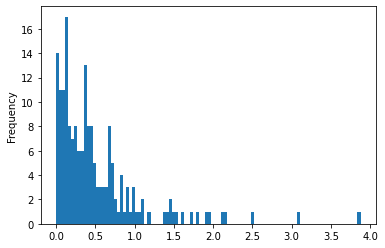

In [34]:
compliance_comparison['DELTA'].plot.hist(bins=100)

In [35]:
a = compliance_comparison[
    (compliance_comparison.CUMPRIMENTO_PROPORCIONAL_2017 == 0)&(compliance_comparison.CUMPRIMENTO_PROPORCIONAL_2018 == 0)
    ].shape[0]
b = compliance_comparison[
    (compliance_comparison.CUMPRIMENTO_PROPORCIONAL_2017 == 1)&(compliance_comparison.CUMPRIMENTO_PROPORCIONAL_2018 == 1)
    ].shape[0]
c = compliance_comparison[compliance_comparison.DELTA == 0].shape[0]

print(f'{b} full-time compliers represent {np.round(b/c, 2)} out of {c} consistent (0 delta) movie theaters')
print(f'{a} full-time non-compliers represent {np.round(a/c, 2)} out of {c} consistent (0 delta) movie theaters')

0 full-time compliers represent 0.0 out of 2 consistent (0 delta) movie theaters
1 full-time non-compliers represent 0.5 out of 2 consistent (0 delta) movie theaters


In [36]:
# checking for how many obs will be spread across diff bins

bounds = {}

# bounds to be used later
bounds['b1'] = [-0.1, 0.3, 0.6, 0.9, 1.2, 1.5, 50]
bounds['b2'] = [-0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 50]
bounds['b3'] = [-0.1, 0.4, 0.8, 1.2, 1.6, 50]
bounds['b4'] = [-0.1, 0.45, 0.85, 1.25, 1.65, 50]
bounds['b5'] = [-0.1, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 50]
bounds['b6'] = [-0.1, 0.85, 0.95, 1.05, 1.15, 50]

alpha = 'ABCDEFGHIJKLMNOPQRSTUVXZ'

for i in range(1,7):
    compliance_comparison[f'2017_B{i}'] = pd.cut(compliance_comparison.CUMPRIMENTO_PROPORCIONAL_2017, 
           bounds[f'b{i}'], labels=[alpha[i] for i in range(len(bounds[f'b{i}']) - 1)])
    compliance_comparison[f'2018_B{i}'] = pd.cut(compliance_comparison.CUMPRIMENTO_PROPORCIONAL_2018, 
           bounds[f'b{i}'], labels=[alpha[i] for i in range(len(bounds[f'b{i}']) - 1)])

In [40]:
b = gtds_1718.shape[0]

for i in range(1,7):
    mts = np.where(compliance_comparison[f'2017_B{i}'] != compliance_comparison[f'2018_B{i}'], 1, 0).sum()
    mtt = compliance_comparison.shape[0]
    a = 2*(mtt - mts)
    print(f'For bounds B{i}, {mts} out of {mtt} movie theaters will be shifted between bounds , meaning\
 {a} out of {b} observations (or {np.round(a/b,2)}) will have FE \n')

For bounds B1, 124 out of 183 movie theaters will be shifted between bounds , meaning 118 out of 408 observations (or 0.29) will have FE 

For bounds B2, 138 out of 183 movie theaters will be shifted between bounds , meaning 90 out of 408 observations (or 0.22) will have FE 

For bounds B3, 109 out of 183 movie theaters will be shifted between bounds , meaning 148 out of 408 observations (or 0.36) will have FE 

For bounds B4, 112 out of 183 movie theaters will be shifted between bounds , meaning 142 out of 408 observations (or 0.35) will have FE 

For bounds B5, 156 out of 183 movie theaters will be shifted between bounds , meaning 54 out of 408 observations (or 0.13) will have FE 

For bounds B6, 100 out of 183 movie theaters will be shifted between bounds , meaning 166 out of 408 observations (or 0.41) will have FE 



### Dependent variable: income

In [61]:
seg_gregs = {} # creating dict to store regression objects

count_regs = 0 # counter to automatically generate reg numbers

#### Bounds - [0, 0.3, 0.6, 0.9, 1.2, 1.5, 50] 

In [62]:
bounds = [0, 0.3, 0.6, 0.9, 1.2, 1.5, 50] 

formul = 'np.log(RENDA) ~ OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + C(REGISTRO_COMPLEXO) + C(ANO_CINEMATOGRAFICO)'

last_count = count_regs

for i in range(len(bounds)-1):
    seg_gregs[f'reg_seg{count_regs}'] = smf.ols(formula=formul, 
                    data = tds_1718[tds_1718.CUMPRIMENTO_PROPORCIONAL.between(bounds[i],bounds[i+1])]).fit()
    count_regs += 1
    seg_gregs[f'reg_seg{count_regs}'] = smf.ols(formula=formul, 
                    data = est_1718[est_1718.CUMPRIMENTO_PROPORCIONAL.between(bounds[i],bounds[i+1])]).fit()
    count_regs += 1
    seg_gregs[f'reg_seg{count_regs}'] = smf.ols(formula=formul, 
                    data = bras_1718[bras_1718.CUMPRIMENTO_PROPORCIONAL.between(bounds[i],bounds[i+1])]).fit()
    count_regs += 1

print(count_regs)

18


In [63]:
works = ['ALL', 'FOREIGN', 'BRAZILIAN']

for i in range(last_count,count_regs):
    print(f'Reg_seg {i}, {works[i%3]}: lower bound {bounds[(i-last_count)//3]}, higher bound {bounds[((i-last_count)//3)+1]}')
    print(pd.read_html(seg_gregs[f'reg_seg{i}'].summary().
                       tables[1].as_html(),header=0,index_col=0)[0].iloc[-2:,:-2])
    print('\n')

Reg_seg 0, ALL: lower bound 0, higher bound 0.3
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0304    0.066  0.462  0.663
DIAS_FUNCIONAMENTO        0.0065    0.005  1.338  0.238


Reg_seg 1, FOREIGN: lower bound 0, higher bound 0.3
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0279    0.068  0.414  0.696
DIAS_FUNCIONAMENTO        0.0067    0.005  1.330  0.241


Reg_seg 2, BRAZILIAN: lower bound 0, higher bound 0.3
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA -0.1096    0.248 -0.443  0.735
DIAS_FUNCIONAMENTO        0.0207    0.106  0.195  0.877


Reg_seg 3, ALL: lower bound 0.3, higher bound 0.6
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0055    0.003  1.761  0.089
DIAS_FUNCIONAMENTO        0.0045    0.000  9.917  0.000


Reg_seg 4, FOREIGN: lower bound 0.3, higher bound 0.6
                            coef  std err       t  P>|t|
OBRIG

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1620: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self




Reg_seg 15, ALL: lower bound 1.5, higher bound 50
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA -0.0053    0.011 -0.500  0.635
DIAS_FUNCIONAMENTO        0.0138    0.003  5.407  0.002


Reg_seg 16, FOREIGN: lower bound 1.5, higher bound 50
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0218    0.033  0.656  0.541
DIAS_FUNCIONAMENTO        0.0259    0.007  3.477  0.018


Reg_seg 17, BRAZILIAN: lower bound 1.5, higher bound 50
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA -0.0018    0.012 -0.143  0.891
DIAS_FUNCIONAMENTO        0.0097    0.003  3.505  0.013




#### Bounds - [0, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 50] 

In [64]:
bounds = [0, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 50] 

formul = 'np.log(RENDA) ~ OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + C(REGISTRO_COMPLEXO) + C(ANO_CINEMATOGRAFICO)'

last_count = count_regs

for i in range(len(bounds)-1):
    seg_gregs[f'reg_seg{count_regs}'] = smf.ols(formula=formul, 
                    data = tds_1718[tds_1718.CUMPRIMENTO_PROPORCIONAL.between(bounds[i],bounds[i+1])]).fit()
    count_regs += 1
    seg_gregs[f'reg_seg{count_regs}'] = smf.ols(formula=formul, 
                    data = est_1718[est_1718.CUMPRIMENTO_PROPORCIONAL.between(bounds[i],bounds[i+1])]).fit()
    count_regs += 1
    seg_gregs[f'reg_seg{count_regs}'] = smf.ols(formula=formul, 
                    data = bras_1718[bras_1718.CUMPRIMENTO_PROPORCIONAL.between(bounds[i],bounds[i+1])]).fit()
    count_regs += 1

print(count_regs)

42


In [65]:
works = ['ALL', 'FOREIGN', 'BRAZILIAN']

for i in range(last_count,count_regs):
    print(f'Reg_seg {i}, {works[i%3]}: lower bound {bounds[(i-last_count)//3]}, higher bound {bounds[((i-last_count)//3)+1]}')
    print(pd.read_html(seg_gregs[f'reg_seg{i}'].summary().
                       tables[1].as_html(),header=0,index_col=0)[0].iloc[-2:,:-2])
    print('\n')

Reg_seg 18, ALL: lower bound 0, higher bound 0.3
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0304    0.066  0.462  0.663
DIAS_FUNCIONAMENTO        0.0065    0.005  1.338  0.238


Reg_seg 19, FOREIGN: lower bound 0, higher bound 0.3
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0279    0.068  0.414  0.696
DIAS_FUNCIONAMENTO        0.0067    0.005  1.330  0.241


Reg_seg 20, BRAZILIAN: lower bound 0, higher bound 0.3
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA -0.1096    0.248 -0.443  0.735
DIAS_FUNCIONAMENTO        0.0207    0.106  0.195  0.877


Reg_seg 21, ALL: lower bound 0.3, higher bound 0.5
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0065    0.005  1.369  0.220
DIAS_FUNCIONAMENTO        0.0040    0.001  6.681  0.001


Reg_seg 22, FOREIGN: lower bound 0.3, higher bound 0.5
                            coef  std err      t  P>|t|
O

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1620: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self




Reg_seg 39, ALL: lower bound 1.5, higher bound 50
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA -0.0053    0.011 -0.500  0.635
DIAS_FUNCIONAMENTO        0.0138    0.003  5.407  0.002


Reg_seg 40, FOREIGN: lower bound 1.5, higher bound 50
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0218    0.033  0.656  0.541
DIAS_FUNCIONAMENTO        0.0259    0.007  3.477  0.018


Reg_seg 41, BRAZILIAN: lower bound 1.5, higher bound 50
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA -0.0018    0.012 -0.143  0.891
DIAS_FUNCIONAMENTO        0.0097    0.003  3.505  0.013




#### Bounds - [0, 0.4, 0.8, 1.2, 1.6, 50]

In [66]:
bounds = [0, 0.4, 0.8, 1.2, 1.6, 50] 

last_count = count_regs

formul = 'np.log(RENDA) ~ OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + C(REGISTRO_COMPLEXO) + C(ANO_CINEMATOGRAFICO)'

for i in range(len(bounds)-1):
    seg_gregs[f'reg_seg{count_regs}'] = smf.ols(formula=formul, 
                    data = tds_1718[tds_1718.CUMPRIMENTO_PROPORCIONAL.between(bounds[i],bounds[i+1])]).fit()
    count_regs += 1
    seg_gregs[f'reg_seg{count_regs}'] = smf.ols(formula=formul, 
                    data = est_1718[est_1718.CUMPRIMENTO_PROPORCIONAL.between(bounds[i],bounds[i+1])]).fit()
    count_regs += 1
    seg_gregs[f'reg_seg{count_regs}'] = smf.ols(formula=formul, 
                    data = bras_1718[bras_1718.CUMPRIMENTO_PROPORCIONAL.between(bounds[i],bounds[i+1])]).fit()
    count_regs += 1

print(count_regs)

57


In [67]:
works = ['ALL', 'FOREIGN', 'BRAZILIAN']

for i in range(last_count,count_regs):
    print(f'Reg_seg {i}, {works[i%3]}: lower bound {bounds[(i-last_count)//3]}, higher bound {bounds[((i-last_count)//3)+1]}')
    print(pd.read_html(seg_gregs[f'reg_seg{i}'].summary().
                       tables[1].as_html(),header=0,index_col=0)[0].iloc[-2:,:-2])
    print('\n')

Reg_seg 42, ALL: lower bound 0, higher bound 0.4
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0210    0.031  0.677  0.510
DIAS_FUNCIONAMENTO        0.0056    0.003  2.207  0.044


Reg_seg 43, FOREIGN: lower bound 0, higher bound 0.4
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0207    0.033  0.632  0.538
DIAS_FUNCIONAMENTO        0.0057    0.003  2.101  0.054


Reg_seg 44, BRAZILIAN: lower bound 0, higher bound 0.4
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA -0.1005    0.053 -1.891  0.095
DIAS_FUNCIONAMENTO        0.0452    0.015  3.087  0.015


Reg_seg 45, ALL: lower bound 0.4, higher bound 0.8
                            coef  std err       t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0078    0.002   3.166  0.002
DIAS_FUNCIONAMENTO        0.0048    0.000  11.272  0.000


Reg_seg 46, FOREIGN: lower bound 0.4, higher bound 0.8
                            coef  std err       t  P>|

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1620: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self




Reg_seg 54, ALL: lower bound 1.6, higher bound 50
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA -0.0053    0.011 -0.500  0.635
DIAS_FUNCIONAMENTO        0.0138    0.003  5.407  0.002


Reg_seg 55, FOREIGN: lower bound 1.6, higher bound 50
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0218    0.033  0.656  0.541
DIAS_FUNCIONAMENTO        0.0259    0.007  3.477  0.018


Reg_seg 56, BRAZILIAN: lower bound 1.6, higher bound 50
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA -0.0018    0.012 -0.143  0.891
DIAS_FUNCIONAMENTO        0.0097    0.003  3.505  0.013




#### Bounds - [0, 0.45, 0.85, 1.25, 1.65, 50]

In [68]:
bounds = [0, 0.45, 0.85, 1.25, 1.65, 50] 

last_count = count_regs

formul = 'np.log(RENDA) ~ OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + C(REGISTRO_COMPLEXO) + C(ANO_CINEMATOGRAFICO)'

for i in range(len(bounds)-1):
    seg_gregs[f'reg_seg{count_regs}'] = smf.ols(formula=formul, 
                    data = tds_1718[tds_1718.CUMPRIMENTO_PROPORCIONAL.between(bounds[i],bounds[i+1])]).fit()
    count_regs += 1
    seg_gregs[f'reg_seg{count_regs}'] = smf.ols(formula=formul, 
                    data = est_1718[est_1718.CUMPRIMENTO_PROPORCIONAL.between(bounds[i],bounds[i+1])]).fit()
    count_regs += 1
    seg_gregs[f'reg_seg{count_regs}'] = smf.ols(formula=formul, 
                    data = bras_1718[bras_1718.CUMPRIMENTO_PROPORCIONAL.between(bounds[i],bounds[i+1])]).fit()
    count_regs += 1

print(count_regs)

72


In [69]:
works = ['ALL', 'FOREIGN', 'BRAZILIAN']

for i in range(last_count,count_regs):
    print(f'Reg_seg {i}, {works[i%3]}: lower bound {bounds[(i-last_count)//3]}, higher bound {bounds[((i-last_count)//3)+1]}')
    print(pd.read_html(seg_gregs[f'reg_seg{i}'].summary().
                       tables[1].as_html(),header=0,index_col=0)[0].iloc[-2:,:-2])
    print('\n')

Reg_seg 57, ALL: lower bound 0, higher bound 0.45
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0194    0.017  1.158   0.26
DIAS_FUNCIONAMENTO        0.0059    0.001  4.153   0.00


Reg_seg 58, FOREIGN: lower bound 0, higher bound 0.45
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0183    0.018  1.042  0.309
DIAS_FUNCIONAMENTO        0.0060    0.001  4.041  0.001


Reg_seg 59, BRAZILIAN: lower bound 0, higher bound 0.45
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA -0.0035    0.037 -0.094  0.926
DIAS_FUNCIONAMENTO        0.0212    0.008  2.567  0.021


Reg_seg 60, ALL: lower bound 0.45, higher bound 0.85
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0061    0.003  2.163  0.034
DIAS_FUNCIONAMENTO        0.0048    0.001  9.524  0.000


Reg_seg 61, FOREIGN: lower bound 0.45, higher bound 0.85
                            coef  std err      t  

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1620: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self

                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0218    0.033  0.656  0.541
DIAS_FUNCIONAMENTO        0.0259    0.007  3.477  0.018


Reg_seg 71, BRAZILIAN: lower bound 1.65, higher bound 50
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA -0.0018    0.012 -0.143  0.891
DIAS_FUNCIONAMENTO        0.0097    0.003  3.505  0.013




#### Bounds - [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 50]

In [70]:
bounds = [x/10 for x in range(14)]
bounds.append(50)

last_count = count_regs

formul = 'np.log(RENDA) ~ OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + C(REGISTRO_COMPLEXO) + C(ANO_CINEMATOGRAFICO)'

for i in range(len(bounds)-1):
    seg_gregs[f'reg_seg{count_regs}'] = smf.ols(formula=formul, 
                    data = tds_1718[tds_1718.CUMPRIMENTO_PROPORCIONAL.between(bounds[i],bounds[i+1])]).fit()
    count_regs += 1
    seg_gregs[f'reg_seg{count_regs}'] = smf.ols(formula=formul, 
                    data = est_1718[est_1718.CUMPRIMENTO_PROPORCIONAL.between(bounds[i],bounds[i+1])]).fit()
    count_regs += 1
    seg_gregs[f'reg_seg{count_regs}'] = smf.ols(formula=formul, 
                    data = bras_1718[bras_1718.CUMPRIMENTO_PROPORCIONAL.between(bounds[i],bounds[i+1])]).fit()
    count_regs += 1

print(count_regs)

114


In [71]:
works = ['ALL', 'FOREIGN', 'BRAZILIAN']

for i in range(last_count,count_regs):
    print(f'Reg_seg {i}, {works[i%3]}: lower bound {bounds[(i-last_count)//3]}, higher bound {bounds[((i-last_count)//3)+1]}')
    print(pd.read_html(seg_gregs[f'reg_seg{i}'].summary().
                       tables[1].as_html(),header=0,index_col=0)[0].iloc[-2:,:-2])
    print('\n')

Reg_seg 72, ALL: lower bound 0.0, higher bound 0.1
                            coef  std err  t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA -0.0566      inf  0    NaN
DIAS_FUNCIONAMENTO        0.0118      inf  0    NaN


Reg_seg 73, FOREIGN: lower bound 0.0, higher bound 0.1
                            coef  std err  t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA -0.0690      inf  0    NaN
DIAS_FUNCIONAMENTO        0.0119      inf  0    NaN


Reg_seg 74, BRAZILIAN: lower bound 0.0, higher bound 0.1
                            coef  std err  t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0608      inf  0    NaN
DIAS_FUNCIONAMENTO        0.1112      inf  0    NaN


Reg_seg 75, ALL: lower bound 0.1, higher bound 0.2
                            coef  std err  t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.1663      inf  0    NaN
DIAS_FUNCIONAMENTO        0.0107      inf  0    NaN


Reg_seg 76, FOREIGN: lower bound 0.1, higher bound 0.2
                            coef  std err  t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.1663      inf  0   

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1620: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self

                            coef  std err  t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0315      inf  0    NaN
DIAS_FUNCIONAMENTO        0.0117      inf  0    NaN


Reg_seg 79, FOREIGN: lower bound 0.2, higher bound 0.3
                            coef  std err  t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0309      inf  0    NaN
DIAS_FUNCIONAMENTO        0.0122      inf  0    NaN


Reg_seg 80, BRAZILIAN: lower bound 0.2, higher bound 0.3
                            coef  std err  t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0411      inf  0    NaN
DIAS_FUNCIONAMENTO        0.0105      inf  0    NaN


Reg_seg 81, ALL: lower bound 0.3, higher bound 0.4
                            coef  std err  t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0255      inf  0    NaN
DIAS_FUNCIONAMENTO        0.0028      inf  0    NaN


Reg_seg 82, FOREIGN: lower bound 0.3, higher bound 0.4
                            coef  std err  t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0262      inf  0    NaN
DIAS_FUNCIONAMENTO        0.0034      inf  0  

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1620: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self

                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA -0.0025    0.001 -4.039  0.056
DIAS_FUNCIONAMENTO        0.0030    0.000  7.629  0.017


Reg_seg 86, BRAZILIAN: lower bound 0.4, higher bound 0.5
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0413    0.018  2.239  0.155
DIAS_FUNCIONAMENTO        0.0156    0.009  1.795  0.215


Reg_seg 87, ALL: lower bound 0.5, higher bound 0.6
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0121    0.006  1.939  0.110
DIAS_FUNCIONAMENTO        0.0051    0.001  7.140  0.001


Reg_seg 88, FOREIGN: lower bound 0.5, higher bound 0.6
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0108    0.007  1.604  0.170
DIAS_FUNCIONAMENTO        0.0053    0.001  6.853  0.001


Reg_seg 89, BRAZILIAN: lower bound 0.5, higher bound 0.6
                            coef  std err     t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0302    0.022  1.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1620: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self

                            coef  std err       t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA -0.0005    0.001  -0.381  0.704
DIAS_FUNCIONAMENTO        0.0050    0.000  10.686  0.000


Reg_seg 100, FOREIGN: lower bound 0.9, higher bound 1.0
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA -0.0017    0.002 -1.127  0.264
DIAS_FUNCIONAMENTO        0.0049    0.001  9.741  0.000


Reg_seg 101, BRAZILIAN: lower bound 0.9, higher bound 1.0
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0218    0.008  2.578  0.012
DIAS_FUNCIONAMENTO       -0.0015    0.002 -0.706  0.483


Reg_seg 102, ALL: lower bound 1.0, higher bound 1.1
                            coef  std err       t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0005    0.001   0.438  0.662
DIAS_FUNCIONAMENTO        0.0050    0.000  21.183  0.000


Reg_seg 103, FOREIGN: lower bound 1.0, higher bound 1.1
                            coef  std err       t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA -0.0011   

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1620: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self

                            coef  std err  t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0676      inf  0    NaN
DIAS_FUNCIONAMENTO        0.0063      inf  0    NaN


Reg_seg 110, BRAZILIAN: lower bound 1.2, higher bound 1.3
                            coef  std err  t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.1256      inf  0    NaN
DIAS_FUNCIONAMENTO        0.0055      inf  0    NaN


Reg_seg 111, ALL: lower bound 1.3, higher bound 50
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA -0.0055    0.010 -0.559  0.593
DIAS_FUNCIONAMENTO        0.0139    0.002  5.889  0.001


Reg_seg 112, FOREIGN: lower bound 1.3, higher bound 50
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0227    0.032  0.706  0.507
DIAS_FUNCIONAMENTO        0.0263    0.007  3.632  0.011


Reg_seg 113, BRAZILIAN: lower bound 1.3, higher bound 50
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA -0.0019    0.011 -0.170  0.870
DIAS_FUNCIO

#### Bounds - [0, 0.85, 0.95, 1.05, 1.15, 50]

In [72]:
bounds = [0, 0.85, 0.95, 1.05, 1.15, 50]

last_count = count_regs

formul = 'np.log(RENDA) ~ OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + C(REGISTRO_COMPLEXO) + C(ANO_CINEMATOGRAFICO)'

for i in range(len(bounds)-1):
    seg_gregs[f'reg_seg{count_regs}'] = smf.ols(formula=formul, 
                    data = tds_1718[tds_1718.CUMPRIMENTO_PROPORCIONAL.between(bounds[i],bounds[i+1])]).fit()
    count_regs += 1
    seg_gregs[f'reg_seg{count_regs}'] = smf.ols(formula=formul, 
                    data = est_1718[est_1718.CUMPRIMENTO_PROPORCIONAL.between(bounds[i],bounds[i+1])]).fit()
    count_regs += 1
    seg_gregs[f'reg_seg{count_regs}'] = smf.ols(formula=formul, 
                    data = bras_1718[bras_1718.CUMPRIMENTO_PROPORCIONAL.between(bounds[i],bounds[i+1])]).fit()
    count_regs += 1

print(count_regs)

129


In [73]:
works = ['ALL', 'FOREIGN', 'BRAZILIAN']

for i in range(last_count,count_regs):
    print(f'Reg_seg {i}, {works[i%3]}: lower bound {bounds[(i-last_count)//3]}, higher bound {bounds[((i-last_count)//3)+1]}')
    print(pd.read_html(seg_gregs[f'reg_seg{i}'].summary().
                       tables[1].as_html(),header=0,index_col=0)[0].iloc[-2:,:-2])
    print('\n')

Reg_seg 114, ALL: lower bound 0, higher bound 0.85
                            coef  std err       t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0037    0.002   1.755  0.081
DIAS_FUNCIONAMENTO        0.0064    0.000  17.074  0.000


Reg_seg 115, FOREIGN: lower bound 0, higher bound 0.85
                            coef  std err       t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0037    0.002   1.852  0.066
DIAS_FUNCIONAMENTO        0.0065    0.000  17.839  0.000


Reg_seg 116, BRAZILIAN: lower bound 0, higher bound 0.85
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA -0.0041    0.005 -0.865  0.389
DIAS_FUNCIONAMENTO        0.0115    0.002  5.900  0.000


Reg_seg 117, ALL: lower bound 0.85, higher bound 0.95
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0952    0.081  1.178  0.448
DIAS_FUNCIONAMENTO        0.0195    0.009  2.097  0.283


Reg_seg 118, FOREIGN: lower bound 0.85, higher bound 0.95
                            coef  std e

#### Bounds - [0.99, 1.01]

In [74]:
bounds = [0.99, 1.01]

last_count = count_regs

formul = 'np.log(RENDA) ~ OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + C(REGISTRO_COMPLEXO) + C(ANO_CINEMATOGRAFICO)'

for i in range(len(bounds)-1):
    seg_gregs[f'reg_seg{count_regs}'] = smf.ols(formula=formul, 
                    data = tds_1718[tds_1718.CUMPRIMENTO_PROPORCIONAL.between(bounds[i],bounds[i+1])]).fit()
    count_regs += 1
    seg_gregs[f'reg_seg{count_regs}'] = smf.ols(formula=formul, 
                    data = est_1718[est_1718.CUMPRIMENTO_PROPORCIONAL.between(bounds[i],bounds[i+1])]).fit()
    count_regs += 1
    seg_gregs[f'reg_seg{count_regs}'] = smf.ols(formula=formul, 
                    data = bras_1718[bras_1718.CUMPRIMENTO_PROPORCIONAL.between(bounds[i],bounds[i+1])]).fit()
    count_regs += 1

print(count_regs)

132


In [75]:
works = ['ALL', 'FOREIGN', 'BRAZILIAN']

for i in range(last_count,count_regs):
    print(f'Reg_seg {i}, {works[i%3]}: lower bound {bounds[(i-last_count)//3]}, higher bound {bounds[((i-last_count)//3)+1]}')
    print(pd.read_html(seg_gregs[f'reg_seg{i}'].summary().
                       tables[1].as_html(),header=0,index_col=0)[0].iloc[-2:,:-2])
    print('\n')

Reg_seg 129, ALL: lower bound 0.99, higher bound 1.01
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0011    0.002  0.734  0.466
DIAS_FUNCIONAMENTO        0.0012    0.002  0.691  0.492


Reg_seg 130, FOREIGN: lower bound 0.99, higher bound 1.01
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA -0.0013    0.002 -0.774  0.441
DIAS_FUNCIONAMENTO        0.0027    0.002  1.360  0.178


Reg_seg 131, BRAZILIAN: lower bound 0.99, higher bound 1.01
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0286    0.006  4.469    0.0
DIAS_FUNCIONAMENTO       -0.0062    0.002 -3.786    0.0




## Alternative regressions

### Dependent variable: number of sessions

In [32]:
group_days = {}

d_count = 0

weight_funcs = [
    'CUMP_QUADRATIC','CUMP_NORMALIZADO', 'CUMP_LINEAR','CUMP_TRIWEIGHT']

#### 2017-2019

In [33]:
last_d_count = d_count # to get num range of regressions to be executed

for f in weight_funcs:
    # adjust formula as we run through the weighting funcs
    formul = f'DIAS_FUNCIONAMENTO ~ OBRIGAÇÃO_TOTAL_POR_SALA*{f} + C(REGISTRO_COMPLEXO) + C(ANO_CINEMATOGRAFICO)'
    group_days[f'reg_gcd{d_count}'] = smf.ols(formula = formul, data=tds_1719).fit()
    d_count += 1
    group_days[f'reg_gcd{d_count}'] = smf.ols(formula = formul, data=est_1719).fit()
    d_count += 1
    group_days[f'reg_gcd{d_count}'] = smf.ols(formula = formul, data=bras_1719).fit()
    d_count += 1

In [34]:
works = ['ALL', 'FOREIGN', 'BRAZILIAN']

for i in range(last_d_count, d_count):
    print(f'Reg_group_days {i}, {works[i%3]}, weighting function {weight_funcs[(i-last_d_count)//3]}:')
    print(pd.read_html(group_days[f'reg_gcd{i}'].summary().
                       tables[1].as_html(),header=0,index_col=0)[0].iloc[-3:,:-2])
    print('\n')

Reg_group_days 0, ALL, weighting function CUMP_QUADRATIC:
                                            coef  std err      t  P>|t|
OBRIGAÇÃO_TOTAL_POR_SALA                 -0.3288    0.772 -0.426  0.670
CUMP_QUADRATIC                           37.0108   29.696  1.246  0.213
OBRIGAÇÃO_TOTAL_POR_SALA:CUMP_QUADRATIC   0.5683    0.823  0.690  0.490


Reg_group_days 1, FOREIGN, weighting function CUMP_QUADRATIC:
                                            coef  std err      t  P>|t|
OBRIGAÇÃO_TOTAL_POR_SALA                 -0.4326    0.773 -0.560  0.576
CUMP_QUADRATIC                           34.4065   29.829  1.153  0.249
OBRIGAÇÃO_TOTAL_POR_SALA:CUMP_QUADRATIC   0.6174    0.823  0.750  0.453


Reg_group_days 2, BRAZILIAN, weighting function CUMP_QUADRATIC:
                                             coef  std err      t  P>|t|
OBRIGAÇÃO_TOTAL_POR_SALA                  -3.1930    0.527 -6.058    0.0
CUMP_QUADRATIC                          -119.4115   20.822 -5.735    0.0
OBRIGAÇÃO_TOTAL_P

#### 2017-2018

In [35]:
last_d_count = d_count # to get num range of regressions to be executed

for f in weight_funcs:
    # adjust formula as we run through the weighting funcs
    formul = f'DIAS_FUNCIONAMENTO ~ OBRIGAÇÃO_TOTAL_POR_SALA*{f} + C(REGISTRO_COMPLEXO) + C(ANO_CINEMATOGRAFICO)'
    group_days[f'reg_gcd{d_count}'] = smf.ols(formula = formul, data=tds_1718).fit()
    d_count += 1
    group_days[f'reg_gcd{d_count}'] = smf.ols(formula = formul, data=est_1718).fit()
    d_count += 1
    group_days[f'reg_gcd{d_count}'] = smf.ols(formula = formul, data=bras_1718).fit()
    d_count += 1

In [36]:
works = ['ALL', 'FOREIGN', 'BRAZILIAN']

for i in range(last_d_count, d_count):
    print(f'Reg_group_days {i}, {works[i%3]}, weighting function {weight_funcs[(i-last_d_count)//3]}:')
    print(pd.read_html(group_days[f'reg_gcd{i}'].summary().
                       tables[1].as_html(),header=0,index_col=0)[0].iloc[-3:,:-2])
    print('\n')

Reg_group_days 12, ALL, weighting function CUMP_QUADRATIC:
                                            coef  std err      t  P>|t|
OBRIGAÇÃO_TOTAL_POR_SALA                  0.1607    2.455  0.065  0.948
CUMP_QUADRATIC                           48.1702   41.535  1.160  0.247
OBRIGAÇÃO_TOTAL_POR_SALA:CUMP_QUADRATIC   0.3867    1.157  0.334  0.738


Reg_group_days 13, FOREIGN, weighting function CUMP_QUADRATIC:
                                            coef  std err      t  P>|t|
OBRIGAÇÃO_TOTAL_POR_SALA                  0.1350    2.423  0.056  0.956
CUMP_QUADRATIC                           49.8296   40.988  1.216  0.224
OBRIGAÇÃO_TOTAL_POR_SALA:CUMP_QUADRATIC   0.3346    1.142  0.293  0.770


Reg_group_days 14, BRAZILIAN, weighting function CUMP_QUADRATIC:
                                             coef  std err      t  P>|t|
OBRIGAÇÃO_TOTAL_POR_SALA                   2.5337    1.457  1.739  0.082
CUMP_QUADRATIC                          -133.0333   26.417 -5.036  0.000
OBRIGAÇÃO_TOTA